In [ ]:
# Import libraries
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler # to scale the data set
from sklearn.model_selection import train_test_split # split data into train and test
from imblearn.over_sampling import RandomOverSampler # Used for oversampling imbalanced data set
from collections import Counter
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (12,8) # To set the size of figures or plots or graphs
from sklearn import preprocessing
import copy # To make a copy of dataframe
from datetime import datetime # import datetime library for manipulating date field 
pd.set_option('max_rows', 500) # Changing the number of rows to be displayed at once on the notebook display
pd.set_option('max_columns', 500) # Changing the number of columns to be displayed at once on the notebook display
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Loading the Data

The data did not load properly without some extra parameters in the pd.read_csv, so we decided to include some extra parameters.

The first row of the data contains an irrelevant text which appears not to be the column headers we need - "Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)", as it can be seen when opened on Excel. This text prevents the data set from being parsed properly by pandas library.

The loaded data contains only 1 column which is not meant to be so.

We added the following parameters:
skiprows=1 - This is to omit just the first row of the data, which is not too bad because it is only one row of data compared to the overall size of data.

low_memory=False - This is used to enforce consistent datatypes along the column

In [ ]:
loan_df = pd.read_csv("/content/gdrive/My Drive/IAF 603/Loan Data/lending_club_loans.csv", skiprows=1, low_memory=False)

Let's display first 10 rows of the DataFrame, just to make sure we were able to load the dataset properly:

In [ ]:
loan_df.head(10)

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501  1296599.0     5000.0       5000.0           4975.0   36 months   
1  1077430  1314167.0     2500.0       2500.0           2500.0   60 months   
2  1077175  1313524.0     2400.0       2400.0           2400.0   36 months   
3  1076863  1277178.0    10000.0      10000.0          10000.0   36 months   
4  1075358  1311748.0     3000.0       3000.0           3000.0   60 months   
5  1075269  1311441.0     5000.0       5000.0           5000.0   36 months   
6  1069639  1304742.0     7000.0       7000.0           7000.0   60 months   
7  1072053  1288686.0     3000.0       3000.0           3000.0   36 months   
8  1071795  1306957.0     5600.0       5600.0           5600.0   60 months   
9  1071570  1306721.0     5375.0       5375.0           5350.0   60 months   

  int_rate  installment grade sub_grade                  emp_title emp_length  \
0   10.65%       162.87     B        B2                        NaN  10+ years   
1   15.27%        59.83     C        C4                      Ryder   < 1 year   
2   15.96%        84.33     C        C5                        NaN  10+ years   
3   13.49%       339.31     C        C1        AIR RESOURCES BOARD  10+ years   
4   12.69%        67.79     B        B5   University Medical Group     1 year   
5    7.90%       156.46     A        A4       Veolia Transportaton    3 years   
6   15.96%       170.08     C        C5  Southern Star Photography    8 years   
7   18.64%       109.43     E        E1            MKC Accounting     9 years   
8   21.28%       152.39     F        F2                        NaN    4 years   
9   12.69%       121.45     B        B5                  Starbucks   < 1 year   

  home_ownership  annual_inc verification_status   issue_d  loan_status  \
0           RENT     24000.0            Verified  Dec-2011   Fully Paid   
1           RENT     30000.0     Source Verified  Dec-2011  Charged Off   
2           RENT     12252.0        Not Verified  Dec-2011   Fully Paid   
3           RENT     49200.0     Source Verified  Dec-2011   Fully Paid   
4           RENT     80000.0     Source Verified  Dec-2011      Current   
5           RENT     36000.0     Source Verified  Dec-2011   Fully Paid   
6           RENT     47004.0        Not Verified  Dec-2011   Fully Paid   
7           RENT     48000.0     Source Verified  Dec-2011   Fully Paid   
8            OWN     40000.0     Source Verified  Dec-2011  Charged Off   
9           RENT     15000.0            Verified  Dec-2011  Charged Off   

  pymnt_plan                                                url  \
0          n  https://lendingclub.com/browse/loanDetail.acti...   
1          n  https://lendingclub.com/browse/loanDetail.acti...   
2          n  https://lendingclub.com/browse/loanDetail.acti...   
3          n  https://lendingclub.com/browse/loanDetail.acti...   
4          n  https://lendingclub.com/browse/loanDetail.acti...   
5          n  https://lendingclub.com/browse/loanDetail.acti...   
6          n  https://lendingclub.com/browse/loanDetail.acti...   
7          n  https://lendingclub.com/browse/loanDetail.acti...   
8          n  https://lendingclub.com/browse/loanDetail.acti...   
9          n  https://lendingclub.com/browse/loanDetail.acti...   

                                                desc             purpose  \
0    Borrower added on 12/22/11 > I need to upgra...         credit_card   
1    Borrower added on 12/22/11 > I plan to use t...                 car   
2                                                NaN      small_business   
3    Borrower added on 12/21/11 > to pay for prop...               other   
4    Borrower added on 12/21/11 > I plan on combi...               other   
5                                                NaN             wedding   
6    Borrower added on 12/18/11 > I am planning o...  debt_consolidation   
7    Borrower added on 12/16/11 > Downpayment for...                 car   
8    Borr

In [ ]:
loan_df.info() # check basic information about the data frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42538 entries, 0 to 42537
Columns: 115 entries, id to total_il_high_credit_limit
dtypes: float64(90), object(25)
memory usage: 37.3+ MB


In [ ]:
loan_df.shape # Check the dimension or shape of the dataframe

(42538, 115)

In [ ]:
# isnull() checks missing values in each variable. 
#.sum() adds all the missing values in each variable and displays
loan_df.isnull().sum()

id                                    0
member_id                             3
loan_amnt                             3
funded_amnt                           3
funded_amnt_inv                       3
term                                  3
int_rate                              3
installment                           3
grade                                 3
sub_grade                             3
emp_title                          2629
emp_length                         1115
home_ownership                        3
annual_inc                            7
verification_status                   3
issue_d                               3
loan_status                           3
pymnt_plan                            3
url                                   3
desc                              13296
purpose                               3
title                                16
zip_code                              3
addr_state                            3
dti                                   3


The result above shows that there are quit a lot of missing values in the data, we will come back to resolve them properly

Used deep copy to make a copy of the dataframe. Modifying anything on this copy won't affect the original data frame.

In [ ]:
# using deepcopy to deep copy 
loan_df_copy = copy.deepcopy(loan_df)

This is used to identify columns for which over 70% of its entries was missing. Personally, I used 70% threshold, because I feel that columns won't be useful if such amount of its values are found missing.

In [ ]:
# Identifying features with more than 70% of values as missing
rem_loan_df_list = [(a,b)[0] for (a,b) in zip(loan_df_copy.isnull().sum().index, loan_df_copy.isnull().sum().values) if b>=(0.7*loan_df_copy.shape[0])]

In [ ]:
rem_loan_df_list # Here is a list of the columns that have over 70% of their value missing

['mths_since_last_record',
 'next_pymnt_d',
 'mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m',
 'pct_tl_nvr_dlq',
 'percen

In [ ]:
len(rem_loan_df_list) # 56 columns have 70% of their values missing

56

This drops those 56 columns for which over 70% of their values was found missing. Like I said it make sense to drop them because they won't be that useful

In [ ]:
loan_df_copy.drop(rem_loan_df_list, axis = 1, inplace=True)

In [ ]:
loan_df_copy.head() # Here is what the dataframe looks like after dropping those columns

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501  1296599.0     5000.0       5000.0           4975.0   36 months   
1  1077430  1314167.0     2500.0       2500.0           2500.0   60 months   
2  1077175  1313524.0     2400.0       2400.0           2400.0   36 months   
3  1076863  1277178.0    10000.0      10000.0          10000.0   36 months   
4  1075358  1311748.0     3000.0       3000.0           3000.0   60 months   

  int_rate  installment grade sub_grade                 emp_title emp_length  \
0   10.65%       162.87     B        B2                       NaN  10+ years   
1   15.27%        59.83     C        C4                     Ryder   < 1 year   
2   15.96%        84.33     C        C5                       NaN  10+ years   
3   13.49%       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4   12.69%        67.79     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_status   issue_d  loan_status  \
0           RENT     24000.0            Verified  Dec-2011   Fully Paid   
1           RENT     30000.0     Source Verified  Dec-2011  Charged Off   
2           RENT     12252.0        Not Verified  Dec-2011   Fully Paid   
3           RENT     49200.0     Source Verified  Dec-2011   Fully Paid   
4           RENT     80000.0     Source Verified  Dec-2011      Current   

  pymnt_plan                                                url  \
0          n  https://lendingclub.com/browse/loanDetail.acti...   
1          n  https://lendingclub.com/browse/loanDetail.acti...   
2          n  https://lendingclub.com/browse/loanDetail.acti...   
3          n  https://lendingclub.com/browse/loanDetail.acti...   
4          n  https://lendingclub.com/browse/loanDetail.acti...   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state    dti  delinq_2yrs  \
0              Computer    860xx         AZ  27.65          0.0   
1                  bike    309xx         GA   1.00          0.0   
2  real estate business    606xx         IL   8.72          0.0   
3              personel    917xx         CA  20.00          0.0   
4              Personal    972xx         OR  17.94          0.0   

  earliest_cr_line  fico_range_low  fico_range_high  inq_last_6mths  \
0         Jan-1985           735.0            739.0             1.0   
1         Apr-1999           740.0            744.0             5.0   
2         Nov-2001           735.0            739.0             2.0   
3         Feb-1996           690.0            694.0             1.0   
4         Jan-1996           695.0            699.0             0.0   

   mths_since_last_delinq  open_acc  pub_rec  revol_bal revol_util  total_acc  \
0                     NaN       3.0      0.0    13648.0      83.7%        9.0   
1                     NaN       3.0      0.0     1687.0       9.4%        4.0   
2                     NaN       2.0      0.0     2956.0      98.5%       10.0   
3                    35.0      10.0      0.0     5598.0        21%       37.0   
4                    38.0      15.0      0.0    27783.0      53.9%       38.0   

  initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \
0                   f       0.00           0.00   5863.155187   
1                   f       0.00           0.00   1008.710000   
2                   f       0.00           0.00   3005.666844   
3                   f       0.00           0.00  12231.890000   
4                   f     270.78         270.78   3784.490000   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_l

In [ ]:
# isnull() checks missing values in each variable. 
#.sum() adds all the missing values in each variable and displays
loan_df_copy.isnull().sum()

id                                0
member_id                         3
loan_amnt                         3
funded_amnt                       3
funded_amnt_inv                   3
term                              3
int_rate                          3
installment                       3
grade                             3
sub_grade                         3
emp_title                      2629
emp_length                     1115
home_ownership                    3
annual_inc                        7
verification_status               3
issue_d                           3
loan_status                       3
pymnt_plan                        3
url                               3
desc                          13296
purpose                           3
title                            16
zip_code                          3
addr_state                        3
dti                               3
delinq_2yrs                      32
earliest_cr_line                 32
fico_range_low              

As can be seen above, we have been able to treat a lot of the missing above compared to before by removing those columns but we still have missing values in all the columns except for id column. We will come back to them.

In [ ]:
loan_df['desc'].head()

0      Borrower added on 12/22/11 > I need to upgra...
1      Borrower added on 12/22/11 > I plan to use t...
2                                                  NaN
3      Borrower added on 12/21/11 > to pay for prop...
4      Borrower added on 12/21/11 > I plan on combi...
Name: desc, dtype: object

In [ ]:
loan_df['url'].head()

0    https://lendingclub.com/browse/loanDetail.acti...
1    https://lendingclub.com/browse/loanDetail.acti...
2    https://lendingclub.com/browse/loanDetail.acti...
3    https://lendingclub.com/browse/loanDetail.acti...
4    https://lendingclub.com/browse/loanDetail.acti...
Name: url, dtype: object

The 'desc' and 'url' columns don't really look useful for our purpose. 

'desc' column might be useful if we don't already have the 'purpose' column. So it is a duplicate and inconsistent column. it contains a long text explanation for the loan that we won’t need.

'url' column contains a link to each individual loan details on Lending Club website which can only be accessed with an investor account.


In [ ]:
# Remove columns
loan_df_copy = loan_df_copy.drop(['url','desc'],axis=1) # These columns are not useful for our purposes

In [ ]:
loan_df_copy.shape # Check the dimension or shape of the dataframe after the previous modifications

(42538, 57)

We would like to explore the data by looking at what is in each columns and understanding what the columns represents using the data dictionary or description. We want to create a DataFrame to contain the names of the columns, data type, values in the row of the data, and description from the data dictionary.

In [ ]:
# Loading the data dictionary
data_dict = pd.read_csv(r"/content/gdrive/My Drive/IAF 603/Loan Data/LCDataDictionary.csv") 

In [ ]:
data_dict.shape # Check the dimension or shape of the data dictionary

(117, 2)

In [ ]:
# Check the columns present in the data dictionary dataframe
list(data_dict.columns)

['LoanStatNew', 'Description']

In [ ]:
# See what the data looks like with top rows
data_dict.head()

LoanStatNew                                        Description
0        acc_now_delinq  The number of accounts on which the borrower i...
1  acc_open_past_24mths         Number of trades opened in past 24 months.
2            addr_state  The state provided by the borrower in the loan...
3              all_util              Balance to credit limit on all trades
4            annual_inc  The self-reported annual income provided by th...

In [ ]:
# Rename the columns to something descriptive of what the columns mean
data_dict = data_dict.rename(columns={'LoanStatNew': 'name', 'Description': 'description'})

In [ ]:
data_dict.head() # See what the data looks like with top rows

name                                        description
0        acc_now_delinq  The number of accounts on which the borrower i...
1  acc_open_past_24mths         Number of trades opened in past 24 months.
2            addr_state  The state provided by the borrower in the loan...
3              all_util              Balance to credit limit on all trades
4            annual_inc  The self-reported annual income provided by th...

We want to join the first row of loan_df to the data_dict DataFrame to give us a DataFrame with the following columns: 

name -> contains the column names of loan_df

dtypes -> contains the data types of the loan_df columns

first values ->  contains the values of the first row of loan_df

description -> explains what each column in loan_df represents



In [ ]:
# Creates a dataframe containing the data types of each of the columns in loan_df
data_dict_dtypes = pd.DataFrame(loan_df_copy.dtypes,columns=['dtypes'])

In [ ]:
data_dict_dtypes.head()

dtypes
id                object
member_id        float64
loan_amnt        float64
funded_amnt      float64
funded_amnt_inv  float64

In [ ]:
# reset the index back to the default 0, 1, 2 etc indexes
data_dict_dtypes = data_dict_dtypes.reset_index()

In [ ]:
data_dict_dtypes.head()

index   dtypes
0               id   object
1        member_id  float64
2        loan_amnt  float64
3      funded_amnt  float64
4  funded_amnt_inv  float64

In [ ]:
# Create the name column; the name of the feature/column
data_dict_dtypes['name'] = data_dict_dtypes['index']

In [ ]:
data_dict_dtypes = data_dict_dtypes[['name','dtypes']] # filter for only name and dtype columns
data_dict_dtypes['first value'] = loan_df_copy.loc[0].values # get all values of the first row of loan_df
full_data_dict = data_dict_dtypes.merge(data_dict, on='name',how='left') # merge the 2 dataframes together

In [ ]:
full_data_dict.shape

(57, 4)

In [ ]:
# view the first 10 features and there descriptions
full_data_dict.head(10)

name   dtypes first value  \
0               id   object     1077501   
1        member_id  float64  1.2966e+06   
2        loan_amnt  float64        5000   
3      funded_amnt  float64        5000   
4  funded_amnt_inv  float64        4975   
5             term   object   36 months   
6         int_rate   object      10.65%   
7      installment  float64      162.87   
8            grade   object           B   
9        sub_grade   object          B2   

                                         description  
0      A unique LC assigned ID for the loan listing.  
1   A unique LC assigned Id for the borrower member.  
2  The listed amount of the loan applied for by t...  
3  The total amount committed to that loan at tha...  
4  The total amount committed by investors for th...  
5  The number of payments on the loan. Values are...  
6                          Interest Rate on the loan  
7  The monthly payment owed by the borrower if th...  
8                             LC assigned loan grade  
9                          LC assigned loan subgrade

id — randomly generated field by LendingClub for unique identification purposes only.

member_id — also randomly generated field by LendingClub for identification purposes only.

funded_amnt — leaks information from the future (after the loan is already started to be funded).

funded_amnt_inv — also leaks data from the future.

sub_grade — contains redundant information that is already in the grade column (more below).

int_rate — also included within the grade column.

**A column is considered to leak information when the data it contains won’t be available when we use our model to make predictions**

In [ ]:
# list of columns to be removed
rem_col_list = ['id','member_id','funded_amnt','funded_amnt_inv','int_rate','sub_grade']
# drop the columns above due to the reasons stated above
loan_df_copy = loan_df_copy.drop(rem_col_list,axis=1)  

In [ ]:
loan_df_copy.shape

(42538, 51)

In [ ]:
# view the next 10 features and there descriptions
full_data_dict[10:20]

name   dtypes  first value  \
10            emp_title   object          NaN   
11           emp_length   object    10+ years   
12       home_ownership   object         RENT   
13           annual_inc  float64        24000   
14  verification_status   object     Verified   
15              issue_d   object     Dec-2011   
16          loan_status   object   Fully Paid   
17           pymnt_plan   object            n   
18              purpose   object  credit_card   
19                title   object     Computer   

                                          description  
10  The job title supplied by the Borrower when ap...  
11  Employment length in years. Possible values ar...  
12  The home ownership status provided by the borr...  
13  The self-reported annual income provided by th...  
14  Indicates if income was verified by LC, not ve...  
15                The month which the loan was funded  
16                         Current status of the loan  
17  Indicates if a payment plan has been put in pl...  
18  A category provided by the borrower for the lo...  
19            The loan title provided by the borrower

emp_title — requires other data and a lot of processing to become potentially useful.

issued_d — leaks data from the future.

In [ ]:
# list of columns to be removed
rem_col_list2 = ['emp_title','issue_d']
# drop the columns above due to the reasons stated above
loan_df_copy = loan_df_copy.drop(rem_col_list2,axis=1)

In [ ]:
loan_df_copy.shape

(42538, 49)

In [ ]:
# view the next 10 features and there descriptions
full_data_dict[20:30]

name   dtypes first value  \
20                zip_code   object       860xx   
21              addr_state   object          AZ   
22                     dti  float64       27.65   
23             delinq_2yrs  float64           0   
24        earliest_cr_line   object    Jan-1985   
25          fico_range_low  float64         735   
26         fico_range_high  float64         739   
27          inq_last_6mths  float64           1   
28  mths_since_last_delinq  float64         NaN   
29                open_acc  float64           3   

                                          description  
20  The first 3 numbers of the zip code provided b...  
21  The state provided by the borrower in the loan...  
22  A ratio calculated using the borrower’s total ...  
23  The number of 30+ days past-due incidences of ...  
24  The month the borrower's earliest reported cre...  
25  The lower boundary range the borrower’s FICO a...  
26  The upper boundary range the borrower’s FICO a...  
27  The number of inquiries in past 6 months (excl...  
28  The number of months since the borrower's last...  
29  The number of open credit lines in the borrowe...

zip_code – mostly redundant with the addr_state column since only the first 3 digits of the 5 digit zip code are visible.

In [ ]:
# list of columns to be removed
rem_col_list3 = ['zip_code']
# drop the columns above due to the reasons stated above
loan_df_copy = loan_df_copy.drop(rem_col_list3,axis=1)

In [ ]:
# view the next 10 features and there descriptions
full_data_dict[30:40]

name   dtypes first value  \
30              pub_rec  float64           0   
31            revol_bal  float64       13648   
32           revol_util   object       83.7%   
33            total_acc  float64           9   
34  initial_list_status   object           f   
35            out_prncp  float64           0   
36        out_prncp_inv  float64           0   
37          total_pymnt  float64     5863.16   
38      total_pymnt_inv  float64     5833.84   
39      total_rec_prncp  float64        5000   

                                          description  
30                Number of derogatory public records  
31                     Total credit revolving balance  
32  Revolving line utilization rate, or the amount...  
33  The total number of credit lines currently in ...  
34  The initial listing status of the loan. Possib...  
35  Remaining outstanding principal for total amou...  
36  Remaining outstanding principal for portion of...  
37  Payments received to date for total amount funded  
38  Payments received to date for portion of total...  
39                         Principal received to date

out_prncp – leaks data from the future.

out_prncp_inv – also leaks data from the future.

total_pymnt – also leaks data from the future.

total_pymnt_inv – also leaks data from the future.

In [ ]:
# list of columns to be removed
rem_col_list4 = ['out_prncp','out_prncp_inv', 'total_pymnt','total_pymnt_inv']
# drop the columns above due to the reasons stated above
loan_df_copy = loan_df_copy.drop(rem_col_list4,axis=1)

In [ ]:
# view the remaining features and there descriptions
full_data_dict[40:]

name   dtypes first value  \
40               total_rec_int  float64      863.16   
41          total_rec_late_fee  float64           0   
42                  recoveries  float64           0   
43     collection_recovery_fee  float64           0   
44                last_pymnt_d   object    Jan-2015   
45             last_pymnt_amnt  float64      171.62   
46          last_credit_pull_d   object    Sep-2016   
47        last_fico_range_high  float64         744   
48         last_fico_range_low  float64         740   
49  collections_12_mths_ex_med  float64           0   
50                 policy_code  float64           1   
51            application_type   object  INDIVIDUAL   
52              acc_now_delinq  float64           0   
53    chargeoff_within_12_mths  float64           0   
54                 delinq_amnt  float64           0   
55        pub_rec_bankruptcies  float64           0   
56                   tax_liens  float64           0   

                                          description  
40                          Interest received to date  
41                         Late fees received to date  
42                     post charge off gross recovery  
43                     post charge off collection fee  
44                    Last month payment was received  
45                 Last total payment amount received  
46  The most recent month LC pulled credit for thi...  
47  The upper boundary range the borrower’s last F...  
48  The lower boundary range the borrower’s last F...  
49  Number of collections in 12 months excluding m...  
50  publicly available policy_code=1\nnew products...  
51  Indicates whether the loan is an individual ap...  
52  The number of accounts on which the borrower i...  
53             Number of charge-offs within 12 months  
54  The past-due amount owed for the accounts on w...  
55               Number of public record bankruptcies  
56                                Number of tax liens

total_rec_prncp, total_rec_int, total_rec_late_fee, recoveries, collection_recovery_fee, last_pymnt_d, and last_pymnt_amnt leaks data from the future.

In [ ]:
# list of columns to be removed
rem_col_list5 = ['total_rec_prncp','total_rec_int',
                 'total_rec_late_fee','recoveries',
                 'collection_recovery_fee', 'last_pymnt_d',
                 'last_pymnt_amnt']
# drop the columns above due to the reasons stated above
loan_df_copy = loan_df_copy.drop(rem_col_list5, axis=1)

In [ ]:
loan_df_copy.shape

(42538, 37)

From the description and extra research about these set of columns:

fico_range_low, fico_range_high, last_fico_range_low, and last_fico_range_high,

It appears that When a borrower applies for a loan, LendingClub gets the borrower’s credit score from FICO — they are given a lower and upper limit of the range that the borrowers score belongs to, and they store those values as fico_range_low, fico_range_high. After that, any updates to the borrowers score are recorded as last_fico_range_low, and last_fico_range_high, because these values change, we cannot use them, as LendingClub may have updated them after the borrower’s application. So we are going to remove them from the data.

In [ ]:
# list of columns to be removed
rem_col_list6 = ['last_fico_range_low','last_fico_range_high']
# drop the columns above due to the reasons stated above
loan_df_copy = loan_df_copy.drop(rem_col_list6, axis=1)

In [ ]:
loan_df_copy.shape

(42538, 35)

We assume that FICO scores will be a great predictor of whether a loan will default as it measures the credit-worthiness of the loan applicants

In [ ]:
loan_df_copy['fico_range_low'].unique()

array([735., 740., 690., 695., 730., 660., 675., 725., 710., 705., 720.,
       665., 670., 760., 685., 755., 680., 700., 790., 750., 715., 765.,
       745., 770., 780., 775., 795., 810., 800., 815., 785., 805., 825.,
       820., 630., 625.,  nan, 650., 655., 645., 640., 635., 610., 620.,
       615.])

In [ ]:
loan_df_copy['fico_range_high'].unique()

array([739., 744., 694., 699., 734., 664., 679., 729., 714., 709., 724.,
       669., 674., 764., 689., 759., 684., 704., 794., 754., 719., 769.,
       749., 774., 784., 779., 799., 814., 804., 819., 789., 809., 829.,
       824., 634., 629.,  nan, 654., 659., 649., 644., 639., 614., 624.,
       619.])

We can see that there are missing values in these 2 columns

In [ ]:
loan_df_copy['fico_range_low'].value_counts(dropna=False)

685.0    2310
700.0    2267
680.0    2228
695.0    2202
690.0    2196
675.0    1994
705.0    1970
720.0    1949
725.0    1891
715.0    1891
670.0    1854
665.0    1821
710.0    1771
730.0    1670
735.0    1653
660.0    1584
740.0    1490
745.0    1319
750.0    1294
755.0    1100
760.0     984
770.0     799
765.0     792
775.0     654
780.0     573
790.0     422
785.0     406
795.0     338
800.0     256
805.0     193
650.0     131
655.0     127
810.0     125
645.0     112
640.0     102
815.0      28
820.0      19
630.0       6
635.0       5
NaN         3
825.0       3
625.0       2
610.0       2
615.0       1
620.0       1
Name: fico_range_low, dtype: int64

In [ ]:
loan_df_copy['fico_range_high'].value_counts(dropna=False)

689.0    2310
704.0    2267
684.0    2228
699.0    2202
694.0    2196
679.0    1994
709.0    1970
724.0    1949
719.0    1891
729.0    1891
674.0    1854
669.0    1821
714.0    1771
734.0    1670
739.0    1653
664.0    1584
744.0    1490
749.0    1319
754.0    1294
759.0    1100
764.0     984
774.0     799
769.0     792
779.0     654
784.0     573
794.0     422
789.0     406
799.0     338
804.0     256
809.0     193
654.0     131
659.0     127
814.0     125
649.0     112
644.0     102
819.0      28
824.0      19
634.0       6
639.0       5
NaN         3
829.0       3
629.0       2
614.0       2
619.0       1
624.0       1
Name: fico_range_high, dtype: int64

We can see that the number of missing values in both columns is very few (just 3 compared to the total number of rows), so we can remove the rows containing these missing values

In [ ]:
loan_df_copy.shape[0]

42538

In [ ]:
# list of columns in which missings value rows are to be removed from
rem_col_list_fico = ['fico_range_high','fico_range_low']
# drop the rows due to the reasons stated above
loan_df_copy.dropna(subset=rem_col_list_fico,inplace=True)

In [ ]:
loan_df_copy.shape[0]

42535

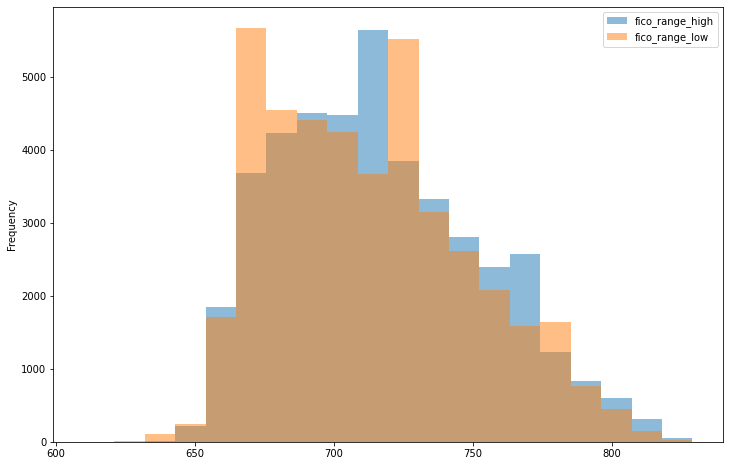

In [ ]:
# plot overlapping histograms to look at the ranges of the 'fico_range_high', and 'fico_range_low'
loan_df_copy[rem_col_list_fico].plot.hist(alpha=0.5,bins=20);

We believe we can generate a new feature from 'fico_range_high', and 'fico_range_low', and that this average will be a better predictor for loan default than them. So we will create this new variable average (average_fico) and then drop 'fico_range_high', and 'fico_range_low'

In [ ]:
loan_df_copy['average_fico'] = (loan_df_copy['fico_range_high'] + loan_df_copy['fico_range_low']) / 2

In [ ]:
# Checking the result of the last computation
loan_df_copy[['fico_range_low','fico_range_high','average_fico']].head()

fico_range_low  fico_range_high  average_fico
0           735.0            739.0         737.0
1           740.0            744.0         742.0
2           735.0            739.0         737.0
3           690.0            694.0         692.0
4           695.0            699.0         697.0

In [ ]:
# list of columns to be removed
rem_col_list7 = ['fico_range_low','fico_range_high']
# drop the columns above due to the reasons stated above
loan_df_copy = loan_df_copy.drop(rem_col_list7, axis=1)

In [ ]:
loan_df_copy.shape

(42535, 34)

**Handling the Target Column**

Since the main goal is to predict the individuals that will pay off a loan or who will default, the only column in the data that describes this is the loan_status column. 

In [ ]:
loan_df_copy['loan_status'].value_counts(dropna=False)

Fully Paid                                             33586
Charged Off                                             5653
Does not meet the credit policy. Status:Fully Paid      1988
Does not meet the credit policy. Status:Charged Off      761
Current                                                  513
In Grace Period                                           16
Late (31-120 days)                                        12
Late (16-30 days)                                          5
Default                                                    1
Name: loan_status, dtype: int64

It can be see from the output above that:

Firstly, this column has 9 unique values, of which many of them refer to same thing.

Secondly, the column contains text values, and they need to be converted to numerical values.

After reading through the LendingClub website to understand the meaning of these unique valuea, these are what we understood that they mean:

Fully Paid -> Loan has been fully paid off.

Charged Off -> Loan for which there is no longer a reasonable expectation of further payments.

Does not meet the credit policy. Status:Fully Paid -> While the loan was paid off, the loan application today would no longer meet the credit policy and wouldn't be approved on to the marketplace.

Does not meet the credit policy. Status:Charged Off -> While the loan was charged off, the loan application today would no longer meet the credit policy and wouldn't be approved on to the marketplace.

Current -> Loan is up to date on current payments.

In Grace Period -> The loan is past due but still in the grace period of 15 days.

Late (31-120 days) -> Loan hasn't been paid in 31 to 120 days (late on the current payment).

Late (16-30 days) -> Loan hasn't been paid in 16 to 30 days (late on the current payment).

Default -> Loan is defaulted on and no payment has been made for more than 121 days.

In [ ]:
loan_df_copy = loan_df_copy[(loan_df_copy["loan_status"] == "Fully Paid") |
(loan_df_copy["loan_status"] == "Charged Off")]
target_map = {"loan_status":{ "Fully Paid": 1, "Charged Off": 0}}
loan_df_copy = loan_df_copy.replace(target_map)

Our reason for doing what we did in above code:

The main goal is to build a machine learning model that can make use of historical data about past loans to predict which loans will be defaulted and those that won't. From the list of unique values of the 'loan_status' variable (our potential target variable), only the Fully Paid and Charged Off values describe the final outcome of a loan, other values describe loans that are still ongoing, and even though some loans are late on payments, we can’t be too sure to classify them as Charged Off.

Also, while the Default status resembles the Charged Off status, to LendingClub’s, loans that are charged off have essentially no chance of being repaid, while defaulted loans have a small chance. Therefore, we should use only samples where the loan_status column is 'Fully Paid' or 'Charged Off'.

In addition, we are not interested in any statuses that indicate that the loan is ongoing or in progress, because predicting that something is in progress doesn’t tell us anything.

We want to treat this problem like a Binary Classification Problem, so we will remove all the loans that don't contain either 'Fully Paid' or 'Charged Off' as the loan’s status and then transform the 'Fully Paid' values to 1 for the positive case and the 'Charged Off' values to 0 for the negative case.

Text(0.5, 1.0, 'Percentage of each Loan status')

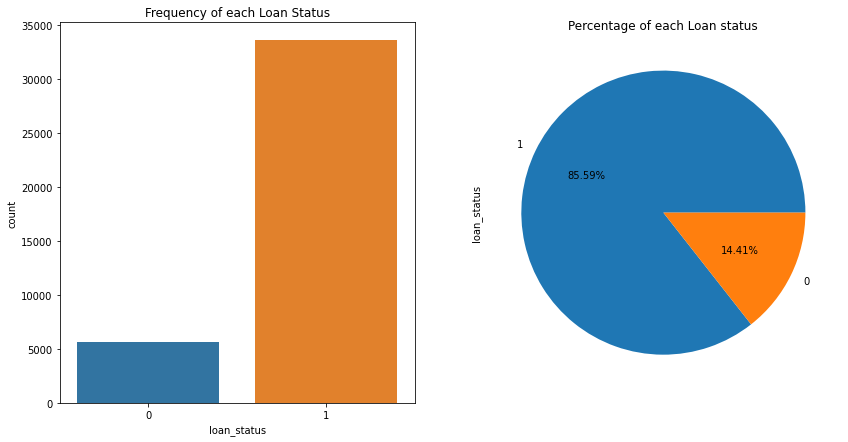

In [ ]:
fig, axs = plt.subplots(1,2,figsize=(14,7))
sns.countplot(x='loan_status',data=loan_df_copy,ax=axs[0])
axs[0].set_title("Frequency of each Loan Status")
loan_df_copy.loan_status.value_counts().plot(x=None,y=None, kind='pie', ax=axs[1],autopct='%1.2f%%')
axs[1].set_title("Percentage of each Loan status")

These plots indicate that a significant number of borrowers in our data set paid off their loan — 85.62% of loan borrowers paid off amount borrowed, while 14.38% unfortunately defaulted. Although, we are mainly interested in the defaulter here, because we want to help LendingClub maximize investment returns, but we will balance the data as this a case of imbalance data. We will treat that later.

In [ ]:
# How many unique values for each of the columns
loan_df_copy.nunique()

loan_amnt                       876
term                              2
installment                   15241
grade                             7
emp_length                       11
home_ownership                    5
annual_inc                     5282
verification_status               3
loan_status                       2
pymnt_plan                        2
purpose                          14
title                         19512
addr_state                       50
dti                            2860
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths                    9
mths_since_last_delinq           95
open_acc                         40
pub_rec                           5
revol_bal                     21517
revol_util                     1089
total_acc                        82
initial_list_status               1
last_credit_pull_d              110
collections_12_mths_ex_med        1
policy_code                       1
application_type            

We want to check out columns that contain only one unique value and remove them as these columns won't be useful for our model; they don't add any information for each of the loan application.

In [ ]:
loan_df_copy = loan_df_copy.loc[:,loan_df_copy.apply(pd.Series.nunique) != 1]

In [ ]:
# using deepcopy to deep copy 
loan_df_copy2 = copy.deepcopy(loan_df_copy)

Also, we want to remove columns (different from the target columns) that very low or insignificant frequency in the data. We will use a threshold of 3.

In [ ]:
for col in loan_df_copy2.columns:
    if (len(loan_df_copy2[col].unique()) < 4):
      print(loan_df_copy2[col].value_counts(dropna=False))
      print()

 36 months    29096
 60 months    10143
Name: term, dtype: int64

Not Verified       16845
Verified           12526
Source Verified     9868
Name: verification_status, dtype: int64

1    33586
0     5653
Name: loan_status, dtype: int64

n    39238
y        1
Name: pymnt_plan, dtype: int64



The 'pymnt_plan' column has two unique values, 'y' and 'n', with 'y' occurring only once. We will drop this column because of that.

In [ ]:
loan_df_copy2.shape

(39239, 26)

In [ ]:
loan_df_copy2 = loan_df_copy2.drop('pymnt_plan', axis=1)

In [ ]:
loan_df_copy2.shape

(39239, 25)

In [ ]:
# isnull() checks missing values in each variable. 
#.sum() adds all the missing values in each variable and displays
loan_df_copy2.isnull().sum()

loan_amnt                     0
term                          0
installment                   0
grade                         0
emp_length                 1057
home_ownership                0
annual_inc                    0
verification_status           0
loan_status                   0
purpose                       0
title                        11
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
mths_since_last_delinq    25352
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                   50
total_acc                     0
last_credit_pull_d            2
pub_rec_bankruptcies        697
average_fico                  0
dtype: int64

In [ ]:
# isnull() checks missing values in each variable. 
# .sum() adds all the missing values in each variable and displays
# Convert to percentages
loan_df_copy2.isnull().sum() * 100/len(loan_df_copy2)

loan_amnt                  0.000000
term                       0.000000
installment                0.000000
grade                      0.000000
emp_length                 2.693749
home_ownership             0.000000
annual_inc                 0.000000
verification_status        0.000000
loan_status                0.000000
purpose                    0.000000
title                      0.028033
addr_state                 0.000000
dti                        0.000000
delinq_2yrs                0.000000
earliest_cr_line           0.000000
inq_last_6mths             0.000000
mths_since_last_delinq    64.609190
open_acc                   0.000000
pub_rec                    0.000000
revol_bal                  0.000000
revol_util                 0.127424
total_acc                  0.000000
last_credit_pull_d         0.005097
pub_rec_bankruptcies       1.776294
average_fico               0.000000
dtype: float64

The percentage of missing value for the 'mths_since_last_delinq' is very much, about 70%, so we will remove the column

In [ ]:
loan_df_copy2 = loan_df_copy2.drop('mths_since_last_delinq', axis=1)

In [ ]:
loan_df_copy2.shape

(39239, 24)

In [ ]:
# isnull() checks missing values in each variable. 
#.sum() adds all the missing values in each variable and displays
loan_df_copy2.isnull().sum()

loan_amnt                  0
term                       0
installment                0
grade                      0
emp_length              1057
home_ownership             0
annual_inc                 0
verification_status        0
loan_status                0
purpose                    0
title                     11
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                50
total_acc                  0
last_credit_pull_d         2
pub_rec_bankruptcies     697
average_fico               0
dtype: int64

It appears that most of the columns have 0 missing values already except for: 

emp_length - which has 1057 missing values

title - which has 11 missing values

revol_util - which has 50 missing values

pub_rec_bankruptcie - which has 697 missing values

last_credit_pull_d - which has 2 missing values

In [ ]:
loan_df_copy2['emp_length'].head()

0    10+ years
1     < 1 year
2    10+ years
3    10+ years
5      3 years
Name: emp_length, dtype: object

In [ ]:
loan_df_copy2['emp_length'].value_counts(dropna=False)

10+ years    8717
< 1 year     4556
2 years      4349
3 years      4054
4 years      3394
5 years      3250
1 year       3214
6 years      2202
7 years      1742
8 years      1459
9 years      1245
NaN          1057
Name: emp_length, dtype: int64

Since the 'emp_length' has a significantly large number of missing values (1057), we believe it will be a pretty good predictor and we don't want to remove the columns. We want to fill the missing values with mode, it being a categorical data.

In [ ]:
loan_df_copy2['emp_length'].fillna(loan_df_copy2['emp_length'].mode()[0], inplace=True)

In [ ]:
loan_df_copy2['title'].head()

0                                 Computer
1                                     bike
2                     real estate business
3                                 personel
5    My wedding loan I promise to pay back
Name: title, dtype: object

In [ ]:
loan_df_copy2['title'].value_counts(dropna=False)

Debt Consolidation                               2144
Debt Consolidation Loan                          1671
Personal Loan                                     650
Consolidation                                     502
debt consolidation                                495
                                                 ... 
makeover                                            1
Working Professional Paying off College Debts       1
Bryan's boat loan                                   1
GIN Success                                         1
you can't beat it                                   1
Name: title, Length: 19513, dtype: int64

On looking at the 'title' column again, it appears that it is a duplicate column because the 'purpose' column gives almost the same meaning with it. The 'title' column also looks inconsistent, so we will drop the column.

In [ ]:
loan_df_copy2 = loan_df_copy2.drop('title', axis=1)

In [ ]:
loan_df_copy2['revol_util'].head()

0    83.7%
1     9.4%
2    98.5%
3      21%
5    28.3%
Name: revol_util, dtype: object

In [ ]:
loan_df_copy2['revol_util'].value_counts(dropna=False)

0%        972
0.2%       63
63%        62
40.7%      59
0.1%       58
         ... 
46.74%      1
2.64%       1
17.78%      1
33.26%      1
49.63%      1
Name: revol_util, Length: 1090, dtype: int64

'revol_util' column should not be categorical, it should be numerical looking at what it means and the fact that it has 1090 unique values from above.

We will strip off the '%" symbol at the end and then convert to float.

In [ ]:
def convert_revol_to_value(text):
  if str(text) != 'nan':
    return float(str(text)[:-1])
  else:
    return text

In [ ]:
loan_df_copy2['revol_util'] = loan_df_copy2['revol_util'].apply(convert_revol_to_value)

In [ ]:
loan_df_copy2['revol_util'].value_counts(dropna=False)

0.00     972
0.20      63
63.00     62
40.70     59
0.10      58
        ... 
5.34       1
7.43       1
4.85       1
3.18       1
49.69      1
Name: revol_util, Length: 1090, dtype: int64

In [ ]:
loan_df_copy2['revol_util'].dtype

dtype('float64')

In [ ]:
loan_df_copy2['revol_util'].describe()

count    39189.000000
mean        48.737661
std         28.350922
min          0.000000
25%         25.300000
50%         49.100000
75%         72.300000
max         99.900000
Name: revol_util, dtype: float64

We will fill the missing values for 'revol_util' column with average values, we would have used median but because the mean value and median value are close so most likely there are no extreme outliers, mean is not robust to outliers but median is robust.

In [ ]:
loan_df_copy2['revol_util'].fillna(loan_df_copy2['revol_util'].mean(), inplace=True)

In [ ]:
loan_df_copy2['pub_rec_bankruptcies'].head()

0    0.0
1    0.0
2    0.0
3    0.0
5    0.0
Name: pub_rec_bankruptcies, dtype: float64

In [ ]:
loan_df_copy2['pub_rec_bankruptcies'].value_counts(dropna=False)

0.0    36872
1.0     1665
NaN      697
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

For the column 'pub_rec_bankruptcies', we assume that if no information abouyt the public record bankruptcies is given then that means they have 0 public record bankruptcies, so we will fill the missing values with 0.

In [ ]:
loan_df_copy2['pub_rec_bankruptcies'].fillna(0, inplace=True)

In [ ]:
# isnull() checks missing values in each variable. 
#.sum() adds all the missing values in each variable and displays
loan_df_copy2.isnull().sum()

loan_amnt               0
term                    0
installment             0
grade                   0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
loan_status             0
purpose                 0
addr_state              0
dti                     0
delinq_2yrs             0
earliest_cr_line        0
inq_last_6mths          0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
last_credit_pull_d      2
pub_rec_bankruptcies    0
average_fico            0
dtype: int64

In [ ]:
# drop the rows because they are just 2 of them
loan_df_copy2.dropna(subset=['last_credit_pull_d'],inplace=True)

In [ ]:
# isnull() checks missing values in each variable. 
#.sum() adds all the missing values in each variable and displays
loan_df_copy2.isnull().sum()

loan_amnt               0
term                    0
installment             0
grade                   0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
loan_status             0
purpose                 0
addr_state              0
dti                     0
delinq_2yrs             0
earliest_cr_line        0
inq_last_6mths          0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
last_credit_pull_d      0
pub_rec_bankruptcies    0
average_fico            0
dtype: int64

In [ ]:
loan_df_copy2.shape

(39237, 23)

Now we want to ensure that all categorical columns are numeric

In [ ]:
# using deepcopy to deep copy 
loan_df_copy3 = copy.deepcopy(loan_df_copy2)

In [ ]:
# Data Types of each of the remaining columns
loan_df_copy3.dtypes

loan_amnt               float64
term                     object
installment             float64
grade                    object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
loan_status               int64
purpose                  object
addr_state               object
dti                     float64
delinq_2yrs             float64
earliest_cr_line         object
inq_last_6mths          float64
open_acc                float64
pub_rec                 float64
revol_bal               float64
revol_util              float64
total_acc               float64
last_credit_pull_d       object
pub_rec_bankruptcies    float64
average_fico            float64
dtype: object

In [ ]:
# Frequencies of each data type
loan_df_copy3.dtypes.value_counts()

float64    13
object      9
int64       1
dtype: int64

From the result above, it shows that we have 9 object columns that contain text which need to be converted into numeric features

These set of columns seem to represent categorical values:

term — number of payments on the loan.

grade — LC assigned loan grade based on credit score.

emp_length — number of years the borrower was employed upon time of application.

home_ownership — home ownership status, can only be 1 of 4 categorical values according to the data dictionary.

verification_status — indicates if income was verified by LendingClub.

purpose — a category provided by the borrower for the loan request.

addr_state — borrower’s state of residence.

.
.
.

While the following 2 columns contain date values that would require feature engineering to make them potentially useful:

earliest_cr_line - The month the borrower’s earliest reported credit line was opened.

last_credit_pull_d - The most recent month LendingClub pulled credit for this loan.

**We want to explore what the unique values and counts of the 7 categorical columns we identified above**

In [ ]:
cat_cols = ['term', 'grade', 'emp_length', 'home_ownership', 'verification_status', 'purpose', 'addr_state']
for col in cat_cols:
    print(col,':')
    print(loan_df_copy3[col].value_counts(),'\n')

term :
 36 months    29094
 60 months    10143
Name: term, dtype: int64 

grade :
B    11877
A    10063
C     7985
D     5213
E     2772
F     1016
G      311
Name: grade, dtype: int64 

emp_length :
10+ years    9774
< 1 year     4555
2 years      4349
3 years      4054
4 years      3394
5 years      3249
1 year       3214
6 years      2202
7 years      1742
8 years      1459
9 years      1245
Name: emp_length, dtype: int64 

home_ownership :
RENT        18713
MORTGAGE    17395
OWN          3028
OTHER          98
NONE            3
Name: home_ownership, dtype: int64 

verification_status :
Not Verified       16843
Verified           12526
Source Verified     9868
Name: verification_status, dtype: int64 

purpose :
debt_consolidation    18370
credit_card            5076
other                  3936
home_improvement       2949
major_purchase         2184
small_business         1795
car                    1536
wedding                 941
medical                 690
moving                  

It appears that the 'addr_state' contains too many unique values, so want to drop it for now.

In [ ]:
# drop addr_state column
loan_df_copy3 = loan_df_copy3.drop('addr_state', axis=1)

There are 2 types of cagorical columns:

Ordinal Columns: These are the columns that have values that are in natural order, we can order them in either increasing or decreasing order,these columns are 'grade', and 'emp_length'

Nominal Columns: The are just normal categorical columns whose values don't have any order, these columns are home_ownership, verification_status, purpose, and term

We will handle these cases differently, we will use dummy variable for nominal columns and use replace method for ordinal columns to replace the categories with numerical values.

In [ ]:
# Create dictionary for ordinal columns mapping
ord_mapping_dict = {
"emp_length": {
"10+ years": 10,
"9 years": 9,
"8 years": 8,
"7 years": 7,
"6 years": 6,
"5 years": 5,
"4 years": 4,
"3 years": 3,
"2 years": 2,
"1 year": 1,
"< 1 year": 0,
"n/a": 0
},
"grade":{
"A": 1,
"B": 2,
"C": 3,
"D": 4,
"E": 5,
"F": 6,
"G": 7
}
}

In [ ]:
# replace values using mappings created
loan_df_copy3 = loan_df_copy3.replace(ord_mapping_dict)

In [ ]:
# Check result of the encodings
loan_df_copy3[['emp_length','grade']].head()

emp_length  grade
0          10      2
1           0      3
2          10      3
3          10      3
5           3      1

In [ ]:
nom_cols = ["home_ownership", "verification_status", "purpose", "term"]
dummy_df = pd.get_dummies(loan_df_copy3[nom_cols])
loan_df_copy3 = pd.concat([loan_df_copy3, dummy_df], axis=1)
loan_df_copy3 = loan_df_copy3.drop(nom_cols, axis=1)

In [ ]:
loan_df_copy3.head()

loan_amnt  installment  grade  emp_length  annual_inc  loan_status    dti  \
0     5000.0       162.87      2          10     24000.0            1  27.65   
1     2500.0        59.83      3           0     30000.0            0   1.00   
2     2400.0        84.33      3          10     12252.0            1   8.72   
3    10000.0       339.31      3          10     49200.0            1  20.00   
5     5000.0       156.46      1           3     36000.0            1  11.20   

   delinq_2yrs earliest_cr_line  inq_last_6mths  open_acc  pub_rec  revol_bal  \
0          0.0         Jan-1985             1.0       3.0      0.0    13648.0   
1          0.0         Apr-1999             5.0       3.0      0.0     1687.0   
2          0.0         Nov-2001             2.0       2.0      0.0     2956.0   
3          0.0         Feb-1996             1.0      10.0      0.0     5598.0   
5          0.0         Nov-2004             3.0       9.0      0.0     7963.0   

   revol_util  total_acc last_credit_pull_d  pub_rec_bankruptcies  \
0        83.7        9.0           Sep-2016                   0.0   
1         9.4        4.0           Sep-2016                   0.0   
2        98.5       10.0           Sep-2016                   0.0   
3        21.0       37.0           Apr-2016                   0.0   
5        28.3       12.0           Jan-2016                   0.0   

   average_fico  home_ownership_MORTGAGE  home_ownership_NONE  \
0         737.0                        0                    0   
1         742.0                        0                    0   
2         737.0                        0                    0   
3         692.0                        0                    0   
5         732.0                        0                    0   

   home_ownership_OTHER  home_ownership_OWN  home_ownership_RENT  \
0                     0                   0                    1   
1                     0                   0                    1   
2                     0                   0                    1   
3                     0                   0                    1   
5                     0                   0                    1   

   verification_status_Not Verified  verification_status_Source Verified  \
0                                 0                                    0   
1                                 0                                    1   
2                                 1                                    0   
3                                 0                                    1   
5                                 0                                    1   

   verification_status_Verified  purpose_car  purpose_credit_card  \
0                             1            0                    1   
1                             0            1                    0   
2                             0            0                    0   
3                             0            0                    0   
5                             0            0                    0   

   purpose_debt_consolidation  purpose_educational  purpose_home_improvement  \
0                           0                    0                         0   
1                           0                    0                         0   
2                           0                    0                         0   
3                           0                    0                         0   
5                           0                    0                         0   

   purpose_house  purpose_major_purchase  purpose_medical  purpose_moving  \
0              0                       0                0               0   
1              0                       0                0               0   
2              0                       0                0               0   
3              0                       0                0               0   
5              0                       0                0               0   

   p

We will go ahead to resolve issues with the date fields we recognized earlier on, which are:



In [ ]:
loan_df_copy3.dtypes

loan_amnt                              float64
installment                            float64
grade                                    int64
emp_length                               int64
annual_inc                             float64
loan_status                              int64
dti                                    float64
delinq_2yrs                            float64
earliest_cr_line                        object
inq_last_6mths                         float64
open_acc                               float64
pub_rec                                float64
revol_bal                              float64
revol_util                             float64
total_acc                              float64
last_credit_pull_d                      object
pub_rec_bankruptcies                   float64
average_fico                           float64
home_ownership_MORTGAGE                  uint8
home_ownership_NONE                      uint8
home_ownership_OTHER                     uint8
home_ownershi

In [ ]:
loan_df_copy3[['earliest_cr_line', 'last_credit_pull_d']].head()

earliest_cr_line last_credit_pull_d
0         Jan-1985           Sep-2016
1         Apr-1999           Sep-2016
2         Nov-2001           Sep-2016
3         Feb-1996           Apr-2016
5         Nov-2004           Jan-2016

We want to engineer this features to get features that describe how many years since that date till now. In our case, we want to use Nov-2021 as current date to reference.

so the feature 'earliest_cr_line', will be number of year since earliest credit line ('num_yr_earl_cr_line').

And the feature 'last_credit_pull_d', will be number of year since last time LendingClub pulled credit for the loan ('num_yr_lt_credit_pull').

In [ ]:
# first convert the dates to standard python datetime format
# A function that calculates the number of years between 2 different dates
def convert_date_to_years(old_date):
  old_date = datetime.strptime(old_date, "%b-%Y")
  ref_date = datetime.strptime("Nov-2021", "%b-%Y")
  diff_date = ref_date - old_date
  diff_years = int(round(diff_date.days/365.25))
  return diff_years

In [ ]:
# create new column for the engineered feature
loan_df_copy3['num_yr_earl_cr_line'] = loan_df_copy3['earliest_cr_line'].apply(convert_date_to_years)
loan_df_copy3['num_yr_lt_credit_pull'] = loan_df_copy3['last_credit_pull_d'].apply(convert_date_to_years)

In [ ]:
loan_df_copy3[['earliest_cr_line', 'num_yr_earl_cr_line', 'last_credit_pull_d', 'num_yr_lt_credit_pull']]

earliest_cr_line  num_yr_earl_cr_line last_credit_pull_d  \
0             Jan-1985                   37           Sep-2016   
1             Apr-1999                   23           Sep-2016   
2             Nov-2001                   20           Sep-2016   
3             Feb-1996                   26           Apr-2016   
5             Nov-2004                   17           Jan-2016   
...                ...                  ...                ...   
39781         Nov-1990                   31           Jun-2010   
39782         Dec-1986                   35           Jul-2010   
39783         Oct-1998                   23           Jun-2007   
39784         Nov-1988                   33           Jun-2007   
39785         Oct-2003                   18           Jun-2010   

       num_yr_lt_credit_pull  
0                          5  
1                          5  
2                          5  
3                          6  
5                          6  
...                      ...  
39781                     11  
39782                     11  
39783                     14  
39784                     14  
39785                     11  

[39237 rows x 4 columns]

In [ ]:
# drop the 2 columns since we have already used them for feature engineering
loan_df_copy3.drop(['earliest_cr_line', 'last_credit_pull_d'], axis = 1, inplace=True)

**We want to identify outliers and treat them accordingly**

In [ ]:
# List of Continuous Data columns
cont_col_list = [
                 'loan_amnt',
                 'installment',
                 'annual_inc',
                 'dti',
                 'delinq_2yrs',
                 'inq_last_6mths',
                 'open_acc',
                 'pub_rec',
                 'revol_bal',
                 'revol_util',
                 'total_acc',
                 'pub_rec_bankruptcies',
                 'average_fico',
                 'num_yr_earl_cr_line',
                 'num_yr_lt_credit_pull'
]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


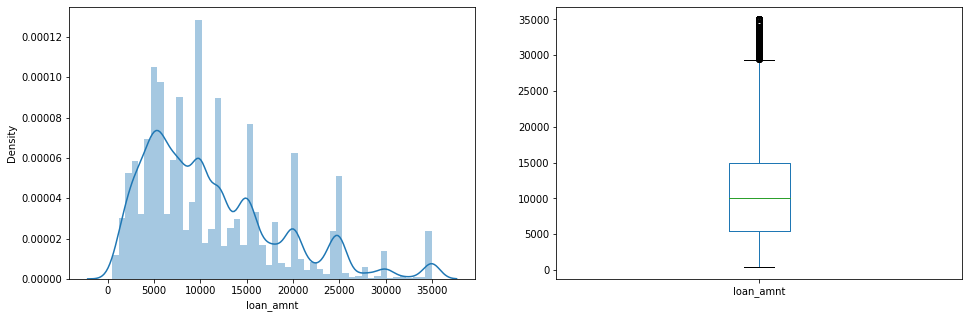

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


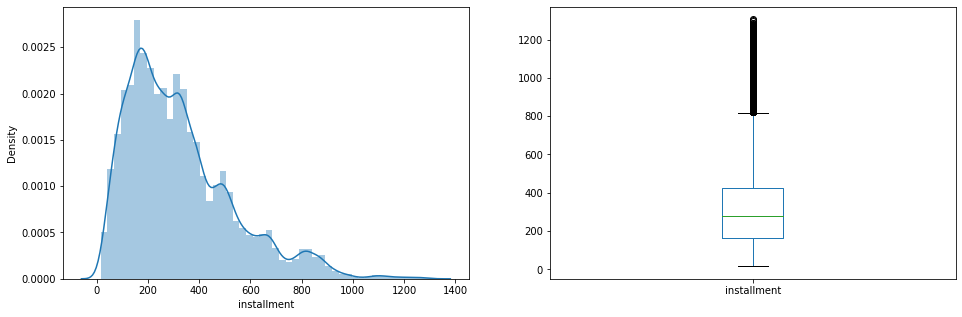

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


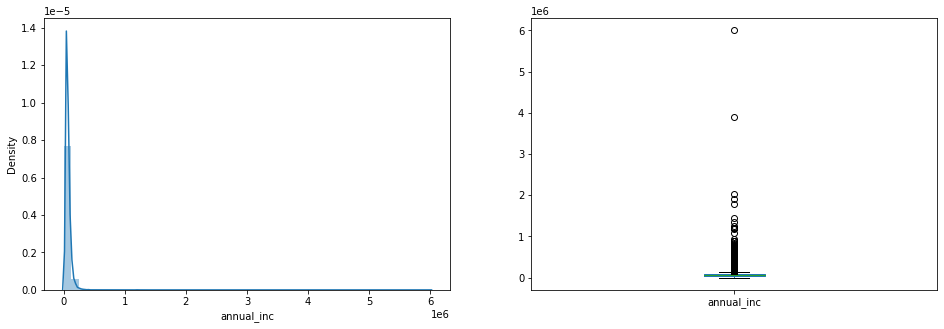

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


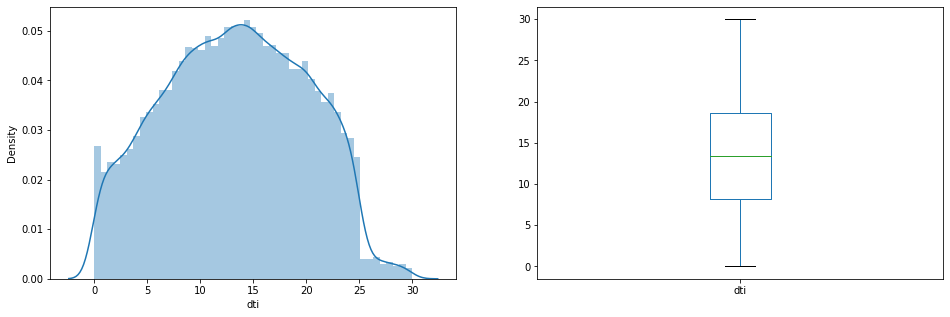

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


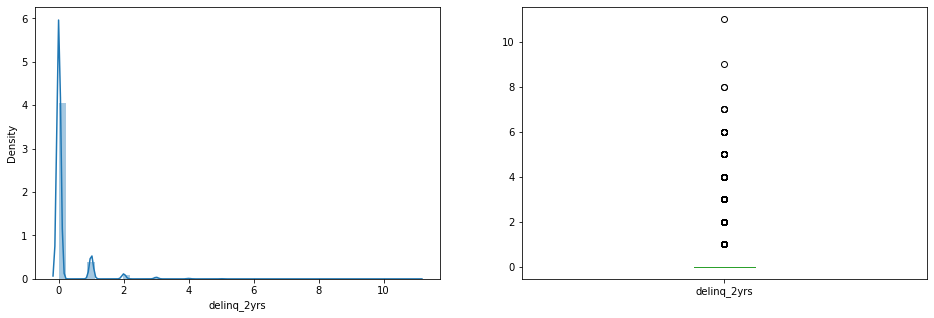

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


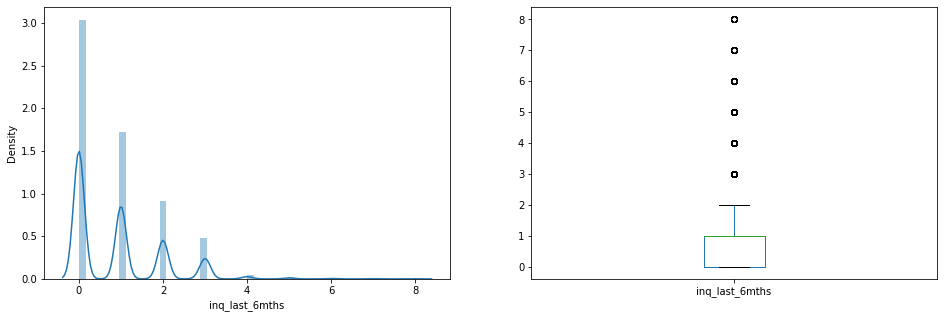

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


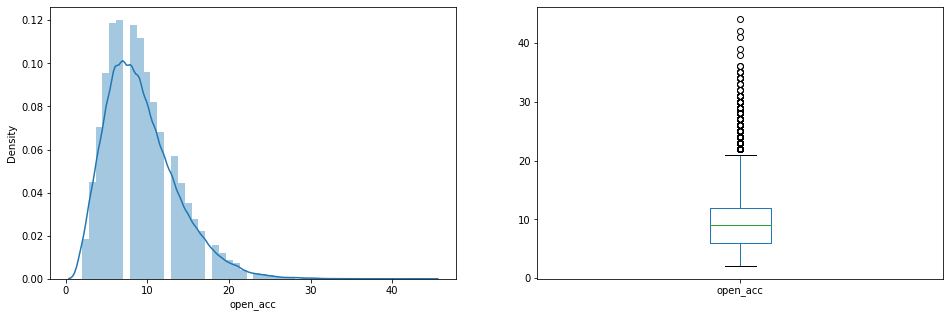

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


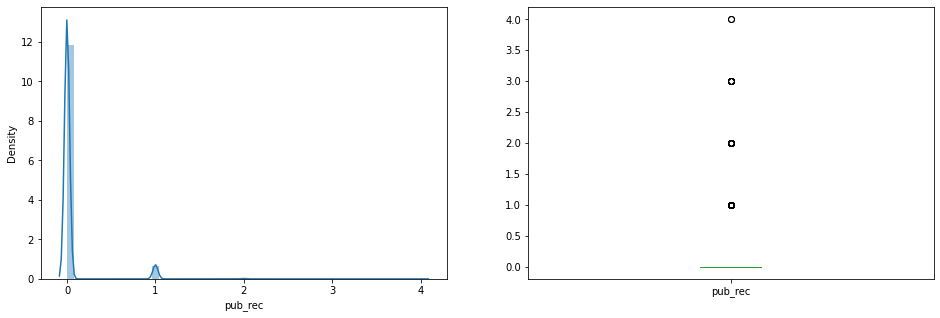

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


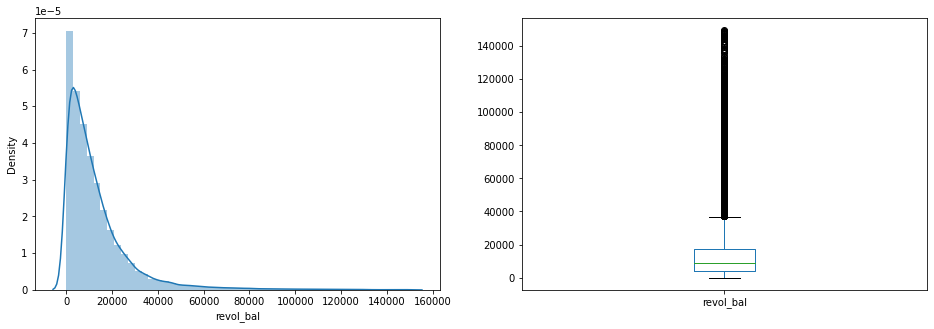

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


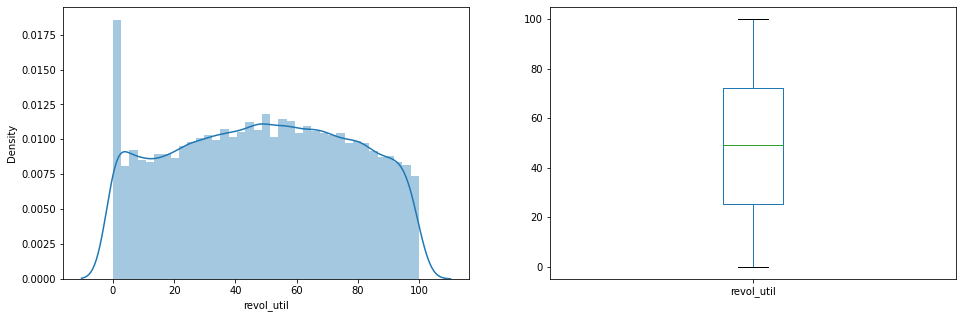

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


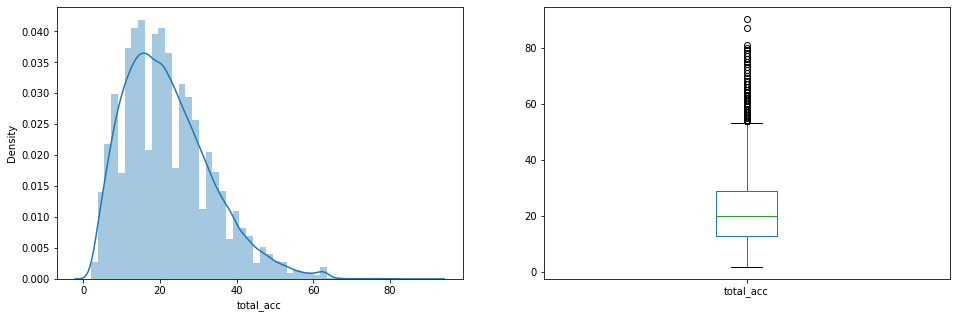

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


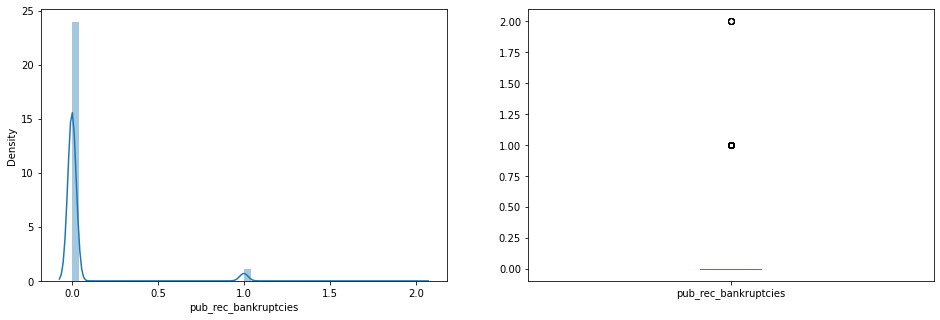

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


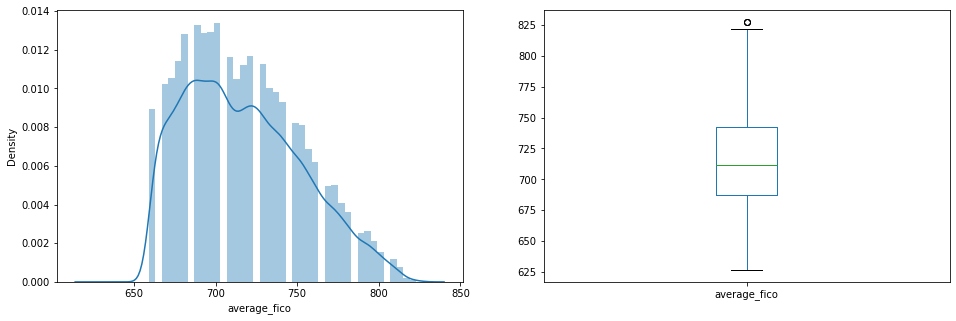

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


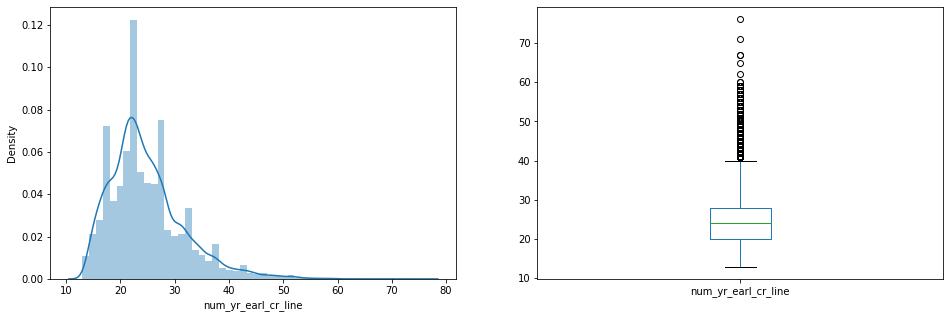

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


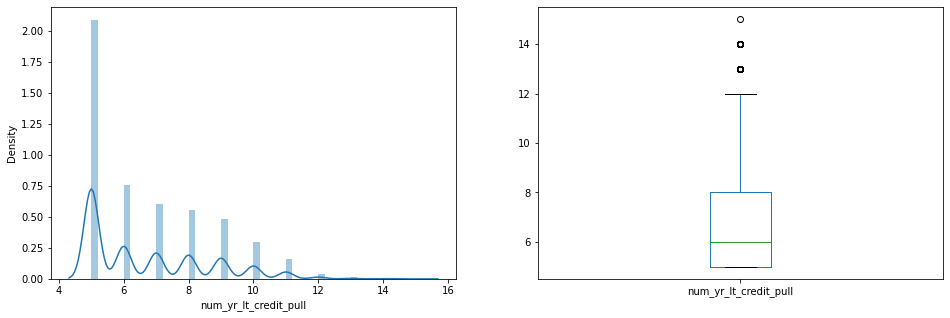

In [ ]:
# Visualization of the Distribution of Numerical Features and
# Identification of Outliers via visualization
for col in cont_col_list:
  plt.figure(1)
  plt.subplot(121)
  sns.distplot(loan_df_copy3[col])

  plt.subplot(122)
  loan_df_copy3[col].plot.box(figsize=(16,5))

  plt.show()

In [ ]:
# using deepcopy to deep copy 
loan_df_copy4 = copy.deepcopy(loan_df_copy3)

In [ ]:
# Outlier Detection and Treatment using IQR 

def outlier_treatment(data_column):
    sorted(data_column)
    Q1, Q3 = np.percentile(data_column, [25, 75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

The Outliers were handled differently, some were dropped, especially the ones that have about 1600 rows or less, but for columns whose outliers were very much, we used the median of that column to replace the outliers, median is a statistics that is robust to outliers. We also thought of not treating some outliers because we still want our model to be robust to cases where new individual requesting for loan is an outlier, say receives extremely high annual income.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


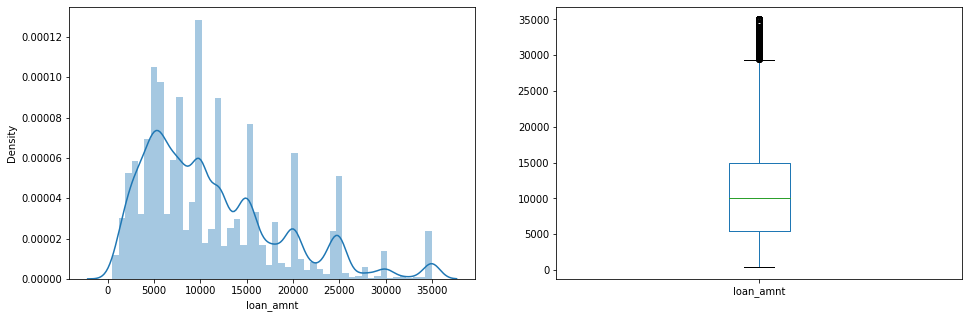

In [ ]:
# Visually Identifying the outlier for loan_amnt 
plt.figure(1)
plt.subplot(121)
sns.distplot(loan_df_copy4['loan_amnt'])

plt.subplot(122)
loan_df_copy4['loan_amnt'].plot.box(figsize=(16,5))

plt.show()

In [ ]:
lower_bound, upper_bound = outlier_treatment(loan_df_copy4.loan_amnt)

In [ ]:
loan_df_copy4[(loan_df_copy4.loan_amnt < lower_bound) | (loan_df_copy4.loan_amnt > upper_bound)]

loan_amnt  installment  grade  emp_length  annual_inc  loan_status  \
31       31825.0       995.82      1           5     75000.0            1   
80       35000.0       551.84      4           3    150000.0            1   
128      35000.0      1111.37      1           6    125000.0            1   
185      35000.0      1140.07      2           2    168000.0            1   
209      29500.0       786.51      5           6     83000.0            1   
...          ...          ...    ...         ...         ...          ...   
19864    32000.0       863.01      7           5     62400.0            1   
19875    32000.0       843.19      6           8     93500.0            1   
19889    30000.0       735.94      5           6    110000.0            1   
19902    30000.0       759.85      5          10    360000.0            1   
19921    35000.0       936.66      7           2    250000.0            1   

         dti  delinq_2yrs  inq_last_6mths  open_acc  pub_rec  revol_bal  \
31     14.03          0.0             0.0      12.0      0.0    23151.0   
80      7.51          0.0             1.0      11.0      0.0     7334.0   
128    22.71          0.0             0.0       8.0      0.0     9051.0   
185     3.17          1.0             1.0      16.0      0.0     1099.0   
209    20.93          0.0             0.0      12.0      0.0    22087.0   
...      ...          ...             ...       ...      ...        ...   
19864  13.04          0.0             0.0       4.0      0.0    27618.0   
19875  16.36          0.0             0.0      10.0      1.0    33036.0   
19889   9.03          0.0             0.0      10.0      0.0    31675.0   
19902  11.35          0.0             3.0      17.0      0.0    51087.0   
19921  20.64          1.0             0.0       9.0      0.0    89053.0   

       revol_util  total_acc  pub_rec_bankruptcies  average_fico  \
31           27.4       26.0                   0.0         762.0   
80           53.3       31.0                   0.0         727.0   
128          34.8       32.0                   0.0         742.0   
185           1.4       22.0                   0.0         762.0   
209          89.8       35.0                   0.0         692.0   
...           ...        ...                   ...           ...   
19864        97.2       11.0                   0.0         687.0   
19875        73.9       12.0                   1.0         672.0   
19889        55.2       37.0                   0.0         742.0   
19902        89.3       48.0                   0.0         712.0   
19921        93.3       18.0                   0.0         672.0   

       home_ownership_MORTGAGE  home_ownership_NONE  home_ownership_OTHER  \
31                           1                    0                     0   
80                           1                    0                     0   
128                          1                    0                     0   
185                          1                    0                     0   
209                          1                    0                     0   
...                        ...                  ...                   ...   
19864                        0                    0                     0   
19875                        0                    0                     0   
19889                        1                    0                     0   
19902                        1                    0                     0   
19921                        1                    0                     0   

       home_ownership_OWN  home_ownership_RENT  \
31                      0                    0   
80                      0                    0   
128                     0                    0   
185                     0                    0   
209                     0                    0   
...                   ...                  ...   
19864                   0                    1   
19875                   0              

In [ ]:
loan_df_copy4.drop(loan_df_copy4[(loan_df_copy4.loan_amnt > upper_bound) | (loan_df_copy4.loan_amnt < lower_bound)].index, inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


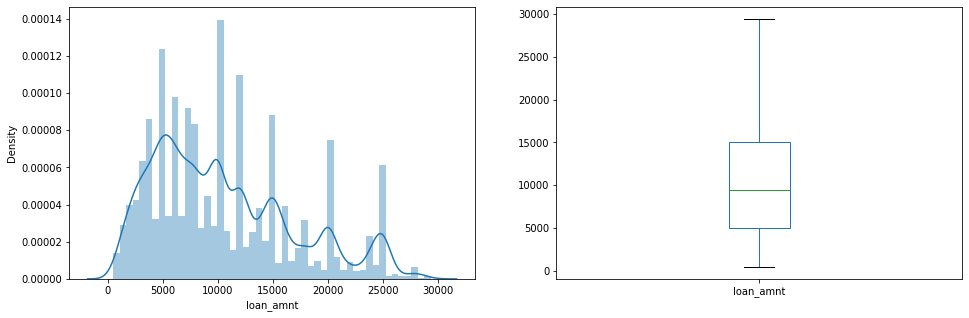

In [ ]:
# Visually Identifying the outlier for loan_amnt 
plt.figure(1)
plt.subplot(121)
sns.distplot(loan_df_copy4['loan_amnt'])

plt.subplot(122)
loan_df_copy4['loan_amnt'].plot.box(figsize=(16,5))

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


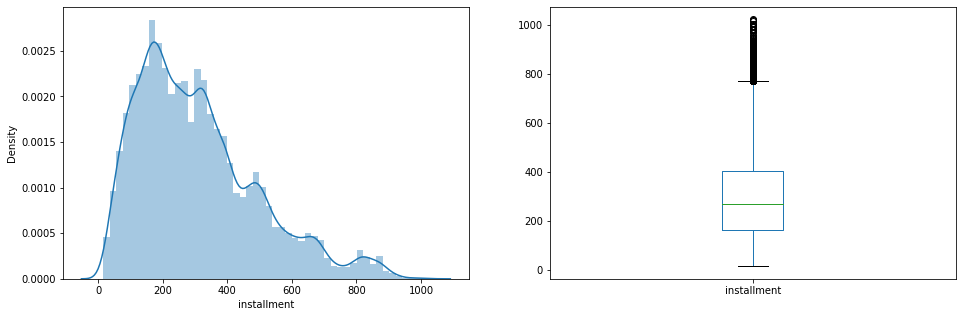

In [ ]:
# Visually Identifying the outlier for installment 
plt.figure(1)
plt.subplot(121)
sns.distplot(loan_df_copy4['installment'])

plt.subplot(122)
loan_df_copy4['installment'].plot.box(figsize=(16,5))

plt.show()

In [ ]:
lower_bound, upper_bound = outlier_treatment(loan_df_copy4.installment)

In [ ]:
loan_df_copy4[(loan_df_copy4.installment < lower_bound) | (loan_df_copy4.installment > upper_bound)]

loan_amnt  installment  grade  emp_length  annual_inc  loan_status  \
51       25600.0       824.96      2           9    110000.0            1   
106      24000.0       781.76      2          10     45000.0            1   
131      24000.0       843.30      3           8     90000.0            0   
170      25000.0       835.39      2           2    225000.0            1   
190      24000.0       805.08      2          10     75000.0            1   
...          ...          ...    ...         ...         ...          ...   
39624    24750.0       790.86      2           4     60000.0            1   
39649    25000.0       802.47      2           0     78000.0            1   
39652    25000.0       795.11      2          10     57000.0            1   
39653    25000.0       839.95      4           2     75000.0            0   
39765    25000.0       813.65      3           2     48000.0            1   

         dti  delinq_2yrs  inq_last_6mths  open_acc  pub_rec  revol_bal  \
51     15.71          0.0             0.0      11.0      0.0    26088.0   
106    14.80          0.0             0.0       5.0      0.0    24708.0   
131     9.17          0.0             1.0       9.0      0.0    30952.0   
170     8.32          1.0             0.0      11.0      0.0    30449.0   
190    11.60          0.0             0.0      10.0      0.0    21609.0   
...      ...          ...             ...       ...      ...        ...   
39624   0.82          0.0             0.0       8.0      0.0      916.0   
39649   0.80          0.0             1.0       8.0      0.0    10605.0   
39652   8.93          0.0             0.0       9.0      0.0      185.0   
39653  24.85          0.0             3.0      14.0      0.0    62739.0   
39765   4.05          0.0             0.0       5.0      0.0     2422.0   

       revol_util  total_acc  pub_rec_bankruptcies  average_fico  \
51           62.0       27.0                   0.0         727.0   
106          55.2        9.0                   0.0         727.0   
131          71.2       23.0                   0.0         717.0   
170          34.6       23.0                   0.0         712.0   
190          84.6       33.0                   0.0         702.0   
...           ...        ...                   ...           ...   
39624         6.8        8.0                   0.0         767.0   
39649        22.1       27.0                   0.0         732.0   
39652         0.5       18.0                   0.0         822.0   
39653        74.7       33.0                   0.0         722.0   
39765        23.3       12.0                   0.0         762.0   

       home_ownership_MORTGAGE  home_ownership_NONE  home_ownership_OTHER  \
51                           0                    0                     0   
106                          0                    0                     0   
131                          1                    0                     0   
170                          0                    0                     0   
190                          0                    0                     0   
...                        ...                  ...                   ...   
39624                        0                    0                     0   
39649                        1                    0                     0   
39652                        1                    0                     0   
39653                        1                    0                     0   
39765                        0                    0                     0   

       home_ownership_OWN  home_ownership_RENT  \
51                      0                    1   
106                     0                    1   
131                     0                    0   
170                     0                    1   
190                     0                    1   
...                   ...                  ...   
39624                   0                    1   
39649                   0              

In [ ]:
loan_df_copy4.drop(loan_df_copy4[(loan_df_copy4.installment > upper_bound) | (loan_df_copy4.installment < lower_bound)].index, inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


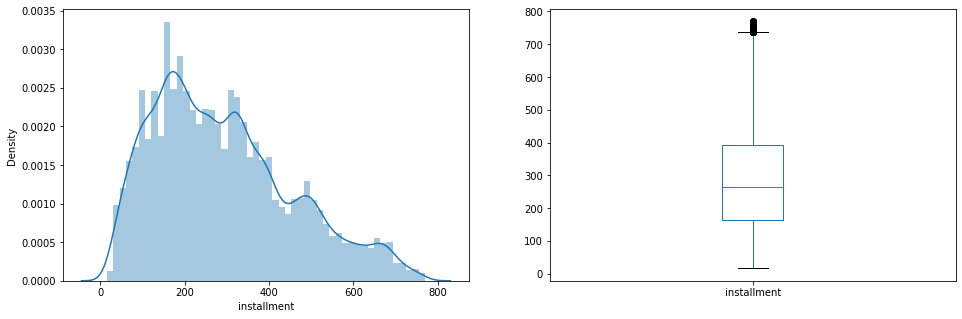

In [ ]:
# Visually Identifying the outlier for installment
plt.figure(1)
plt.subplot(121)
sns.distplot(loan_df_copy4['installment'])

plt.subplot(122)
loan_df_copy4['installment'].plot.box(figsize=(16,5))

plt.show()

In [ ]:
loan_df_copy4.shape

(36977, 42)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


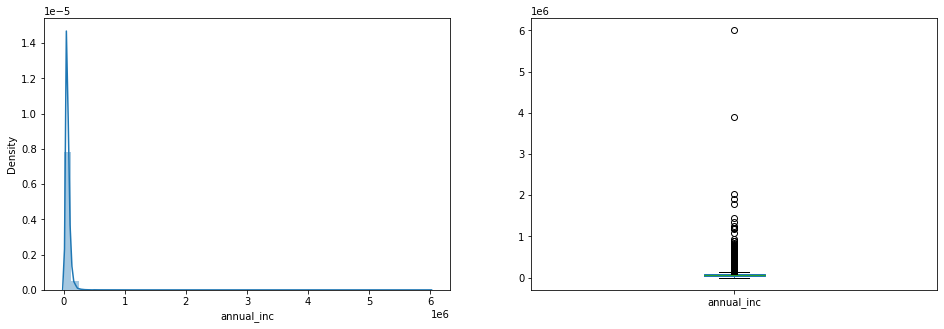

In [ ]:
# Visually Identifying the outlier for annual_inc
plt.figure(1)
plt.subplot(121)
sns.distplot(loan_df_copy4['annual_inc'])

plt.subplot(122)
loan_df_copy4['annual_inc'].plot.box(figsize=(16,5))

plt.show()

In [ ]:
lower_bound, upper_bound = outlier_treatment(loan_df_copy4.annual_inc)
loan_df_copy4[(loan_df_copy4.annual_inc < lower_bound) | (loan_df_copy4.annual_inc > upper_bound)]

loan_amnt  installment  grade  emp_length  annual_inc  loan_status  \
74       14400.0       457.25      1           0    150000.0            1   
193      28000.0       704.64      4           5    140000.0            1   
228       1500.0        53.69      4          10    144000.0            1   
298       8000.0       264.61      2           1    150000.0            1   
331      15000.0       501.23      2           6    155000.0            1   
...          ...          ...    ...         ...         ...          ...   
39763     5000.0       155.38      1           8    150000.0            1   
39772     3000.0        97.20      3           2    200000.0            1   
39775     5000.0       156.84      1           0    180000.0            1   
39776     5000.0       159.77      2           2    180000.0            1   
39784     5000.0       155.38      1           0    200000.0            1   

         dti  delinq_2yrs  inq_last_6mths  open_acc  pub_rec  revol_bal  \
74     14.85          0.0             0.0      12.0      0.0    63864.0   
193    12.07          0.0             1.0      13.0      0.0     2686.0   
228     8.23          1.0             0.0       6.0      0.0    14186.0   
298     2.48          1.0             0.0       5.0      0.0     9722.0   
331    17.85          0.0             0.0      14.0      0.0    68319.0   
...      ...          ...             ...       ...      ...        ...   
39763   0.00          0.0             0.0       2.0      0.0     6053.0   
39772   0.00          1.0             0.0       5.0      0.0        0.0   
39775   5.55          0.0             0.0      12.0      0.0    40934.0   
39776  11.93          0.0             1.0      16.0      0.0    60568.0   
39784   3.72          0.0             0.0      17.0      0.0    85607.0   

       revol_util  total_acc  pub_rec_bankruptcies  average_fico  \
74           55.0       38.0                   0.0         722.0   
193          13.4       24.0                   0.0         717.0   
228          97.8       14.0                   0.0         667.0   
298          56.2        8.0                   0.0         702.0   
331          74.9       41.0                   0.0         692.0   
...           ...        ...                   ...           ...   
39763        19.5       19.0                   0.0         777.0   
39772         0.0        8.0                   0.0         677.0   
39775        26.3       39.0                   0.0         742.0   
39776        39.2       38.0                   0.0         717.0   
39784         0.7       26.0                   0.0         812.0   

       home_ownership_MORTGAGE  home_ownership_NONE  home_ownership_OTHER  \
74                           0                    0                     0   
193                          1                    0                     0   
228                          1                    0                     0   
298                          0                    0                     0   
331                          0                    0                     0   
...                        ...                  ...                   ...   
39763                        1                    0                     0   
39772                        1                    0                     0   
39775                        1                    0                     0   
39776                        1                    0                     0   
39784                        1                    0                     0   

       home_ownership_OWN  home_ownership_RENT  \
74                      1                    0   
193                     0                    0   
228                     0                    0   
298                     0                    1   
331                     1                    0   
...                   ...                  ...   
39763                   0                    0   
39772                   0              

In [ ]:
loan_df_copy4.drop(loan_df_copy4[(loan_df_copy4.annual_inc > upper_bound) | (loan_df_copy4.annual_inc < lower_bound)].index, inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


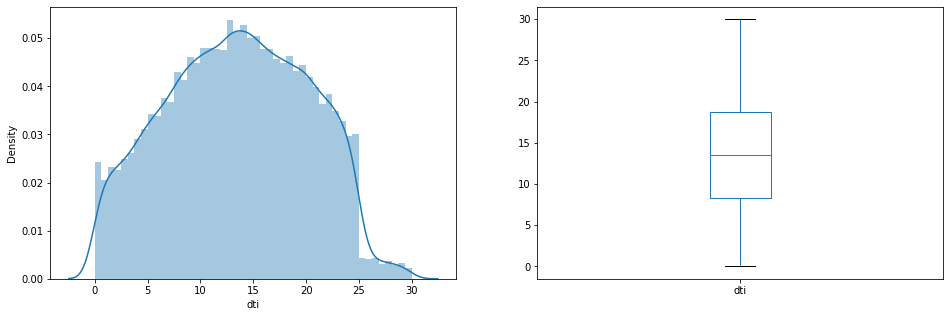

In [ ]:
# Visually Identifying the outlier for dti
plt.figure(1)
plt.subplot(121)
sns.distplot(loan_df_copy4['dti'])

plt.subplot(122)
loan_df_copy4['dti'].plot.box(figsize=(16,5))

plt.show()

In [ ]:
lower_bound, upper_bound = outlier_treatment(loan_df_copy4.dti)
loan_df_copy4[(loan_df_copy4.dti < lower_bound) | (loan_df_copy4.dti > upper_bound)]

Empty DataFrame
Columns: [loan_amnt, installment, grade, emp_length, annual_inc, loan_status, dti, delinq_2yrs, inq_last_6mths, open_acc, pub_rec, revol_bal, revol_util, total_acc, pub_rec_bankruptcies, average_fico, home_ownership_MORTGAGE, home_ownership_NONE, home_ownership_OTHER, home_ownership_OWN, home_ownership_RENT, verification_status_Not Verified, verification_status_Source Verified, verification_status_Verified, purpose_car, purpose_credit_card, purpose_debt_consolidation, purpose_educational, purpose_home_improvement, purpose_house, purpose_major_purchase, purpose_medical, purpose_moving, purpose_other, purpose_renewable_energy, purpose_small_business, purpose_vacation, purpose_wedding, term_ 36 months, term_ 60 months, num_yr_earl_cr_line, num_yr_lt_credit_pull]
Index: []

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


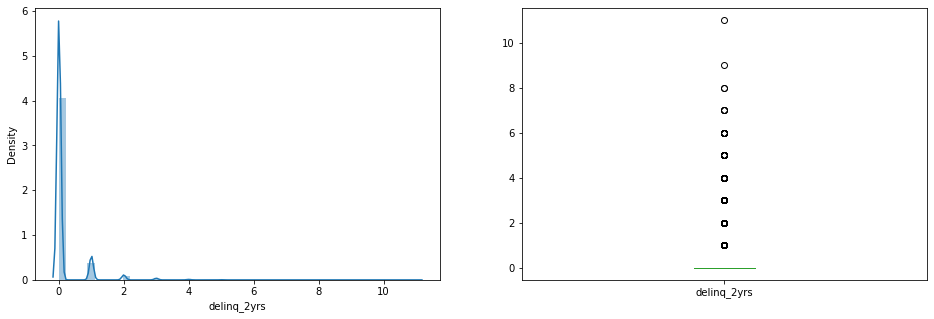

In [ ]:
# Visually Identifying the outlier for delinq_2yrs
plt.figure(1)
plt.subplot(121)
sns.distplot(loan_df_copy4['delinq_2yrs'])

plt.subplot(122)
loan_df_copy4['delinq_2yrs'].plot.box(figsize=(16,5))

plt.show()

In [ ]:
lower_bound, upper_bound = outlier_treatment(loan_df_copy4.delinq_2yrs)
loan_df_copy4[(loan_df_copy4.delinq_2yrs < lower_bound) | (loan_df_copy4.delinq_2yrs > upper_bound)]

loan_amnt  installment  grade  emp_length  annual_inc  loan_status  \
18        6000.0       198.46      2           1     84000.0            1   
27        5000.0       123.65      4           2     50004.0            0   
28        4000.0       132.31      2          10    106000.0            1   
93       10500.0       352.23      2          10     66000.0            1   
136       6000.0       198.46      2           1     90000.0            1   
...          ...          ...    ...         ...         ...          ...   
39748     3500.0       109.79      1           5     98000.0            1   
39753    12000.0       397.75      4           1     65000.0            1   
39759    12250.0       398.69      3           3     60000.0            1   
39782     8500.0       275.38      3           3     18000.0            1   
39785     7500.0       255.43      5           0     22000.0            1   

         dti  delinq_2yrs  inq_last_6mths  open_acc  pub_rec  revol_bal  \
18     18.44          2.0             0.0       4.0      0.0        0.0   
27     13.97          3.0             0.0      14.0      0.0     4345.0   
28      5.63          1.0             0.0      12.0      0.0     6110.0   
93     20.73          1.0             2.0       8.0      0.0     5790.0   
136     2.97          1.0             0.0      10.0      0.0     8489.0   
...      ...          ...             ...       ...      ...        ...   
39748   8.52          1.0             0.0      19.0      0.0     6432.0   
39753   7.14          2.0             0.0       6.0      0.0    11868.0   
39759  17.12          1.0             2.0      10.0      0.0    17214.0   
39782   6.40          1.0             1.0       6.0      0.0     8847.0   
39785  14.29          1.0             0.0       7.0      0.0     4175.0   

       revol_util  total_acc  pub_rec_bankruptcies  average_fico  \
18          37.73       14.0                   0.0         687.0   
27          59.50       22.0                   0.0         677.0   
28          37.70       44.0                   0.0         682.0   
93          51.20       26.0                   0.0         697.0   
136         56.60       23.0                   0.0         682.0   
...           ...        ...                   ...           ...   
39748        6.00       37.0                   0.0         752.0   
39753       71.90       23.0                   0.0         682.0   
39759        8.10       24.0                   0.0         747.0   
39782       26.90        9.0                   0.0         692.0   
39785       51.50        8.0                   0.0         662.0   

       home_ownership_MORTGAGE  home_ownership_NONE  home_ownership_OTHER  \
18                           1                    0                     0   
27                           0                    0                     0   
28                           1                    0                     0   
93                           0                    0                     0   
136                          0                    0                     0   
...                        ...                  ...                   ...   
39748                        0                    0                     0   
39753                        0                    0                     0   
39759                        0                    0                     0   
39782                        0                    0                     0   
39785                        0                    0                     0   

       home_ownership_OWN  home_ownership_RENT  \
18                      0                    0   
27                      0                    1   
28                      0                    0   
93                      0                    1   
136                     0                    1   
...                   ...                  ...   
39748                   0                    1   
39753                   0              

In [ ]:
# median_d2 = loan_df_copy4.delinq_2yrs.median()
# loan_df_copy4.loc[(loan_df_copy4.delinq_2yrs < lower_bound) | (loan_df_copy4.delinq_2yrs > upper_bound), 'delinq_2yrs'] = np.nan
# loan_df_copy4['delinq_2yrs'].fillna(median_d2, inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


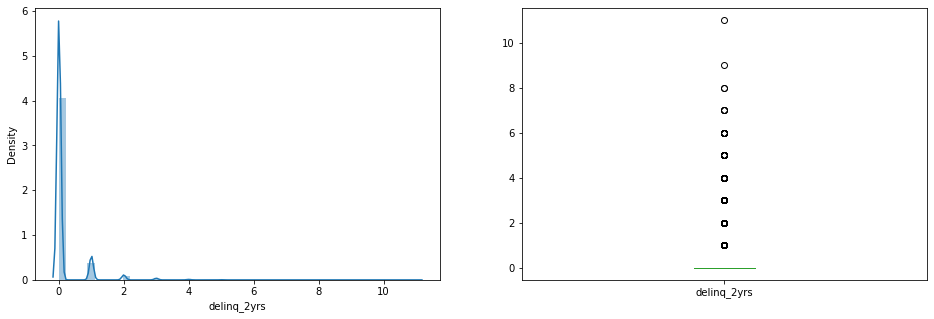

In [ ]:
# Visually Identifying the outlier for delinq_2yrs
plt.figure(1)
plt.subplot(121)
sns.distplot(loan_df_copy4['delinq_2yrs'])

plt.subplot(122)
loan_df_copy4['delinq_2yrs'].plot.box(figsize=(16,5))

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


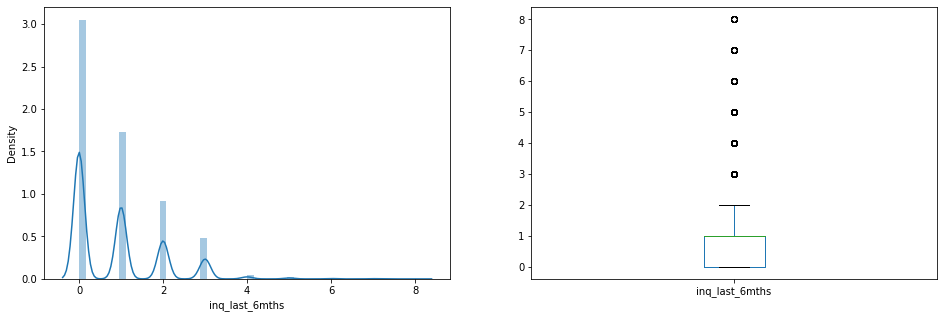

In [ ]:
# Visually Identifying the outlier for inq_last_6mths
plt.figure(1)
plt.subplot(121)
sns.distplot(loan_df_copy4['inq_last_6mths'])

plt.subplot(122)
loan_df_copy4['inq_last_6mths'].plot.box(figsize=(16,5))

plt.show()

In [ ]:
lower_bound, upper_bound = outlier_treatment(loan_df_copy4.inq_last_6mths)
loan_df_copy4[(loan_df_copy4.inq_last_6mths < lower_bound) | (loan_df_copy4.inq_last_6mths > upper_bound)]

loan_amnt  installment  grade  emp_length  annual_inc  loan_status  \
1         2500.0        59.83      3           0     30000.0            0   
5         5000.0       156.46      1           3     36000.0            1   
20       20250.0       484.63      3           3     43370.0            1   
56       16000.0       423.11      5           7     81000.0            1   
58       10000.0       325.74      2           2     51400.0            1   
...          ...          ...    ...         ...         ...          ...   
39735    15450.0       507.46      3           2     40000.0            0   
39737     2500.0        80.26      2           0     75000.0            0   
39739     8000.0       257.99      2           3     48000.0            1   
39756    12000.0       401.37      4           9     75000.0            1   
39778     5000.0       164.23      3           0     80000.0            1   

         dti  delinq_2yrs  inq_last_6mths  open_acc  pub_rec  revol_bal  \
1       1.00          0.0             5.0       3.0      0.0     1687.0   
5      11.20          0.0             3.0       9.0      0.0     7963.0   
20     26.53          0.0             3.0       8.0      0.0    17813.0   
56     20.52          0.0             3.0      12.0      0.0    27884.0   
58     19.14          0.0             3.0      10.0      0.0    10160.0   
...      ...          ...             ...       ...      ...        ...   
39735  13.50          0.0             3.0      13.0      1.0     6513.0   
39737  20.00          0.0             3.0       9.0      0.0      269.0   
39739  15.13          0.0             3.0      10.0      0.0    11289.0   
39756  15.00          0.0             3.0       9.0      0.0    43039.0   
39778   1.21          0.0             3.0      15.0      1.0    27185.0   

       revol_util  total_acc  pub_rec_bankruptcies  average_fico  \
1             9.4        4.0                   0.0         742.0   
5            28.3       12.0                   0.0         732.0   
20           85.6       22.0                   0.0         727.0   
56           75.1       21.0                   0.0         667.0   
58           59.1       24.0                   0.0         717.0   
...           ...        ...                   ...           ...   
39735        34.3       29.0                   1.0         712.0   
39737         3.8       35.0                   0.0         772.0   
39739        47.8       15.0                   0.0         722.0   
39756        93.4       24.0                   0.0         682.0   
39778        16.1       29.0                   0.0         672.0   

       home_ownership_MORTGAGE  home_ownership_NONE  home_ownership_OTHER  \
1                            0                    0                     0   
5                            0                    0                     0   
20                           0                    0                     0   
56                           0                    0                     0   
58                           0                    0                     0   
...                        ...                  ...                   ...   
39735                        1                    0                     0   
39737                        1                    0                     0   
39739                        0                    0                     0   
39756                        0                    0                     0   
39778                        0                    0                     0   

       home_ownership_OWN  home_ownership_RENT  \
1                       0                    1   
5                       0                    1   
20                      0                    1   
56                      0                    1   
58                      0                    1   
...                   ...                  ...   
39735                   0                    0   
39737                   0              

In [ ]:
median_il6 = loan_df_copy4.inq_last_6mths.median()
loan_df_copy4.loc[(loan_df_copy4.inq_last_6mths < lower_bound) | (loan_df_copy4.inq_last_6mths > upper_bound), 'inq_last_6mths'] = np.nan
loan_df_copy4['inq_last_6mths'].fillna(median_il6, inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


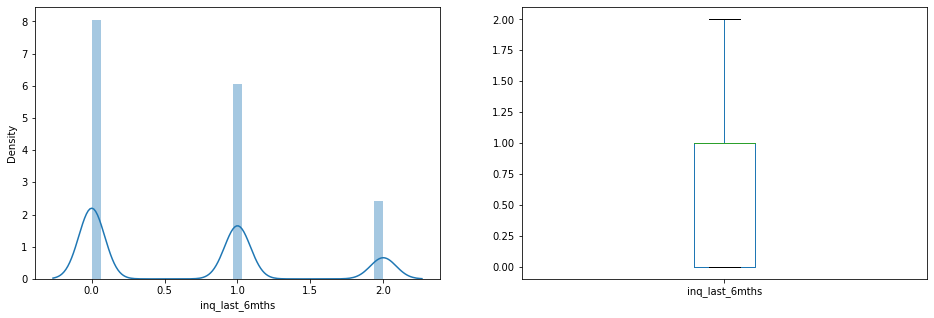

In [ ]:
# Visually Identifying the outlier for inq_last_6mths
plt.figure(1)
plt.subplot(121)
sns.distplot(loan_df_copy4['inq_last_6mths'])

plt.subplot(122)
loan_df_copy4['inq_last_6mths'].plot.box(figsize=(16,5))

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


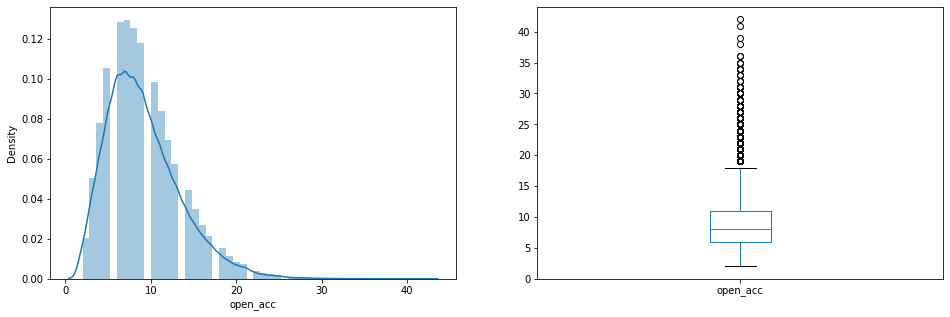

In [ ]:
# Visually Identifying the outlier for open_acc
plt.figure(1)
plt.subplot(121)
sns.distplot(loan_df_copy4['open_acc'])

plt.subplot(122)
loan_df_copy4['open_acc'].plot.box(figsize=(16,5))

plt.show()

In [ ]:
lower_bound, upper_bound = outlier_treatment(loan_df_copy4.open_acc)
loan_df_copy4[(loan_df_copy4.open_acc < lower_bound) | (loan_df_copy4.open_acc > upper_bound)]

loan_amnt  installment  grade  emp_length  annual_inc  loan_status  \
17        3600.0       109.57      1          10    110000.0            1   
250       4000.0       146.69      5          10     80000.0            1   
359       9000.0       310.45      3           4     45000.0            1   
426       4500.0       158.12      3           5     65000.0            1   
471      10000.0       307.04      1           4     75000.0            1   
...          ...          ...    ...         ...         ...          ...   
39648    15450.0       505.16      3           7    120000.0            0   
39657     3000.0        97.20      3           0     38000.0            1   
39702    10250.0       352.22      5           4     72000.0            1   
39748     3500.0       109.79      1           5     98000.0            1   
39767     5000.0       159.03      2           1     73000.0            1   

         dti  delinq_2yrs  inq_last_6mths  open_acc  pub_rec  revol_bal  \
17     10.52          0.0             0.0      20.0      0.0    22836.0   
250    20.59          1.0             2.0      30.0      0.0     6654.0   
359    17.01          1.0             1.0      21.0      1.0    10464.0   
426    14.66          0.0             1.0      20.0      0.0    18611.0   
471    24.85          0.0             2.0      19.0      0.0     3548.0   
...      ...          ...             ...       ...      ...        ...   
39648  16.97          0.0             1.0      27.0      0.0    57196.0   
39657  19.93          0.0             0.0      23.0      0.0      772.0   
39702  17.83          0.0             1.0      28.0      0.0     3815.0   
39748   8.52          1.0             0.0      19.0      0.0     6432.0   
39767   9.96          0.0             0.0      21.0      0.0    23489.0   

       revol_util  total_acc  pub_rec_bankruptcies  average_fico  \
17           16.0       42.0                   0.0         762.0   
250          22.6       56.0                   0.0         682.0   
359          50.0       51.0                   1.0         677.0   
426          76.6       34.0                   0.0         662.0   
471           5.9       40.0                   0.0         762.0   
...           ...        ...                   ...           ...   
39648        44.5       39.0                   0.0         697.0   
39657        96.5       29.0                   0.0         687.0   
39702         6.5       32.0                   0.0         687.0   
39748         6.0       37.0                   0.0         752.0   
39767        37.6       28.0                   0.0         722.0   

       home_ownership_MORTGAGE  home_ownership_NONE  home_ownership_OTHER  \
17                           1                    0                     0   
250                          1                    0                     0   
359                          0                    0                     0   
426                          1                    0                     0   
471                          0                    0                     0   
...                        ...                  ...                   ...   
39648                        0                    0                     0   
39657                        0                    0                     0   
39702                        0                    0                     0   
39748                        0                    0                     0   
39767                        0                    0                     0   

       home_ownership_OWN  home_ownership_RENT  \
17                      0                    0   
250                     0                    0   
359                     0                    1   
426                     0                    0   
471                     0                    1   
...                   ...                  ...   
39648                   0                    1   
39657                   0              

In [ ]:
loan_df_copy4.drop(loan_df_copy4[(loan_df_copy4.open_acc > upper_bound) | (loan_df_copy4.open_acc < lower_bound)].index, inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


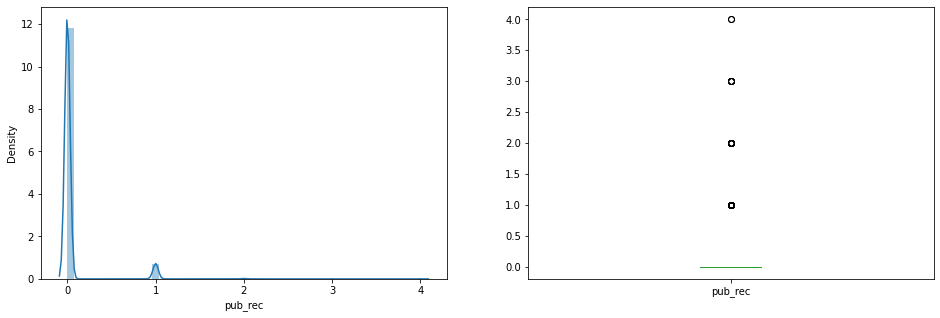

In [ ]:
# Visually Identifying the outlier for pub_rec
plt.figure(1)
plt.subplot(121)
sns.distplot(loan_df_copy4['pub_rec'])

plt.subplot(122)
loan_df_copy4['pub_rec'].plot.box(figsize=(16,5))

plt.show()

In [ ]:
lower_bound, upper_bound = outlier_treatment(loan_df_copy4.pub_rec)
loan_df_copy4[(loan_df_copy4.pub_rec < lower_bound) | (loan_df_copy4.pub_rec > upper_bound)]

loan_amnt  installment  grade  emp_length  annual_inc  loan_status  \
66       12500.0       223.11      4           5     30000.0            0   
70       20975.0       341.63      4           5     44000.0            1   
77        7250.0       197.51      6           0     75000.0            1   
94        7000.0       231.54      2           4     39120.0            1   
161      15000.0       536.81      4           2     44400.0            1   
...          ...          ...    ...         ...         ...          ...   
39670    12000.0       163.49      3           1     39000.0            0   
39692     9000.0       301.04      4           8     39000.0            0   
39735    15450.0       507.46      3           2     40000.0            0   
39749     3000.0        99.44      4           2     36153.0            1   
39778     5000.0       164.23      3           0     80000.0            1   

         dti  delinq_2yrs  inq_last_6mths  open_acc  pub_rec  revol_bal  \
66     13.16          0.0             0.0       7.0      1.0     9844.0   
70     18.79          0.0             0.0      13.0      1.0    20657.0   
77     24.82          0.0             2.0       9.0      1.0    21706.0   
94     21.01          0.0             0.0       8.0      1.0     9414.0   
161     3.59          1.0             0.0       6.0      1.0     4582.0   
...      ...          ...             ...       ...      ...        ...   
39670  11.78          0.0             0.0       6.0      1.0     5406.0   
39692   5.08          0.0             1.0       9.0      1.0    26233.0   
39735  13.50          0.0             1.0      13.0      1.0     6513.0   
39749   7.47          0.0             2.0       3.0      1.0     1064.0   
39778   1.21          0.0             1.0      15.0      1.0    27185.0   

       revol_util  total_acc  pub_rec_bankruptcies  average_fico  \
66           70.8       28.0                   1.0         692.0   
70           79.4       21.0                   1.0         687.0   
77           91.2       19.0                   1.0         682.0   
94           52.4       26.0                   0.0         677.0   
161          91.6       16.0                   1.0         672.0   
...           ...        ...                   ...           ...   
39670        33.4       14.0                   0.0         707.0   
39692        62.9       37.0                   1.0         667.0   
39735        34.3       29.0                   1.0         712.0   
39749        70.9        6.0                   1.0         667.0   
39778        16.1       29.0                   0.0         672.0   

       home_ownership_MORTGAGE  home_ownership_NONE  home_ownership_OTHER  \
66                           0                    0                     0   
70                           1                    0                     0   
77                           0                    0                     0   
94                           0                    0                     0   
161                          1                    0                     0   
...                        ...                  ...                   ...   
39670                        1                    0                     0   
39692                        1                    0                     0   
39735                        1                    0                     0   
39749                        1                    0                     0   
39778                        0                    0                     0   

       home_ownership_OWN  home_ownership_RENT  \
66                      0                    1   
70                      0                    0   
77                      0                    1   
94                      1                    0   
161                     0                    0   
...                   ...                  ...   
39670                   0                    0   
39692                   0              

In [ ]:
median_pr = loan_df_copy4.pub_rec.median()
loan_df_copy4.loc[(loan_df_copy4.pub_rec < lower_bound) | (loan_df_copy4.pub_rec > upper_bound), 'pub_rec'] = np.nan
loan_df_copy4['pub_rec'].fillna(median_pr, inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


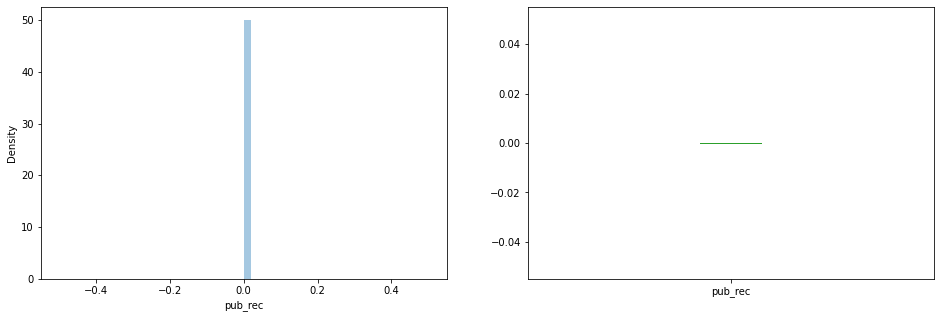

In [ ]:
# Visually Identifying the outlier for pub_rec
plt.figure(1)
plt.subplot(121)
sns.distplot(loan_df_copy4['pub_rec'])

plt.subplot(122)
loan_df_copy4['pub_rec'].plot.box(figsize=(16,5))

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


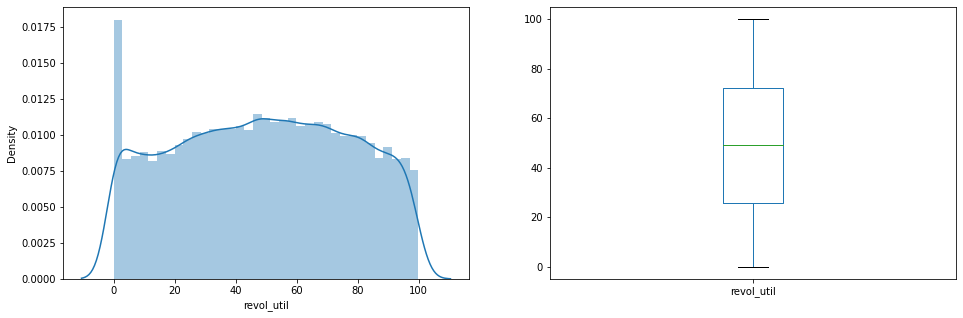

In [ ]:
# Visually Identifying the outlier for revol_util
plt.figure(1)
plt.subplot(121)
sns.distplot(loan_df_copy4['revol_util'])

plt.subplot(122)
loan_df_copy4['revol_util'].plot.box(figsize=(16,5))

plt.show()

In [ ]:
lower_bound, upper_bound = outlier_treatment(loan_df_copy4.revol_util)
loan_df_copy4[(loan_df_copy4.revol_util < lower_bound) | (loan_df_copy4.revol_util > upper_bound)]

Empty DataFrame
Columns: [loan_amnt, installment, grade, emp_length, annual_inc, loan_status, dti, delinq_2yrs, inq_last_6mths, open_acc, pub_rec, revol_bal, revol_util, total_acc, pub_rec_bankruptcies, average_fico, home_ownership_MORTGAGE, home_ownership_NONE, home_ownership_OTHER, home_ownership_OWN, home_ownership_RENT, verification_status_Not Verified, verification_status_Source Verified, verification_status_Verified, purpose_car, purpose_credit_card, purpose_debt_consolidation, purpose_educational, purpose_home_improvement, purpose_house, purpose_major_purchase, purpose_medical, purpose_moving, purpose_other, purpose_renewable_energy, purpose_small_business, purpose_vacation, purpose_wedding, term_ 36 months, term_ 60 months, num_yr_earl_cr_line, num_yr_lt_credit_pull]
Index: []

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


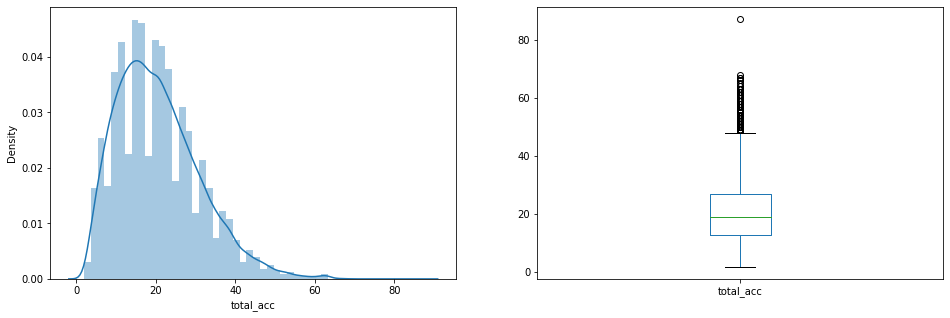

In [ ]:
# Visually Identifying the outlier for total_acc
plt.figure(1)
plt.subplot(121)
sns.distplot(loan_df_copy4['total_acc'])

plt.subplot(122)
loan_df_copy4['total_acc'].plot.box(figsize=(16,5))

plt.show()

In [ ]:
lower_bound, upper_bound = outlier_treatment(loan_df_copy4.total_acc)
loan_df_copy4[(loan_df_copy4.total_acc < lower_bound) | (loan_df_copy4.total_acc > upper_bound)]

loan_amnt  installment  grade  emp_length  annual_inc  loan_status  \
90       12000.0       390.88      2           0    62000.00            1   
219      12000.0       400.99      2           2    83000.00            1   
716      10000.0       343.09      3          10   115000.00            1   
729       5000.0       171.55      3           4   111740.00            1   
742      17500.0       393.01      2           4    70000.00            1   
958      18000.0       430.78      3           2    50000.00            1   
1186     20000.0       312.74      4           2    62500.00            1   
1372      3600.0       120.30      2           2    37008.00            1   
1496     11000.0       334.80      1          10    65500.00            1   
1647      8000.0       243.49      1          10    86400.00            1   
1737     12000.0       368.45      1          10    90000.00            1   
1738     11100.0       269.70      3          10    50000.00            1   
1801     12000.0       373.33      1          10    90000.00            1   
2332     17625.0       559.66      1           1    45000.00            1   
2879     16000.0       529.22      2          10    88000.00            1   
2889     10000.0       355.39      4          10    52000.00            1   
2929     14400.0       494.05      3          10    94104.00            1   
3009     15000.0       469.36      1          10    85000.00            1   
3079     12000.0       269.49      2          10    60000.00            1   
3210      3000.0        93.88      1           3    67000.00            1   
3301      2700.0        91.62      3          10    98450.00            1   
3388     20000.0       503.32      4          10    66000.00            0   
3418     20000.0       544.23      6          10   101657.00            0   
3446     10000.0       251.66      4           4    70000.00            1   
3469      6000.0       193.35      2          10    36000.00            1   
3472      5400.0       164.36      1           5    42000.00            1   
3586     18250.0       419.84      3          10    45000.00            0   
3622     11500.0       384.28      2           4    50000.00            1   
3638      5000.0       119.66      3           4    96000.00            1   
3652     14000.0       429.86      1          10    55000.00            1   
3789      6000.0       186.67      1          10    31000.00            1   
3884      5000.0       167.73      2          10    23400.00            1   
3997     17900.0       560.10      1           0    65000.00            1   
4179      9000.0       281.62      1           8    75500.00            1   
4192     20000.0       670.90      2           9   107496.00            1   
4252     15000.0       483.38      2          10    95000.00            1   
4440     12000.0       280.91      3          10    80000.00            1   
4493      1000.0        32.58      2           0    20000.00            1   
4520     18000.0       467.23      5          10    65000.00            0   
4657     14975.0       455.78      1          10   125000.00            1   
4747     28100.0       729.40      5          10    98400.00            1   
4769      9600.0       207.06      2           8   102400.00            1   
4967      8000.0       271.45      3           2    61700.00            0   
5015      3000.0       100.25      2           8    65000.00            1   
5060      7200.0       252.99      3           0    64000.00            1   
5103      7200.0       219.14      1          10   114000.00            1   
5154      7000.0       214.93      1           2    54000.00            0   
5194     12000.0       299.98      4          10    51300.00            0   
5271     10000.0       307.04      1           0    78000.00            1   
5279      8000.0       248.89      1          10    60000.00            1   
5347     16000.0       500.65      1           7    60000.00            1   
538

In [ ]:
loan_df_copy4.drop(loan_df_copy4[(loan_df_copy4.total_acc > upper_bound) | (loan_df_copy4.total_acc < lower_bound)].index, inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


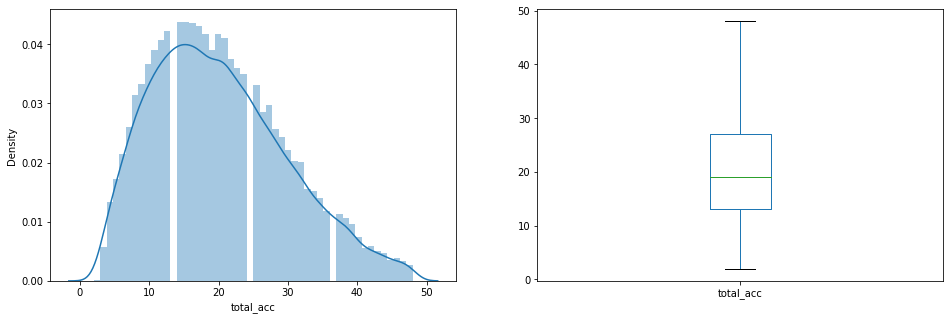

In [ ]:
# Visually Identifying the outlier for total_acc
plt.figure(1)
plt.subplot(121)
sns.distplot(loan_df_copy4['total_acc'])

plt.subplot(122)
loan_df_copy4['total_acc'].plot.box(figsize=(16,5))

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


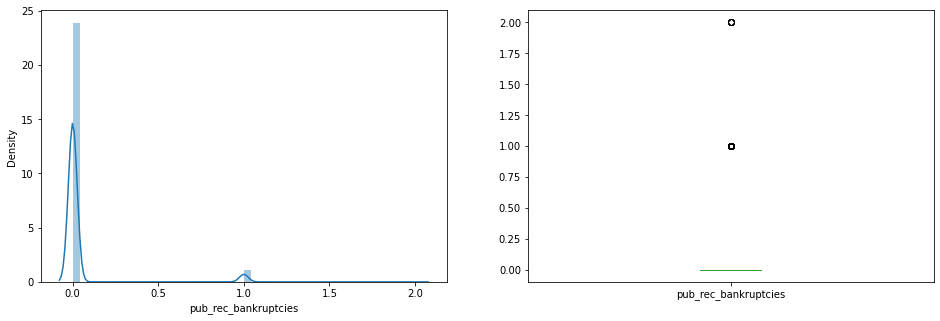

In [ ]:
# Visually Identifying the outlier for pub_rec_bankruptcies
plt.figure(1)
plt.subplot(121)
sns.distplot(loan_df_copy4['pub_rec_bankruptcies'])

plt.subplot(122)
loan_df_copy4['pub_rec_bankruptcies'].plot.box(figsize=(16,5))

plt.show()

In [ ]:
lower_bound, upper_bound = outlier_treatment(loan_df_copy4.pub_rec_bankruptcies)
loan_df_copy4[(loan_df_copy4.pub_rec_bankruptcies < lower_bound) | (loan_df_copy4.pub_rec_bankruptcies > upper_bound)]

loan_amnt  installment  grade  emp_length  annual_inc  loan_status  \
66       12500.0       223.11      4           5     30000.0            0   
70       20975.0       341.63      4           5     44000.0            1   
77        7250.0       197.51      6           0     75000.0            1   
161      15000.0       536.81      4           2     44400.0            1   
271       3200.0       103.12      2           9     61200.0            1   
...          ...          ...    ...         ...         ...          ...   
39631     4800.0       155.52      3           1     35000.0            1   
39642     7000.0       227.82      3           3     63500.0            1   
39692     9000.0       301.04      4           8     39000.0            0   
39735    15450.0       507.46      3           2     40000.0            0   
39749     3000.0        99.44      4           2     36153.0            1   

         dti  delinq_2yrs  inq_last_6mths  open_acc  pub_rec  revol_bal  \
66     13.16          0.0             0.0       7.0      0.0     9844.0   
70     18.79          0.0             0.0      13.0      0.0    20657.0   
77     24.82          0.0             2.0       9.0      0.0    21706.0   
161     3.59          1.0             0.0       6.0      0.0     4582.0   
271     2.16          0.0             0.0       5.0      0.0     2795.0   
...      ...          ...             ...       ...      ...        ...   
39631   7.51          0.0             0.0      11.0      0.0     5836.0   
39642   8.50          0.0             1.0       9.0      0.0    14930.0   
39692   5.08          0.0             1.0       9.0      0.0    26233.0   
39735  13.50          0.0             1.0      13.0      0.0     6513.0   
39749   7.47          0.0             2.0       3.0      0.0     1064.0   

       revol_util  total_acc  pub_rec_bankruptcies  average_fico  \
66           70.8       28.0                   1.0         692.0   
70           79.4       21.0                   1.0         687.0   
77           91.2       19.0                   1.0         682.0   
161          91.6       16.0                   1.0         672.0   
271          33.3       17.0                   1.0         702.0   
...           ...        ...                   ...           ...   
39631        68.7       12.0                   1.0         687.0   
39642        79.0       21.0                   1.0         682.0   
39692        62.9       37.0                   1.0         667.0   
39735        34.3       29.0                   1.0         712.0   
39749        70.9        6.0                   1.0         667.0   

       home_ownership_MORTGAGE  home_ownership_NONE  home_ownership_OTHER  \
66                           0                    0                     0   
70                           1                    0                     0   
77                           0                    0                     0   
161                          1                    0                     0   
271                          0                    0                     0   
...                        ...                  ...                   ...   
39631                        0                    0                     0   
39642                        1                    0                     0   
39692                        1                    0                     0   
39735                        1                    0                     0   
39749                        1                    0                     0   

       home_ownership_OWN  home_ownership_RENT  \
66                      0                    1   
70                      0                    0   
77                      0                    1   
161                     0                    0   
271                     0                    1   
...                   ...                  ...   
39631                   0                    1   
39642                   0              

In [ ]:
median_prb = loan_df_copy4.pub_rec_bankruptcies.median()
loan_df_copy4.loc[(loan_df_copy4.pub_rec_bankruptcies < lower_bound) | (loan_df_copy4.pub_rec_bankruptcies > upper_bound), 'pub_rec_bankruptcies'] = np.nan
loan_df_copy4['pub_rec_bankruptcies'].fillna(median_prb, inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


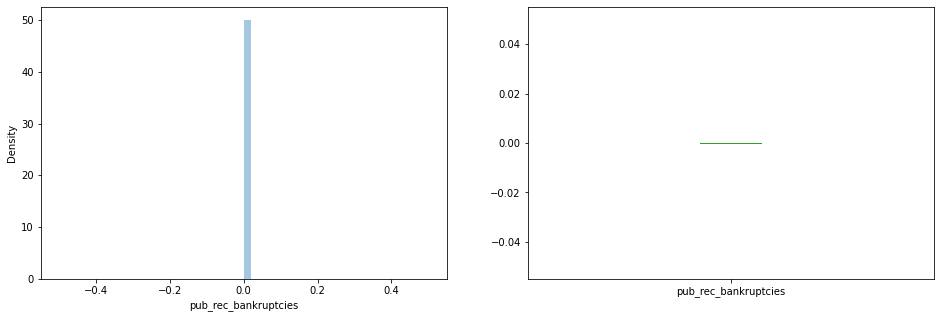

In [ ]:
# Visually Identifying the outlier for pub_rec_bankruptcies
plt.figure(1)
plt.subplot(121)
sns.distplot(loan_df_copy4['pub_rec_bankruptcies'])

plt.subplot(122)
loan_df_copy4['pub_rec_bankruptcies'].plot.box(figsize=(16,5))

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


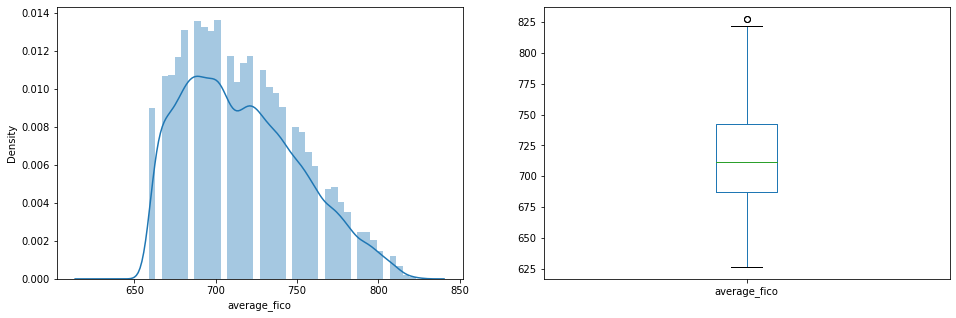

In [ ]:
# Visually Identifying the outlier for average_fico
plt.figure(1)
plt.subplot(121)
sns.distplot(loan_df_copy4['average_fico'])

plt.subplot(122)
loan_df_copy4['average_fico'].plot.box(figsize=(16,5))

plt.show()

In [ ]:
lower_bound, upper_bound = outlier_treatment(loan_df_copy4.average_fico)
loan_df_copy4[(loan_df_copy4.average_fico < lower_bound) | (loan_df_copy4.average_fico > upper_bound)]

loan_amnt  installment  grade  emp_length  annual_inc  loan_status  \
5978    20000.0       441.97      2          10     40000.0            1   
7017     6425.0       195.55      1           5    113000.0            1   

        dti  delinq_2yrs  inq_last_6mths  open_acc  pub_rec  revol_bal  \
5978  18.33          0.0             0.0       7.0      0.0     2376.0   
7017   4.09          0.0             0.0       6.0      0.0     1512.0   

      revol_util  total_acc  pub_rec_bankruptcies  average_fico  \
5978         3.6       23.0                   0.0         827.0   
7017         6.7       28.0                   0.0         827.0   

      home_ownership_MORTGAGE  home_ownership_NONE  home_ownership_OTHER  \
5978                        0                    0                     0   
7017                        1                    0                     0   

      home_ownership_OWN  home_ownership_RENT  \
5978                   1                    0   
7017                   0                    0   

      verification_status_Not Verified  verification_status_Source Verified  \
5978                                 0                                    1   
7017                                 1                                    0   

      verification_status_Verified  purpose_car  purpose_credit_card  \
5978                             0            0                    0   
7017                             0            0                    0   

      purpose_debt_consolidation  purpose_educational  \
5978                           1                    0   
7017                           0                    0   

      purpose_home_improvement  purpose_house  purpose_major_purchase  \
5978                         0              0                       0   
7017                         0              0                       1   

      purpose_medical  purpose_moving  purpose_other  \
5978                0               0              0   
7017                0               0              0   

      purpose_renewable_energy  purpose_small_business  purpose_vacation  \
5978                         0                       0                 0   
7017                         0                       0                 0   

      purpose_wedding  term_ 36 months  term_ 60 months  num_yr_earl_cr_line  \
5978                0                0                1                   45   
7017                0                1                0                   51   

      num_yr_lt_credit_pull  
5978                     10  
7017                      7

In [ ]:
loan_df_copy4.drop(loan_df_copy4[(loan_df_copy4.average_fico > upper_bound) | (loan_df_copy4.average_fico < lower_bound)].index, inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


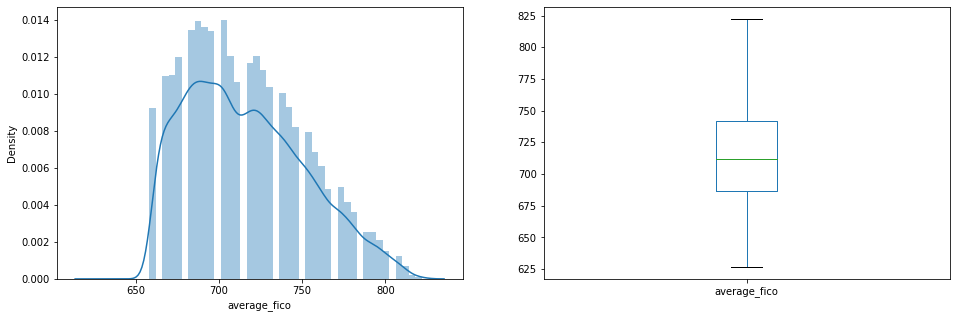

In [ ]:
# Visually Identifying the outlier for average_fico
plt.figure(1)
plt.subplot(121)
sns.distplot(loan_df_copy4['average_fico'])

plt.subplot(122)
loan_df_copy4['average_fico'].plot.box(figsize=(16,5))

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


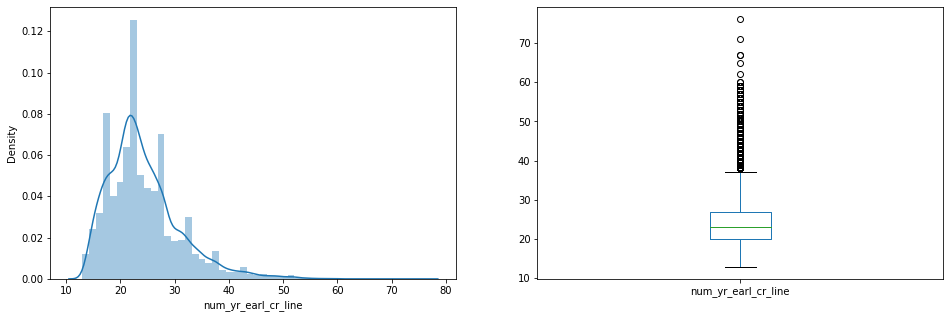

In [ ]:
# Visually Identifying the outlier for num_yr_earl_cr_line
plt.figure(1)
plt.subplot(121)
sns.distplot(loan_df_copy4['num_yr_earl_cr_line'])

plt.subplot(122)
loan_df_copy4['num_yr_earl_cr_line'].plot.box(figsize=(16,5))

plt.show()

In [ ]:
lower_bound, upper_bound = outlier_treatment(loan_df_copy4.num_yr_earl_cr_line)
loan_df_copy4[(loan_df_copy4.num_yr_earl_cr_line < lower_bound) | (loan_df_copy4.num_yr_earl_cr_line > upper_bound)]

loan_amnt  installment  grade  emp_length  annual_inc  loan_status  \
21       21000.0       701.73      2          10    105000.0            0   
87        4500.0        97.06      2           0     42000.0            1   
161      15000.0       536.81      4           2     44400.0            1   
169      13500.0       435.04      2           2     36000.0            1   
217      21000.0       294.98      4          10    109000.0            1   
...          ...          ...    ...         ...         ...          ...   
39691     5275.0       163.92      1           9     85000.0            1   
39699     9500.0       297.99      1           2     90000.0            1   
39741     5000.0       155.38      1           0     70000.0            1   
39753    12000.0       397.75      4           1     65000.0            1   
39759    12250.0       398.69      3           3     60000.0            1   

         dti  delinq_2yrs  inq_last_6mths  open_acc  pub_rec  revol_bal  \
21     13.22          0.0             0.0       7.0      0.0    32135.0   
87      5.40          0.0             0.0       4.0      0.0     8220.0   
161     3.59          1.0             0.0       6.0      0.0     4582.0   
169    22.93          0.0             1.0      13.0      0.0    25011.0   
217     7.75          0.0             0.0       9.0      0.0    25435.0   
...      ...          ...             ...       ...      ...        ...   
39691   2.64          0.0             0.0       7.0      0.0     5760.0   
39699   2.44          0.0             0.0      11.0      0.0    40384.0   
39741   4.56          0.0             0.0      13.0      0.0      813.0   
39753   7.14          2.0             0.0       6.0      0.0    11868.0   
39759  17.12          1.0             2.0      10.0      0.0    17214.0   

       revol_util  total_acc  pub_rec_bankruptcies  average_fico  \
21           90.3       38.0                   0.0         707.0   
87           78.3        9.0                   0.0         752.0   
161          91.6       16.0                   0.0         672.0   
169          67.2       15.0                   0.0         727.0   
217          50.3       16.0                   0.0         697.0   
...           ...        ...                   ...           ...   
39691        16.0       10.0                   0.0         782.0   
39699         9.6       25.0                   0.0         792.0   
39741         1.0       36.0                   0.0         812.0   
39753        71.9       23.0                   0.0         682.0   
39759         8.1       24.0                   0.0         747.0   

       home_ownership_MORTGAGE  home_ownership_NONE  home_ownership_OTHER  \
21                           0                    0                     0   
87                           1                    0                     0   
161                          1                    0                     0   
169                          1                    0                     0   
217                          1                    0                     0   
...                        ...                  ...                   ...   
39691                        1                    0                     0   
39699                        0                    0                     0   
39741                        1                    0                     0   
39753                        0                    0                     0   
39759                        0                    0                     0   

       home_ownership_OWN  home_ownership_RENT  \
21                      0                    1   
87                      0                    0   
161                     0                    0   
169                     0                    0   
217                     0                    0   
...                   ...                  ...   
39691                   0                    0   
39699                   1              

In [ ]:
median_nyecl = loan_df_copy4.num_yr_earl_cr_line.median()
loan_df_copy4.loc[(loan_df_copy4.num_yr_earl_cr_line < lower_bound) | (loan_df_copy4.num_yr_earl_cr_line > upper_bound), 'num_yr_earl_cr_line'] = np.nan
loan_df_copy4['num_yr_earl_cr_line'].fillna(median_nyecl, inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


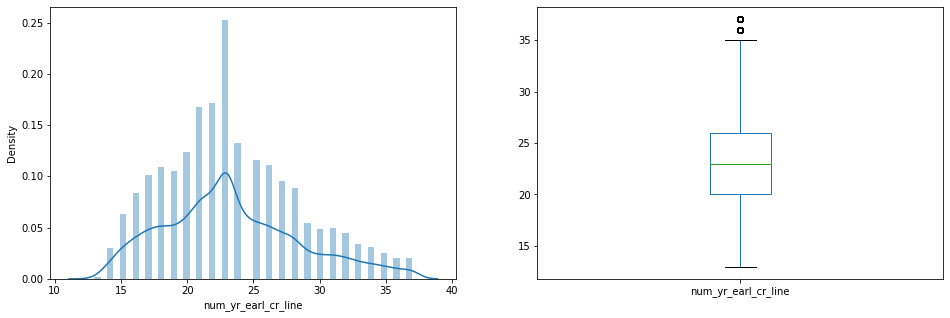

In [ ]:
# Visually Identifying the outlier for num_yr_earl_cr_line
plt.figure(1)
plt.subplot(121)
sns.distplot(loan_df_copy4['num_yr_earl_cr_line'])

plt.subplot(122)
loan_df_copy4['num_yr_earl_cr_line'].plot.box(figsize=(16,5))

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


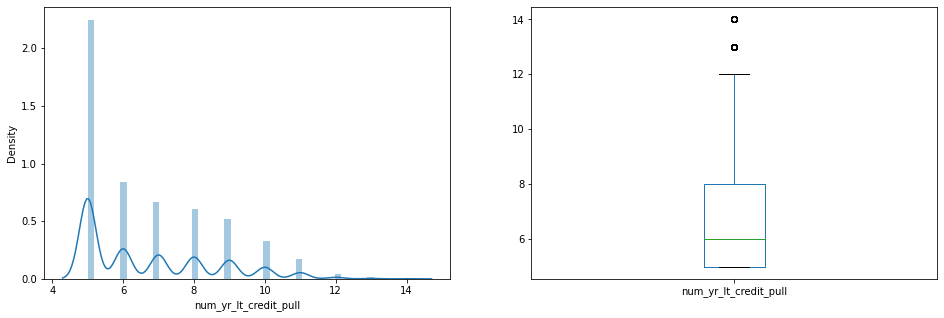

In [ ]:
# Visually Identifying the outlier for num_yr_lt_credit_pull
plt.figure(1)
plt.subplot(121)
sns.distplot(loan_df_copy4['num_yr_lt_credit_pull'])

plt.subplot(122)
loan_df_copy4['num_yr_lt_credit_pull'].plot.box(figsize=(16,5))

plt.show()

In [ ]:
lower_bound, upper_bound = outlier_treatment(loan_df_copy4.num_yr_lt_credit_pull)
loan_df_copy4[(loan_df_copy4.num_yr_lt_credit_pull < lower_bound) | (loan_df_copy4.num_yr_lt_credit_pull > upper_bound)]

loan_amnt  installment  grade  emp_length  annual_inc  loan_status  \
36930    20000.0       666.30      2          10    116004.0            1   
37120     6000.0       191.69      1           0     67000.0            1   
37416     3400.0       114.82      3           4     31776.0            1   
37421    12000.0       408.91      3          10     55008.0            1   
37443     5000.0       169.62      3           0     54996.0            1   
37543     7500.0       252.14      3           7     55000.0            1   
37579    20000.0       666.30      2           4     70834.0            1   
37741    14000.0       472.79      3           0     52000.0            1   
37817     5000.0       168.09      3           5     33000.0            1   
37840    15000.0       495.21      2           7     69000.0            1   
37929    15000.0       495.21      2           5     96000.0            1   
38104     4000.0       127.79      1           5     55000.0            1   
38152     6500.0       207.85      1           8     50000.0            1   
38182    14800.0       483.35      2           1     50000.0            1   
38208    10000.0       347.88      5           0     60000.0            1   
38303     4800.0       150.42      1          10     75000.0            1   
38343    11000.0       344.71      1          10     44000.0            1   
38354     5100.0       165.79      2           5     61200.0            1   
38356    10000.0       331.10      3           2     49304.0            1   
38359     8000.0       261.27      2           0     41000.0            1   
38361    12000.0       400.93      3           1     90000.0            1   
38386     6000.0       191.87      1           9     45000.0            1   
38461     7500.0       242.04      2          10     79000.0            1   
38468     7000.0       200.52      3           1     34000.0            1   
38475     7500.0       156.14      3           0     87000.0            1   
38544     7500.0       238.13      4           8     80500.0            1   
38553     7500.0       212.79      4           2     71688.0            1   
38556     3000.0        38.56      2           1     18008.0            1   
38639     4800.0        96.03      2           2     45000.0            1   
38650     7500.0       236.14      1          10     30004.0            1   
38674     6300.0       210.13      3           0     44004.0            1   
38698     7500.0       246.75      3           8     60000.0            1   
38704     4200.0       132.84      1           6     60000.0            1   
38706     7500.0       243.38      2           0     53000.0            1   
38764     1500.0        36.48      1          10     35004.0            1   
38808     7500.0       175.49      1           2     44000.0            1   
38831     9600.0        70.55      3           3     65000.0            1   
38867     5000.0       170.58      4           6     44500.0            1   
38872    10000.0       338.10      4          10    102000.0            0   
38893    20000.0       161.53      2           6     44500.0            1   
38901     5000.0       165.27      3           3     69600.0            1   
38933    25000.0       175.01      4           5     83000.0            1   
38956    15000.0       482.32      2           2    114000.0            1   
38962    20000.0       224.14      2           4     39000.0            1   
38970     4000.0       128.04      2           4     97200.0            1   
38971     8000.0       250.70      1           3     49244.0            1   
38994    20000.0       640.20      2           0     93492.0            1   
39015     8000.0       251.88      1          10     41050.0            0   
39016     5200.0       167.21      2           1     34000.0            1   
39038     6000.0       187.14      1          10     43200.0            1   
39061     8000.0       250.70      1           0     32268.0            1   
390

In [ ]:
loan_df_copy4.drop(loan_df_copy4[(loan_df_copy4.num_yr_lt_credit_pull > upper_bound) | (loan_df_copy4.num_yr_lt_credit_pull < lower_bound)].index, inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


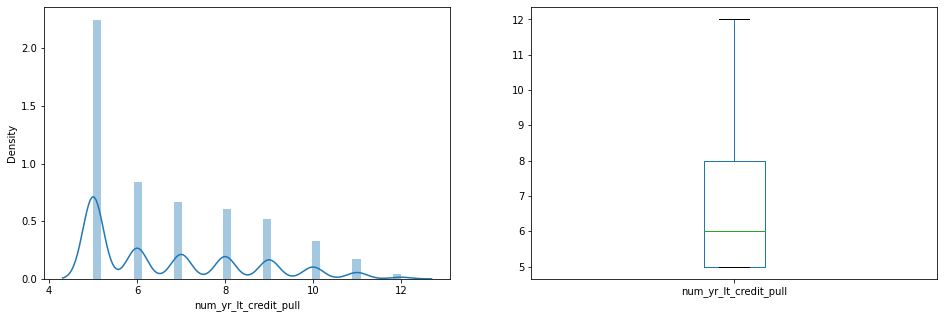

In [ ]:
# Visually Identifying the outlier for num_yr_lt_credit_pull
plt.figure(1)
plt.subplot(121)
sns.distplot(loan_df_copy4['num_yr_lt_credit_pull'])

plt.subplot(122)
loan_df_copy4['num_yr_lt_credit_pull'].plot.box(figsize=(16,5))

plt.show()

In [ ]:
# function for plotting the count plot features wrt default ratio
def plotUnivariateRatioBar(feature, data=loan_df_copy4, figsize=(10,5), rsorted=True):
    plt.figure(figsize=figsize)
    if rsorted:
        feature_dimension = sorted(data[feature].unique())
    else:
        feature_dimension = data[feature].unique()
    feature_values = []
    for fd in feature_dimension:
        feature_filter = data[data[feature]==fd]
        feature_count = len(feature_filter[feature_filter["loan_status"]==1])
        feature_values.append(feature_count*100/feature_filter["loan_status"].count())
    plt.bar(feature_dimension, feature_values, color='orange', edgecolor='white')
    plt.title("Loan Defaults wrt "+str(feature)+" feature - countplot")
    plt.xlabel(feature, fontsize=16)
    plt.ylabel("defaulter %", fontsize=16)
    plt.show()
# function to plot univariate with default status scale 0 - 1
def plotUnivariateBar(x, figsize=(10,5)):
    plt.figure(figsize=figsize)
    sns.barplot(x=x, y='loan_status', data=loan_df_copy4)
    plt.title("Loan Defaults wrt "+str(x)+" feature - countplot")
    plt.xlabel(x, fontsize=16)
    plt.ylabel("defaulter ratio", fontsize=16)
    plt.show()

In [ ]:
plot_cat_cols = ['grade', 'emp_length']

We want to check for defaulters ratio in each class of the categorical variables to see if there is a trend

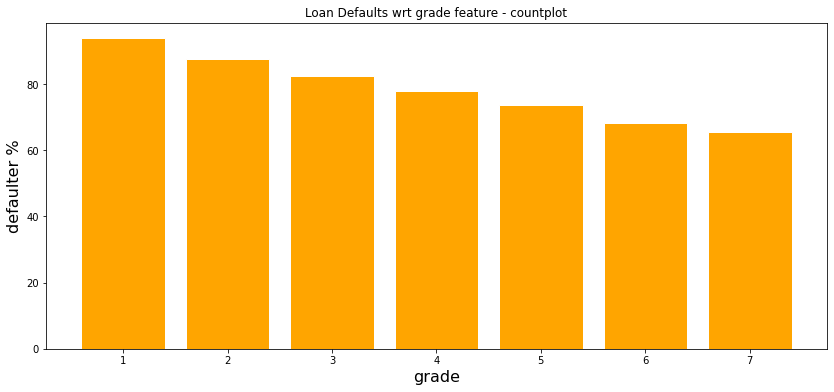

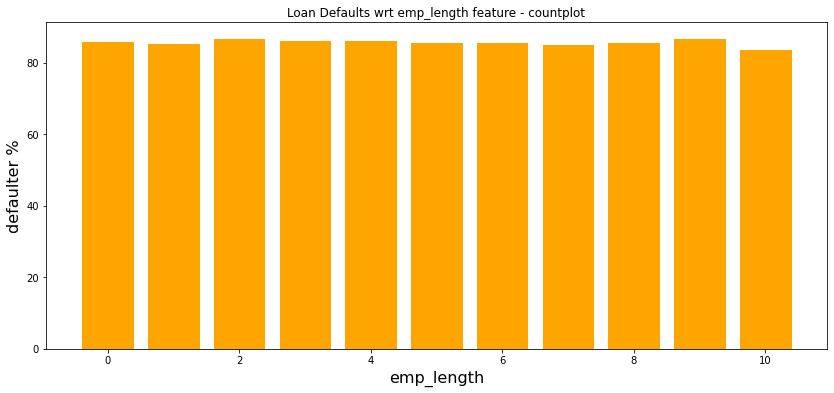

In [ ]:
for col in plot_cat_cols:
  # check for defaulters wrt total_acc in the data using countplot
  plotUnivariateRatioBar(col, figsize=(14,6))

## Log Transformation

In [ ]:
# using deepcopy to deep copy 
loan_df_copy5 = copy.deepcopy(loan_df_copy4)

In [ ]:
for col in cont_col_list:
  loan_df_copy5['log_'+col] = np.log(loan_df_copy5[col]+1)

In [ ]:
loan_df_copy5.head()

loan_amnt  installment  grade  emp_length  annual_inc  loan_status    dti  \
0     5000.0       162.87      2          10     24000.0            1  27.65   
1     2500.0        59.83      3           0     30000.0            0   1.00   
2     2400.0        84.33      3          10     12252.0            1   8.72   
3    10000.0       339.31      3          10     49200.0            1  20.00   
5     5000.0       156.46      1           3     36000.0            1  11.20   

   delinq_2yrs  inq_last_6mths  open_acc  pub_rec  revol_bal  revol_util  \
0          0.0             1.0       3.0      0.0    13648.0        83.7   
1          0.0             1.0       3.0      0.0     1687.0         9.4   
2          0.0             2.0       2.0      0.0     2956.0        98.5   
3          0.0             1.0      10.0      0.0     5598.0        21.0   
5          0.0             1.0       9.0      0.0     7963.0        28.3   

   total_acc  pub_rec_bankruptcies  average_fico  home_ownership_MORTGAGE  \
0        9.0                   0.0         737.0                        0   
1        4.0                   0.0         742.0                        0   
2       10.0                   0.0         737.0                        0   
3       37.0                   0.0         692.0                        0   
5       12.0                   0.0         732.0                        0   

   home_ownership_NONE  home_ownership_OTHER  home_ownership_OWN  \
0                    0                     0                   0   
1                    0                     0                   0   
2                    0                     0                   0   
3                    0                     0                   0   
5                    0                     0                   0   

   home_ownership_RENT  verification_status_Not Verified  \
0                    1                                 0   
1                    1                                 0   
2                    1                                 1   
3                    1                                 0   
5                    1                                 0   

   verification_status_Source Verified  verification_status_Verified  \
0                                    0                             1   
1                                    1                             0   
2                                    0                             0   
3                                    1                             0   
5                                    1                             0   

   purpose_car  purpose_credit_card  purpose_debt_consolidation  \
0            0                    1                           0   
1            1                    0                           0   
2            0                    0                           0   
3            0                    0                           0   
5            0                    0                           0   

   purpose_educational  purpose_home_improvement  purpose_house  \
0                    0                         0              0   
1                    0                         0              0   
2                    0                         0              0   
3                    0                         0              0   
5                    0                         0              0   

   purpose_major_purchase  purpose_medical  purpose_moving  purpose_other  \
0                       0                0               0              0   
1                       0                0               0              0   
2                       0                0               0              0   
3                       0                0               0              1   
5                       0                0               0              0   

   purpose_renewable_energy  purpose_small_business  purpose_vacation  \
0                         0                       0      

loan_amnt----------------


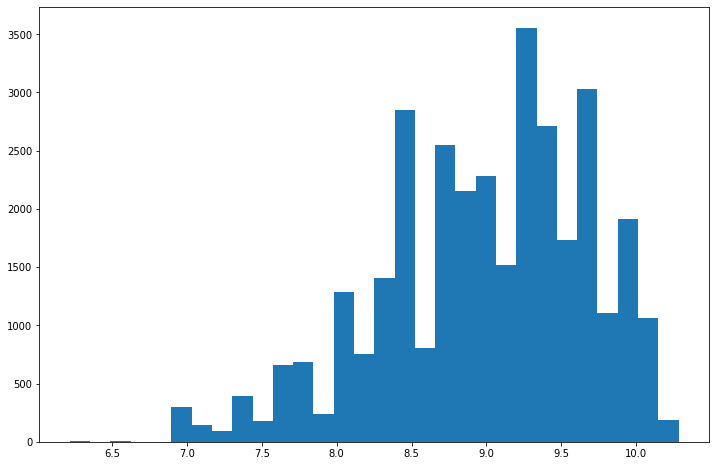

installment----------------


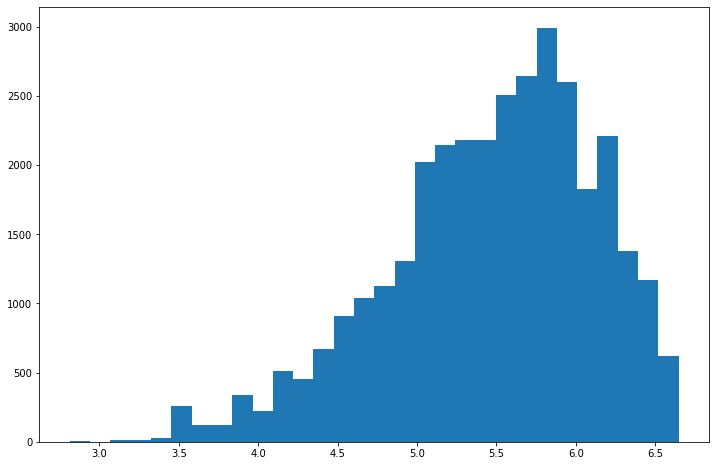

annual_inc----------------


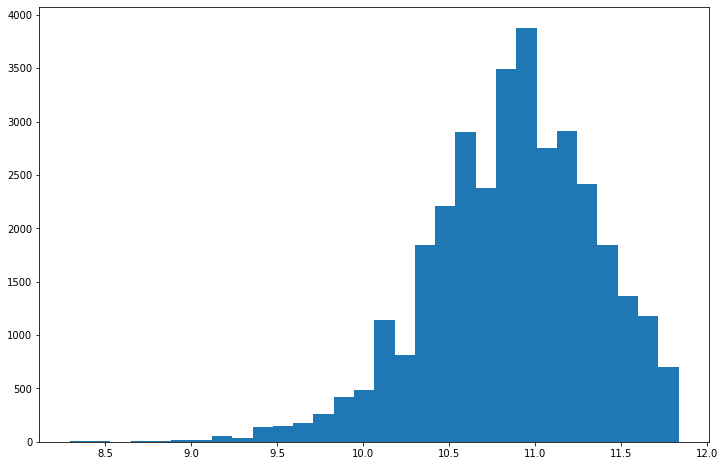

dti----------------


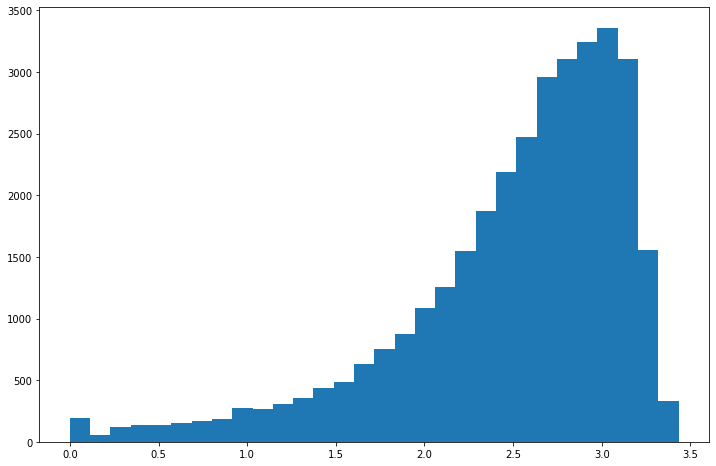

delinq_2yrs----------------


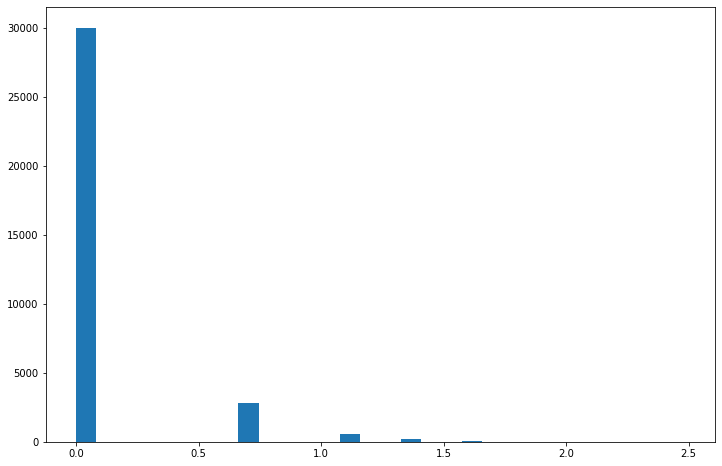

inq_last_6mths----------------


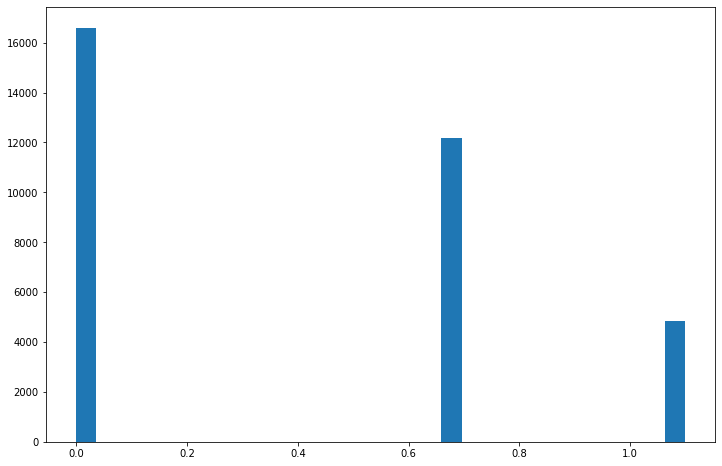

open_acc----------------


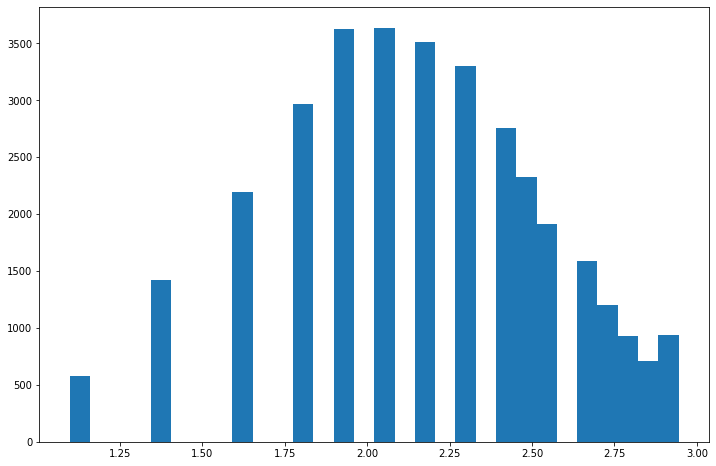

pub_rec----------------


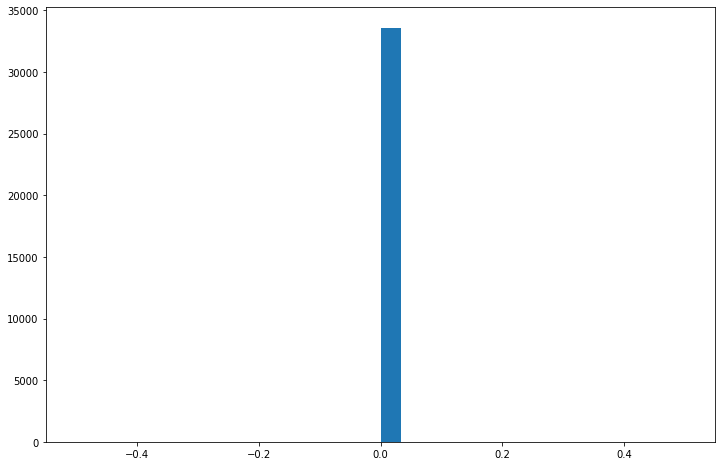

revol_bal----------------


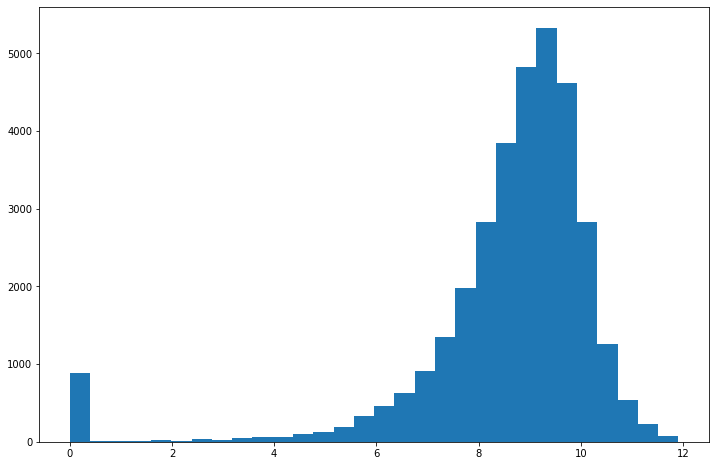

revol_util----------------


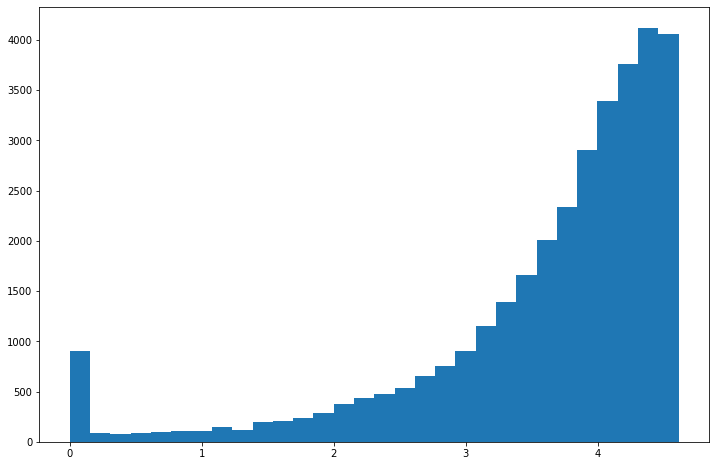

total_acc----------------


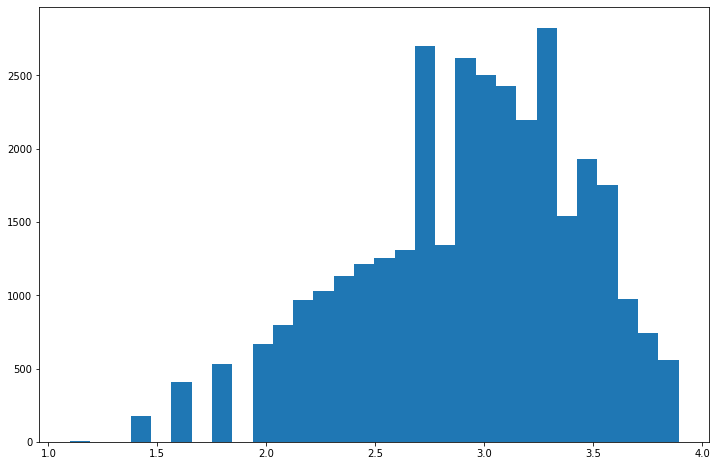

pub_rec_bankruptcies----------------


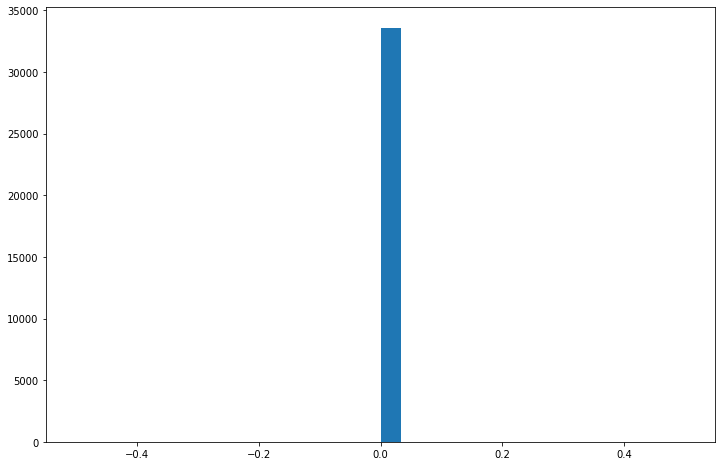

average_fico----------------


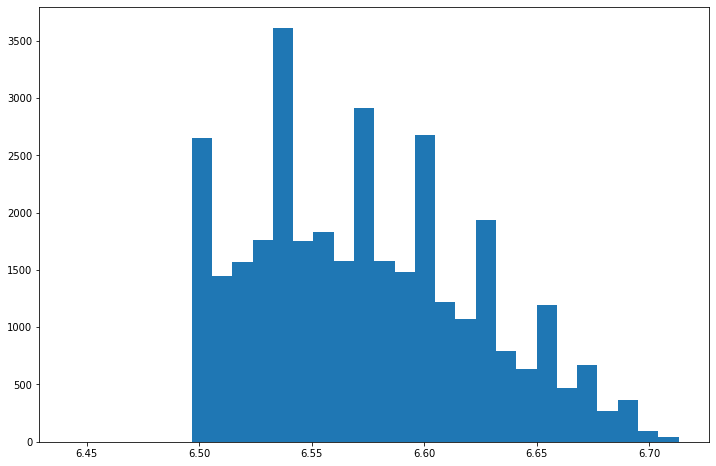

num_yr_earl_cr_line----------------


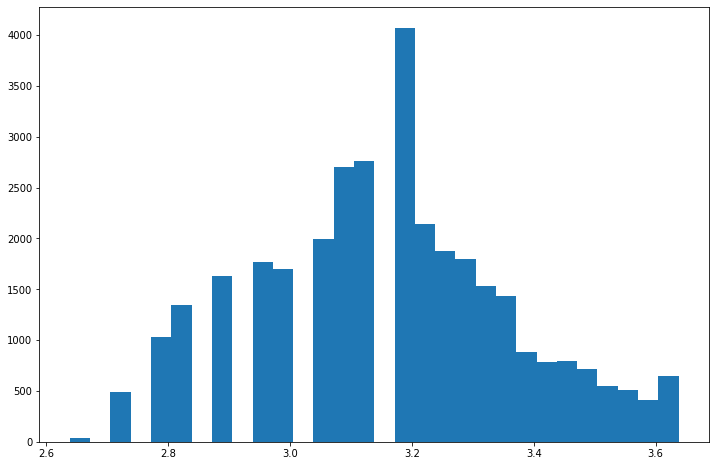

num_yr_lt_credit_pull----------------


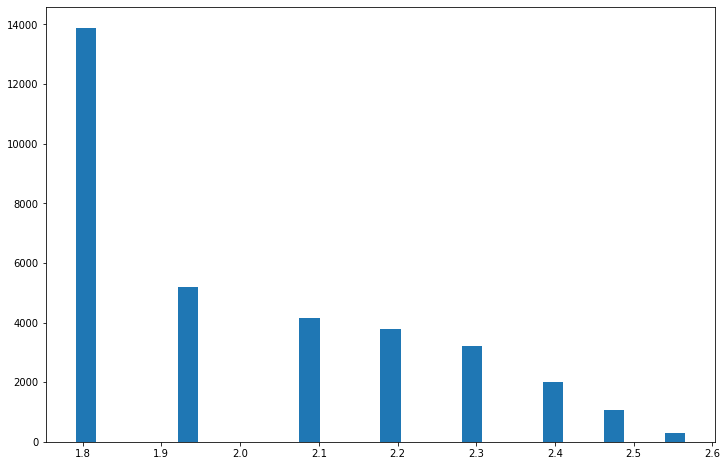

In [ ]:
# Visualization of the Distribution of Numerical Features after log transformation
for col in cont_col_list:
  print(col+"----------------")
  plt.hist(loan_df_copy5['log_'+col], bins=30)

  plt.show()

### Exponential Transformation

In [ ]:
# using deepcopy to deep copy 
loan_df_copy7 = copy.deepcopy(loan_df_copy4)

In [ ]:
# Create variables for transformed values for the numerical variables
for col in cont_col_list:
  loan_df_copy7['exp_'+col] = np.exp(loan_df_copy7[col])

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
loan_df_copy7.head()

loan_amnt  installment  grade  emp_length  annual_inc  loan_status    dti  \
0     5000.0       162.87      2          10     24000.0            1  27.65   
1     2500.0        59.83      3           0     30000.0            0   1.00   
2     2400.0        84.33      3          10     12252.0            1   8.72   
3    10000.0       339.31      3          10     49200.0            1  20.00   
5     5000.0       156.46      1           3     36000.0            1  11.20   

   delinq_2yrs  inq_last_6mths  open_acc  pub_rec  revol_bal  revol_util  \
0          0.0             1.0       3.0      0.0    13648.0        83.7   
1          0.0             1.0       3.0      0.0     1687.0         9.4   
2          0.0             2.0       2.0      0.0     2956.0        98.5   
3          0.0             1.0      10.0      0.0     5598.0        21.0   
5          0.0             1.0       9.0      0.0     7963.0        28.3   

   total_acc  pub_rec_bankruptcies  average_fico  home_ownership_MORTGAGE  \
0        9.0                   0.0         737.0                        0   
1        4.0                   0.0         742.0                        0   
2       10.0                   0.0         737.0                        0   
3       37.0                   0.0         692.0                        0   
5       12.0                   0.0         732.0                        0   

   home_ownership_NONE  home_ownership_OTHER  home_ownership_OWN  \
0                    0                     0                   0   
1                    0                     0                   0   
2                    0                     0                   0   
3                    0                     0                   0   
5                    0                     0                   0   

   home_ownership_RENT  verification_status_Not Verified  \
0                    1                                 0   
1                    1                                 0   
2                    1                                 1   
3                    1                                 0   
5                    1                                 0   

   verification_status_Source Verified  verification_status_Verified  \
0                                    0                             1   
1                                    1                             0   
2                                    0                             0   
3                                    1                             0   
5                                    1                             0   

   purpose_car  purpose_credit_card  purpose_debt_consolidation  \
0            0                    1                           0   
1            1                    0                           0   
2            0                    0                           0   
3            0                    0                           0   
5            0                    0                           0   

   purpose_educational  purpose_home_improvement  purpose_house  \
0                    0                         0              0   
1                    0                         0              0   
2                    0                         0              0   
3                    0                         0              0   
5                    0                         0              0   

   purpose_major_purchase  purpose_medical  purpose_moving  purpose_other  \
0                       0                0               0              0   
1                       0                0               0              0   
2                       0                0               0              0   
3                       0                0               0              1   
5                       0                0               0              0   

   purpose_renewable_energy  purpose_small_business  purpose_vacation  \
0                         0                       0      

dti----------------


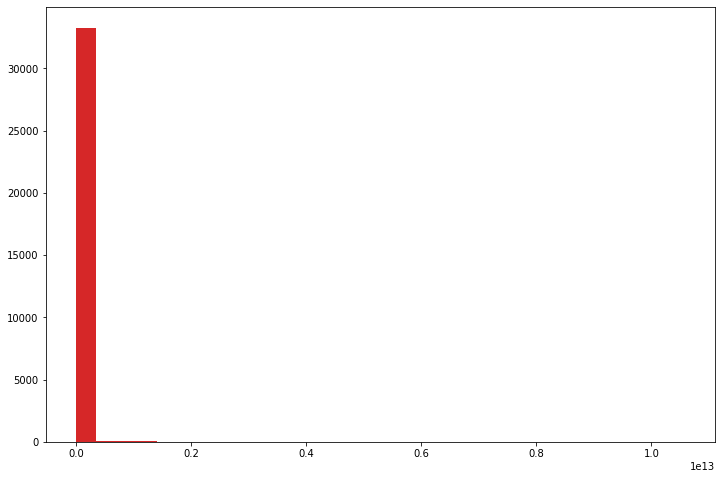

delinq_2yrs----------------


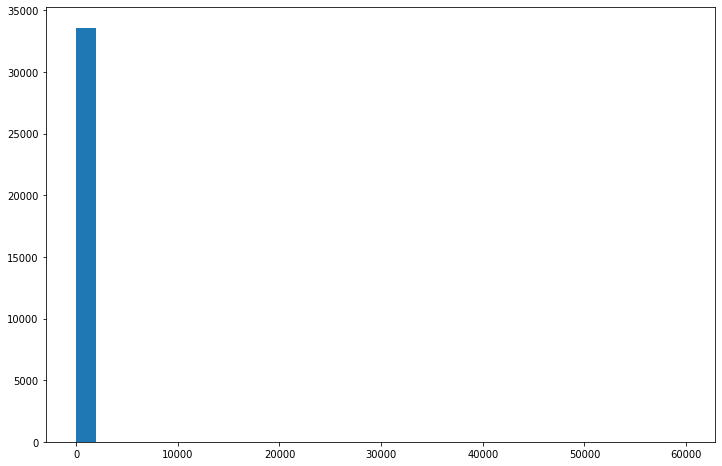

inq_last_6mths----------------


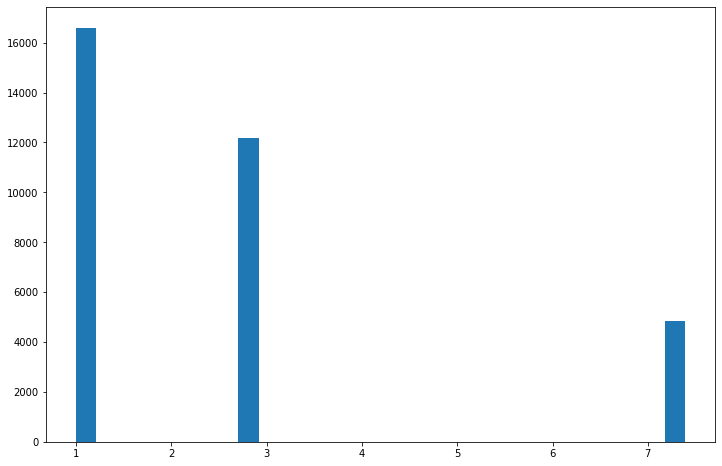

open_acc----------------


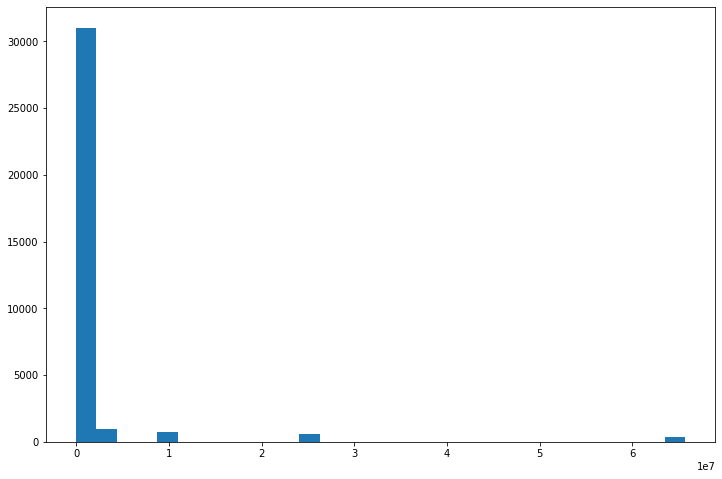

pub_rec----------------


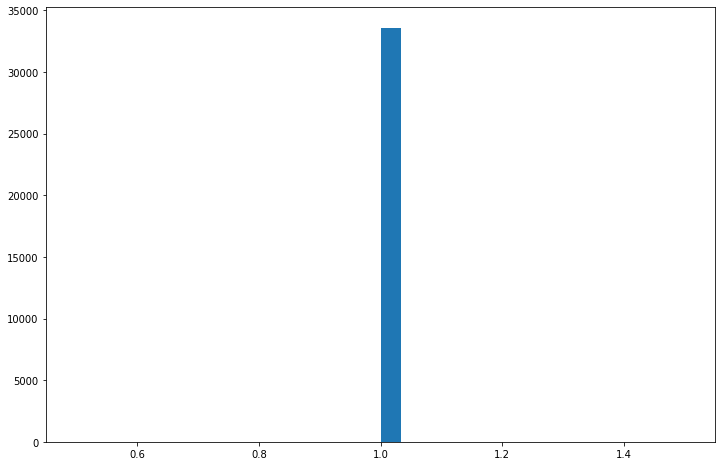

revol_util----------------


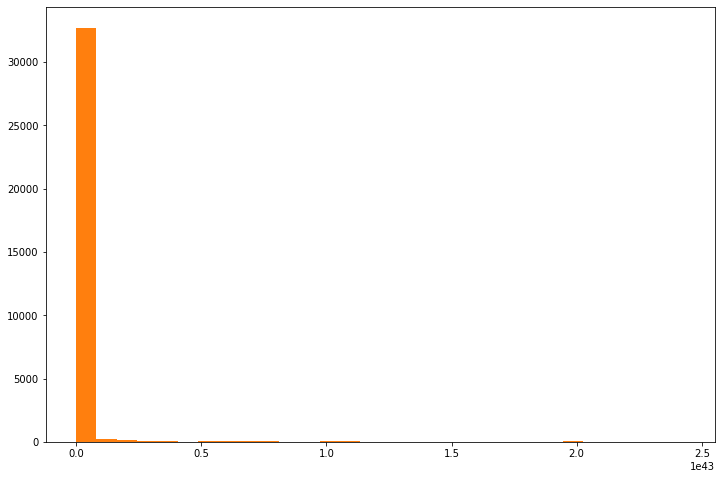

total_acc----------------


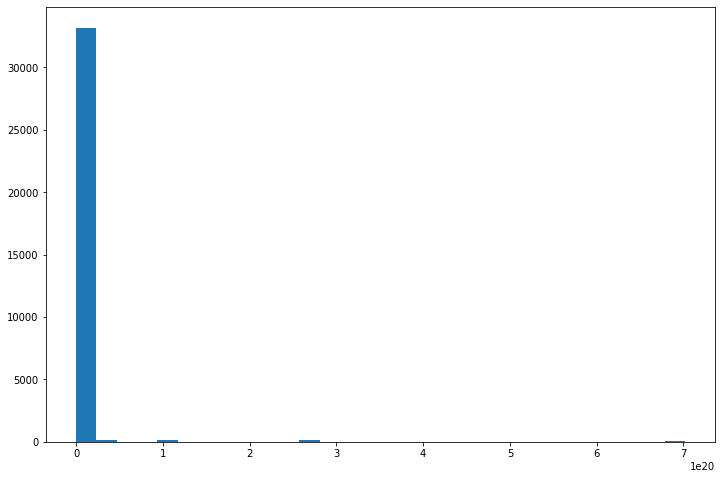

pub_rec_bankruptcies----------------


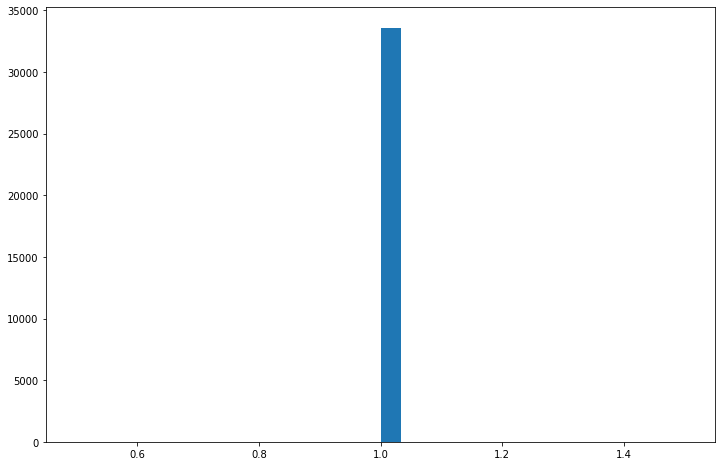

num_yr_earl_cr_line----------------


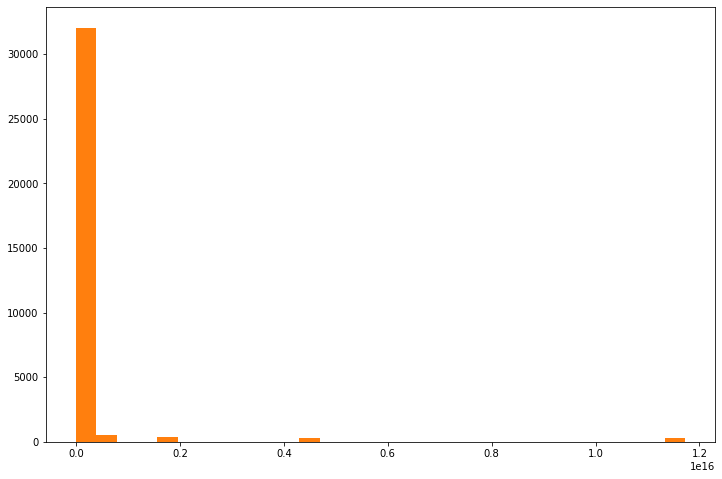

num_yr_lt_credit_pull----------------


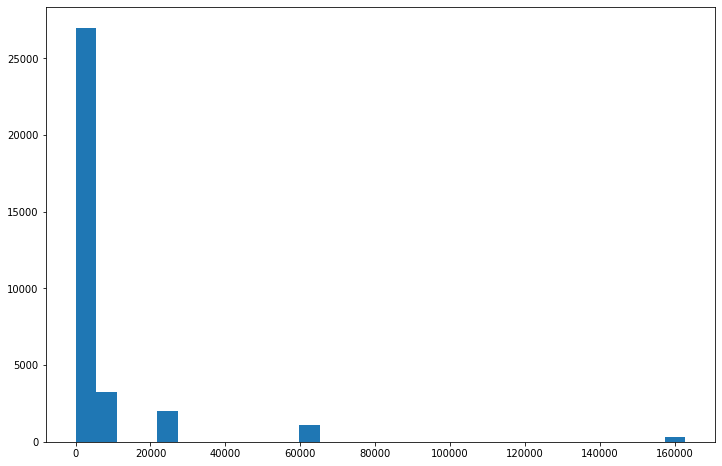

In [ ]:
# Visualization of the Distribution of Numerical Features after exponential transformation
for col in cont_col_list:
  try:
    plt.hist(loan_df_copy7['exp_'+col], bins=30)
    print(col+"----------------")
    plt.show()
  except:
    pass

### Square Root Transformation

In [ ]:
# using deepcopy to deep copy 
loan_df_copy6 = copy.deepcopy(loan_df_copy4)

In [ ]:
# Create variables for transformed values for the numerical variables
for col in cont_col_list:
  loan_df_copy6['sqrt_'+col] = np.sqrt(loan_df_copy6[col])

In [ ]:
loan_df_copy6.head()

loan_amnt  installment  grade  emp_length  annual_inc  loan_status    dti  \
0     5000.0       162.87      2          10     24000.0            1  27.65   
1     2500.0        59.83      3           0     30000.0            0   1.00   
2     2400.0        84.33      3          10     12252.0            1   8.72   
3    10000.0       339.31      3          10     49200.0            1  20.00   
5     5000.0       156.46      1           3     36000.0            1  11.20   

   delinq_2yrs  inq_last_6mths  open_acc  pub_rec  revol_bal  revol_util  \
0          0.0             1.0       3.0      0.0    13648.0        83.7   
1          0.0             1.0       3.0      0.0     1687.0         9.4   
2          0.0             2.0       2.0      0.0     2956.0        98.5   
3          0.0             1.0      10.0      0.0     5598.0        21.0   
5          0.0             1.0       9.0      0.0     7963.0        28.3   

   total_acc  pub_rec_bankruptcies  average_fico  home_ownership_MORTGAGE  \
0        9.0                   0.0         737.0                        0   
1        4.0                   0.0         742.0                        0   
2       10.0                   0.0         737.0                        0   
3       37.0                   0.0         692.0                        0   
5       12.0                   0.0         732.0                        0   

   home_ownership_NONE  home_ownership_OTHER  home_ownership_OWN  \
0                    0                     0                   0   
1                    0                     0                   0   
2                    0                     0                   0   
3                    0                     0                   0   
5                    0                     0                   0   

   home_ownership_RENT  verification_status_Not Verified  \
0                    1                                 0   
1                    1                                 0   
2                    1                                 1   
3                    1                                 0   
5                    1                                 0   

   verification_status_Source Verified  verification_status_Verified  \
0                                    0                             1   
1                                    1                             0   
2                                    0                             0   
3                                    1                             0   
5                                    1                             0   

   purpose_car  purpose_credit_card  purpose_debt_consolidation  \
0            0                    1                           0   
1            1                    0                           0   
2            0                    0                           0   
3            0                    0                           0   
5            0                    0                           0   

   purpose_educational  purpose_home_improvement  purpose_house  \
0                    0                         0              0   
1                    0                         0              0   
2                    0                         0              0   
3                    0                         0              0   
5                    0                         0              0   

   purpose_major_purchase  purpose_medical  purpose_moving  purpose_other  \
0                       0                0               0              0   
1                       0                0               0              0   
2                       0                0               0              0   
3                       0                0               0              1   
5                       0                0               0              0   

   purpose_renewable_energy  purpose_small_business  purpose_vacation  \
0                         0                       0      

loan_amnt----------------


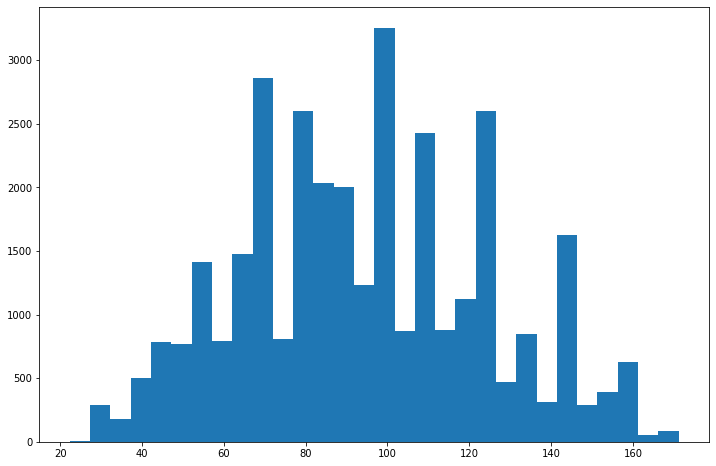

installment----------------


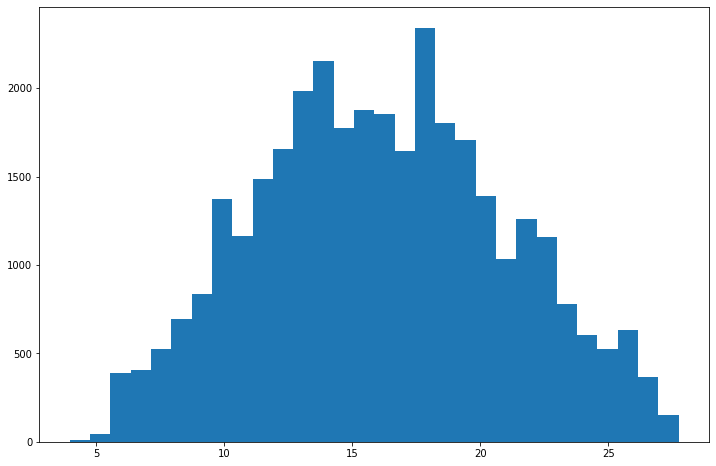

annual_inc----------------


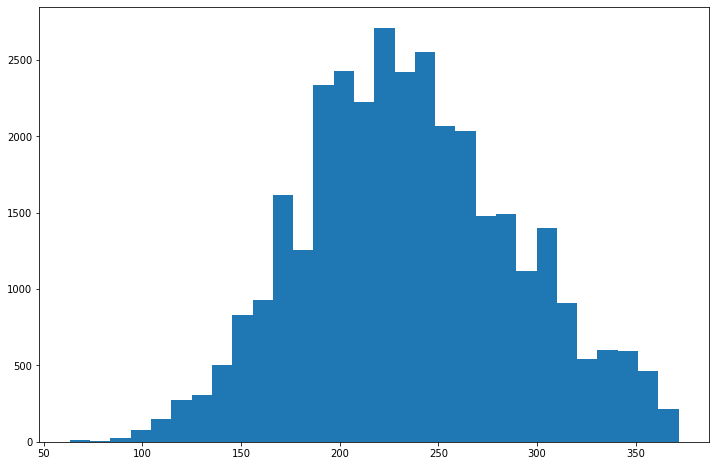

dti----------------


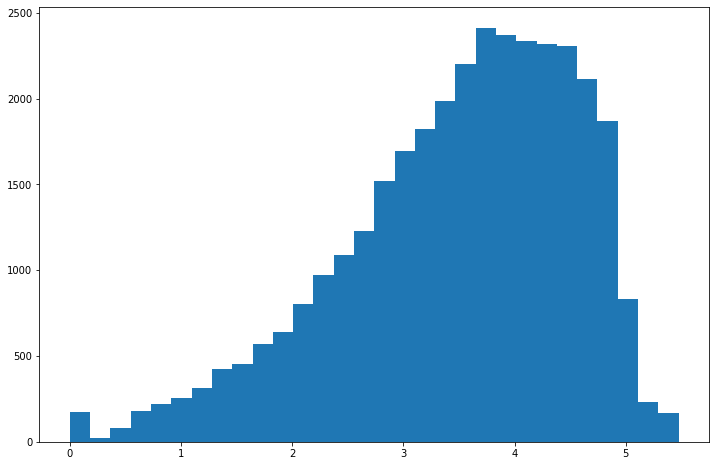

delinq_2yrs----------------


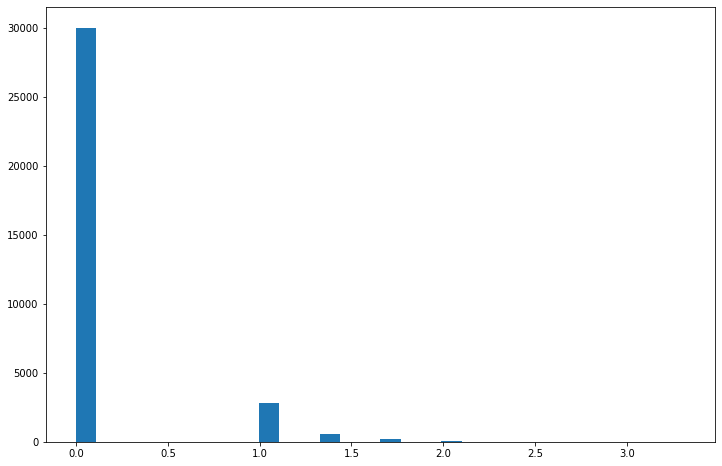

inq_last_6mths----------------


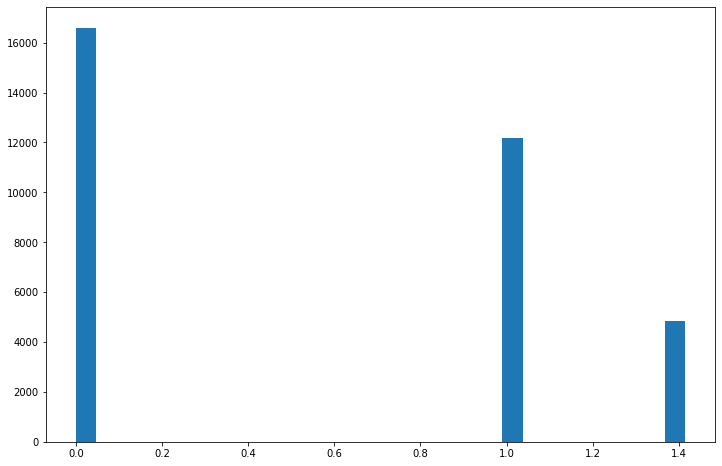

open_acc----------------


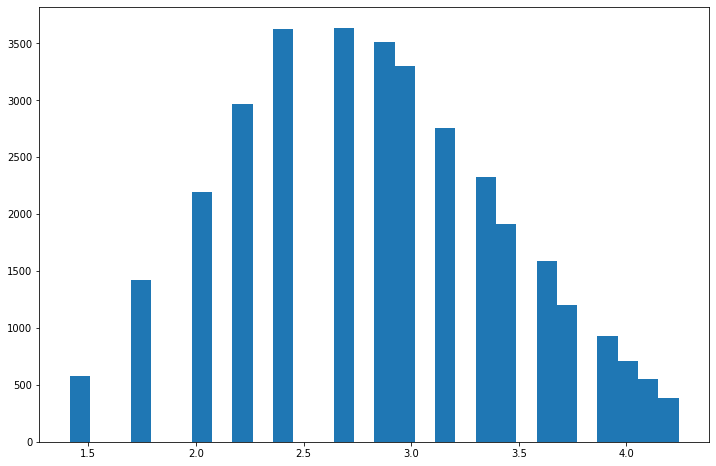

pub_rec----------------


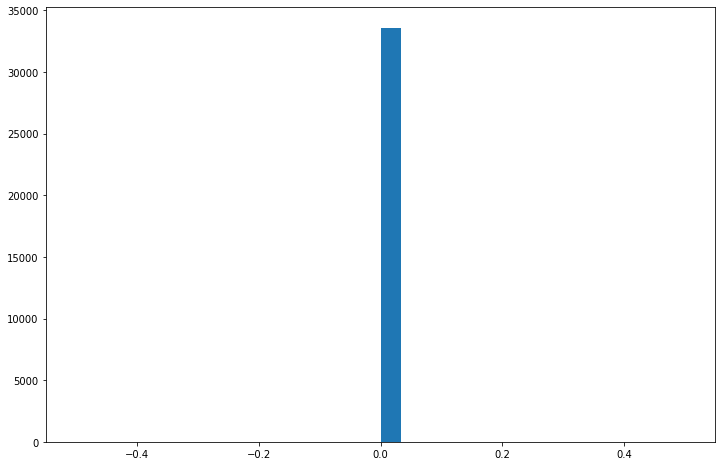

revol_bal----------------


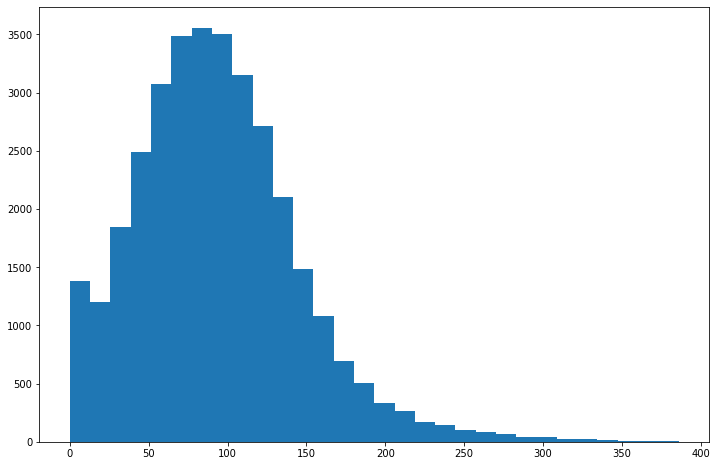

revol_util----------------


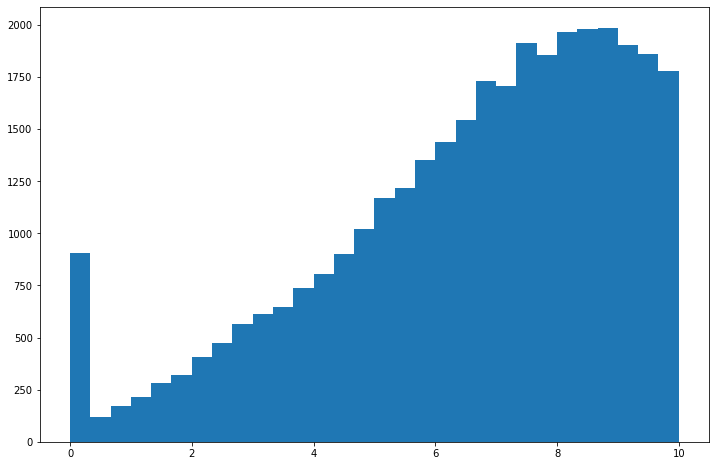

total_acc----------------


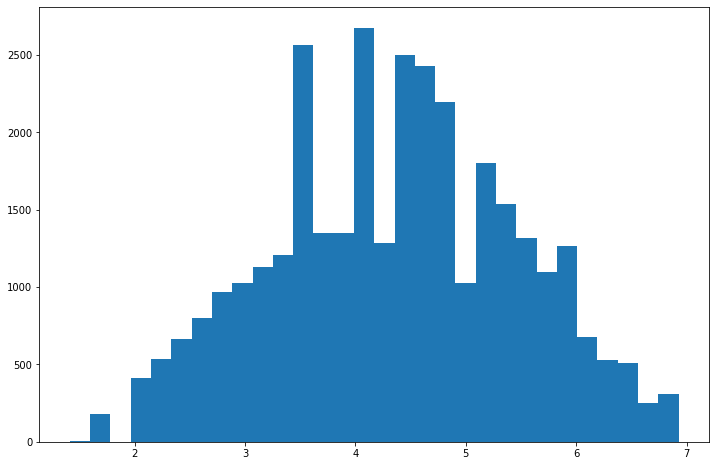

pub_rec_bankruptcies----------------


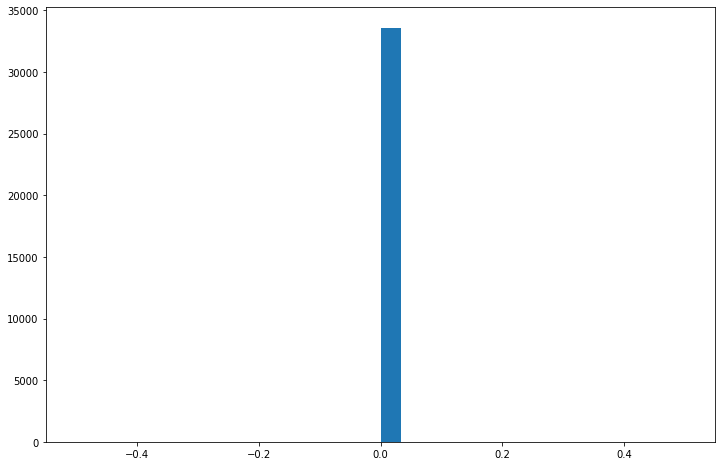

average_fico----------------


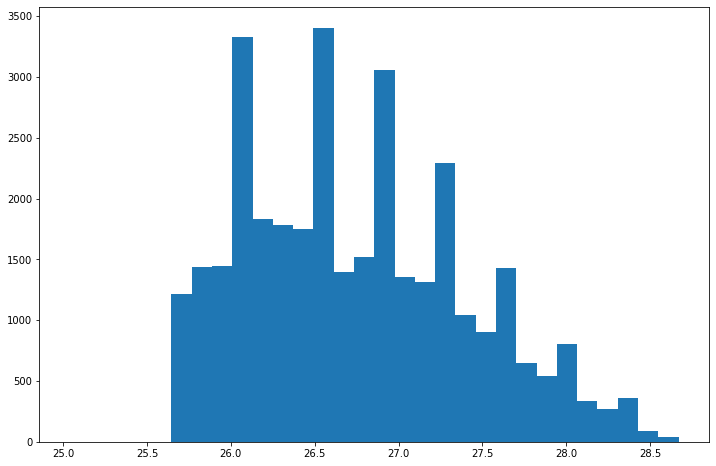

num_yr_earl_cr_line----------------


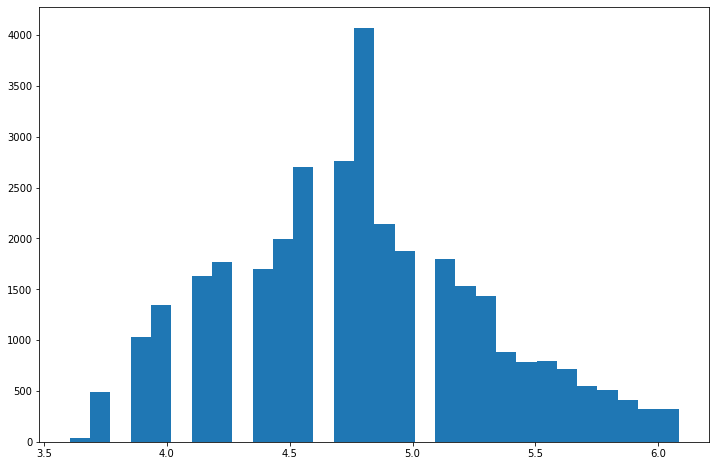

num_yr_lt_credit_pull----------------


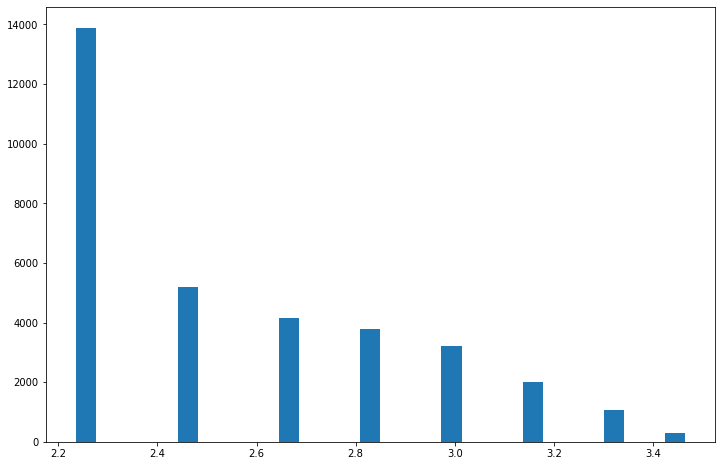

In [ ]:
# Visualization of the Distribution of Numerical Features after square root transformation
for col in cont_col_list:
  print(col+"----------------")
  plt.hist(loan_df_copy6['sqrt_'+col], bins=30)

  plt.show()

## Power Transformation

In [ ]:
# using deepcopy to deep copy 
loan_df_copy8 = copy.deepcopy(loan_df_copy4)

In [ ]:
# Create variables for transformed values for the numerical variables
for col in cont_col_list:
  loan_df_copy8['pow2_'+col] = np.power(loan_df_copy8[col], 2)

In [ ]:
loan_df_copy8.head()

loan_amnt  installment  grade  emp_length  annual_inc  loan_status    dti  \
0     5000.0       162.87      2          10     24000.0            1  27.65   
1     2500.0        59.83      3           0     30000.0            0   1.00   
2     2400.0        84.33      3          10     12252.0            1   8.72   
3    10000.0       339.31      3          10     49200.0            1  20.00   
5     5000.0       156.46      1           3     36000.0            1  11.20   

   delinq_2yrs  inq_last_6mths  open_acc  pub_rec  revol_bal  revol_util  \
0          0.0             1.0       3.0      0.0    13648.0        83.7   
1          0.0             1.0       3.0      0.0     1687.0         9.4   
2          0.0             2.0       2.0      0.0     2956.0        98.5   
3          0.0             1.0      10.0      0.0     5598.0        21.0   
5          0.0             1.0       9.0      0.0     7963.0        28.3   

   total_acc  pub_rec_bankruptcies  average_fico  home_ownership_MORTGAGE  \
0        9.0                   0.0         737.0                        0   
1        4.0                   0.0         742.0                        0   
2       10.0                   0.0         737.0                        0   
3       37.0                   0.0         692.0                        0   
5       12.0                   0.0         732.0                        0   

   home_ownership_NONE  home_ownership_OTHER  home_ownership_OWN  \
0                    0                     0                   0   
1                    0                     0                   0   
2                    0                     0                   0   
3                    0                     0                   0   
5                    0                     0                   0   

   home_ownership_RENT  verification_status_Not Verified  \
0                    1                                 0   
1                    1                                 0   
2                    1                                 1   
3                    1                                 0   
5                    1                                 0   

   verification_status_Source Verified  verification_status_Verified  \
0                                    0                             1   
1                                    1                             0   
2                                    0                             0   
3                                    1                             0   
5                                    1                             0   

   purpose_car  purpose_credit_card  purpose_debt_consolidation  \
0            0                    1                           0   
1            1                    0                           0   
2            0                    0                           0   
3            0                    0                           0   
5            0                    0                           0   

   purpose_educational  purpose_home_improvement  purpose_house  \
0                    0                         0              0   
1                    0                         0              0   
2                    0                         0              0   
3                    0                         0              0   
5                    0                         0              0   

   purpose_major_purchase  purpose_medical  purpose_moving  purpose_other  \
0                       0                0               0              0   
1                       0                0               0              0   
2                       0                0               0              0   
3                       0                0               0              1   
5                       0                0               0              0   

   purpose_renewable_energy  purpose_small_business  purpose_vacation  \
0                         0                       0      

loan_amnt----------------


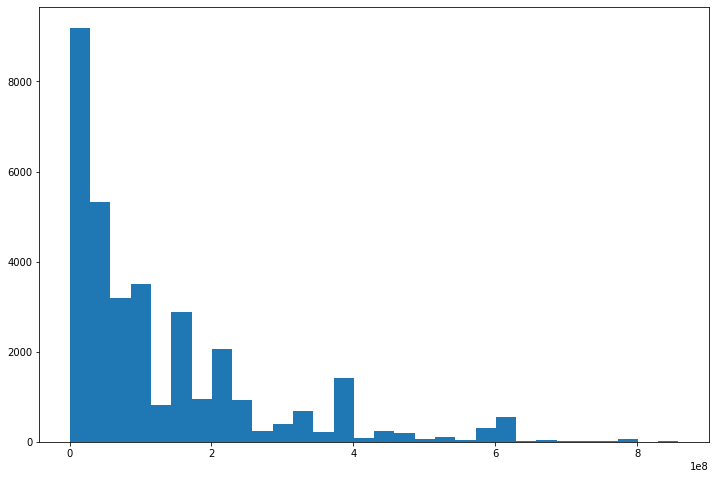

installment----------------


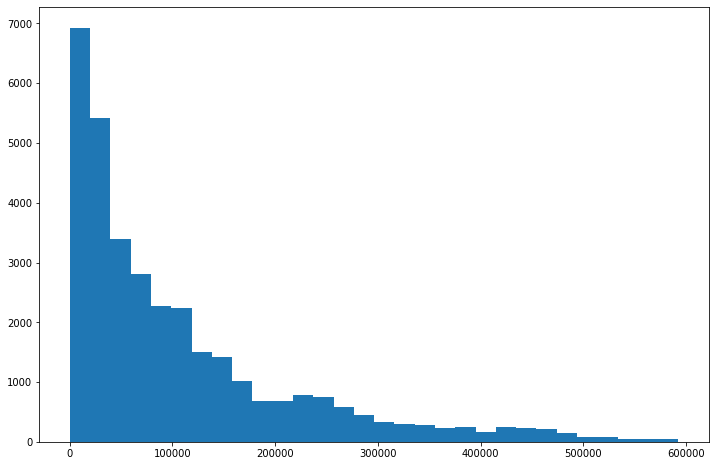

annual_inc----------------


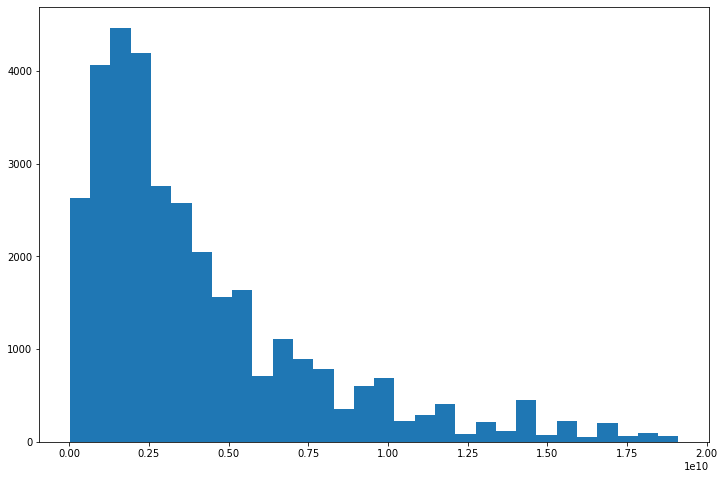

dti----------------


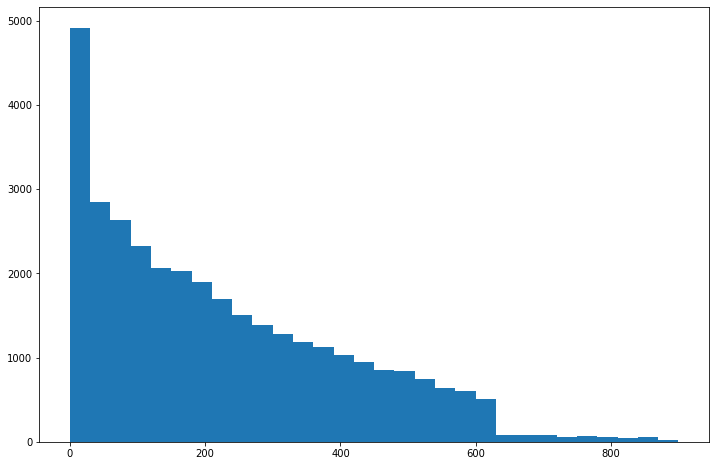

delinq_2yrs----------------


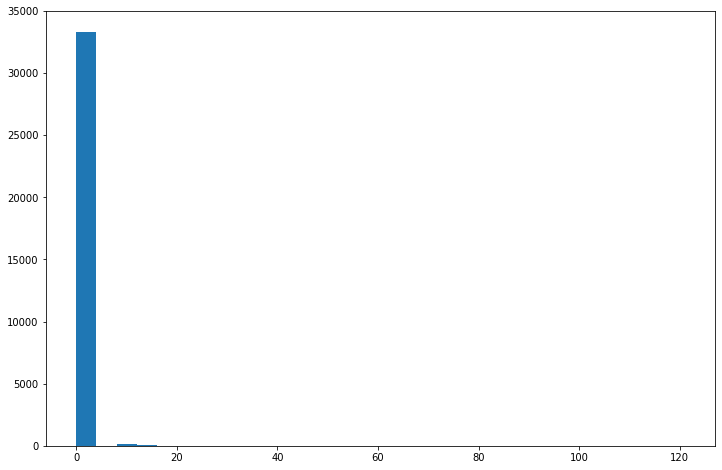

inq_last_6mths----------------


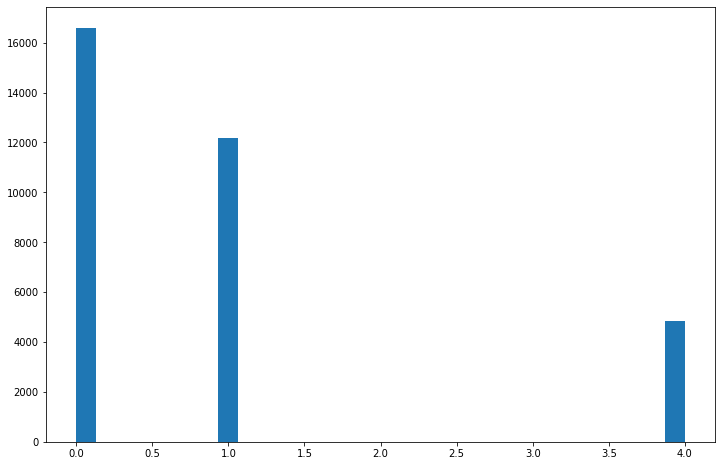

open_acc----------------


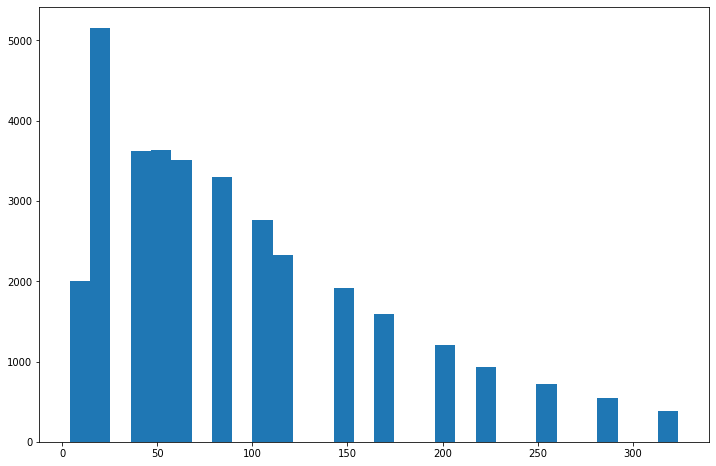

pub_rec----------------


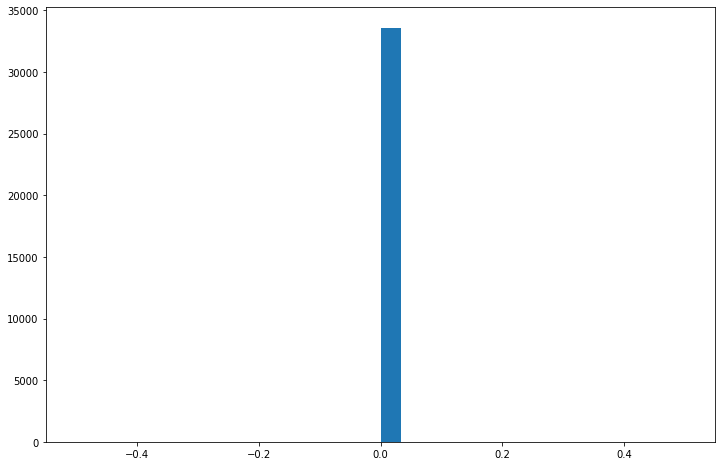

revol_bal----------------


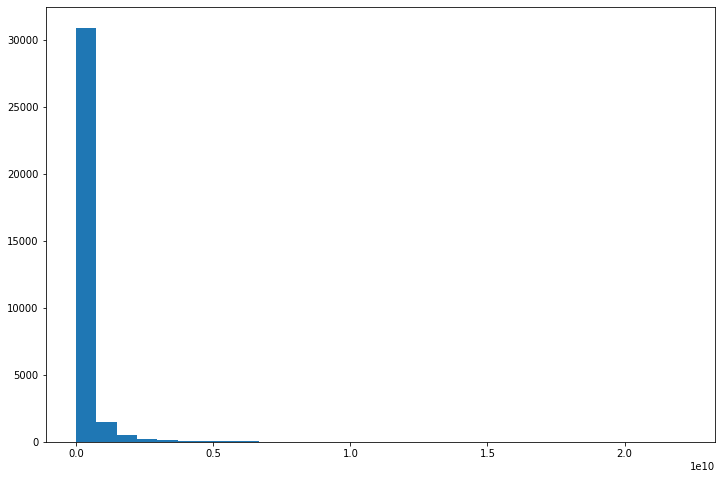

revol_util----------------


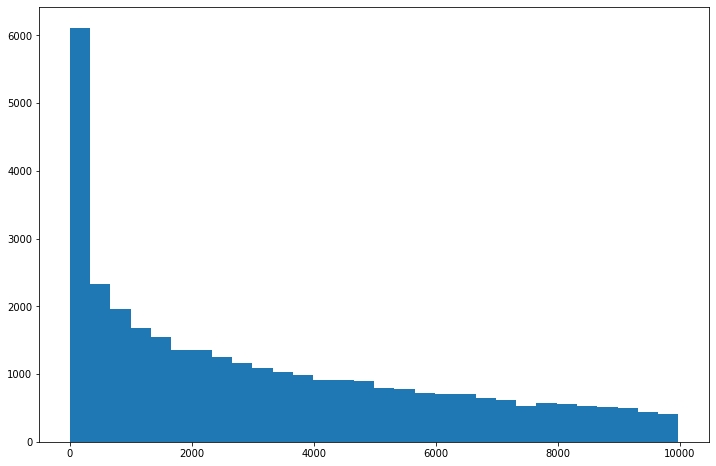

total_acc----------------


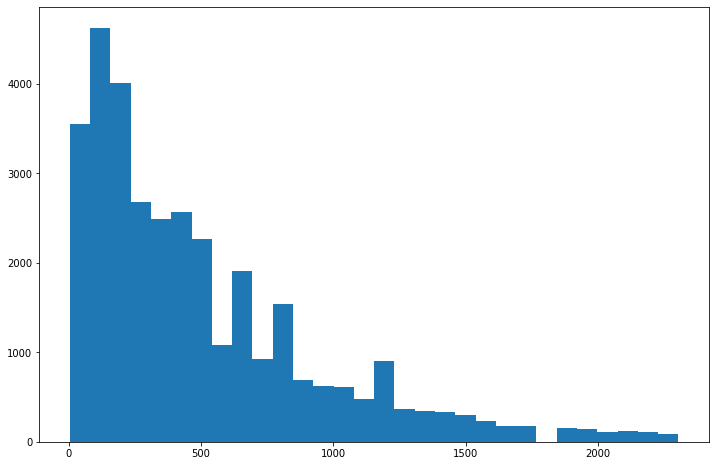

pub_rec_bankruptcies----------------


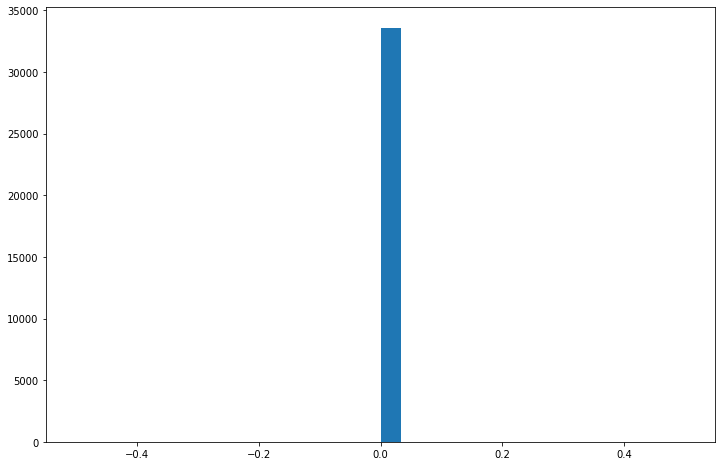

average_fico----------------


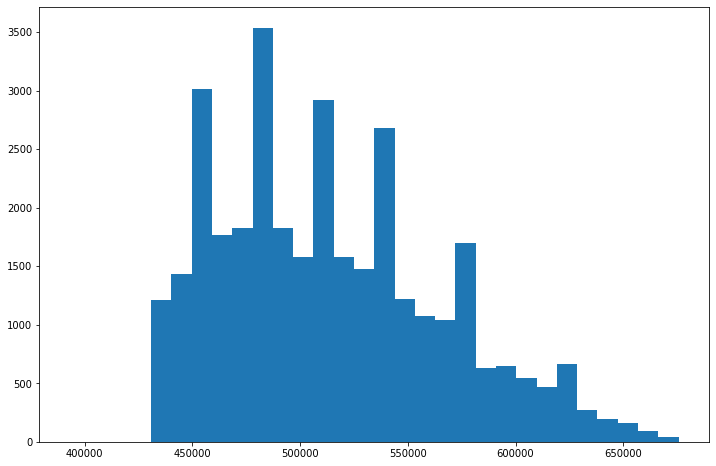

num_yr_earl_cr_line----------------


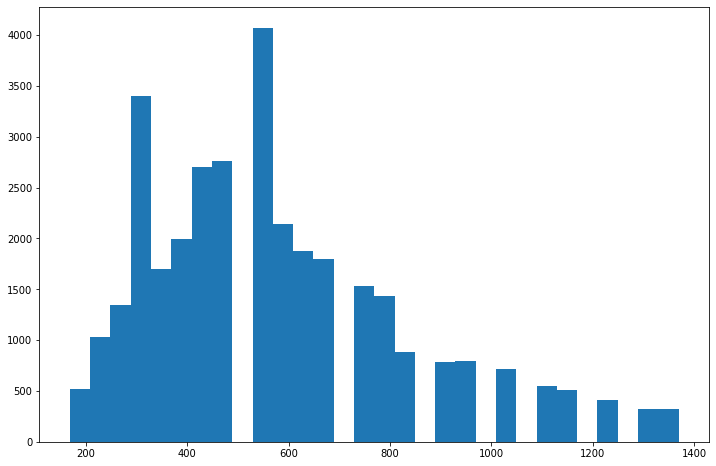

num_yr_lt_credit_pull----------------


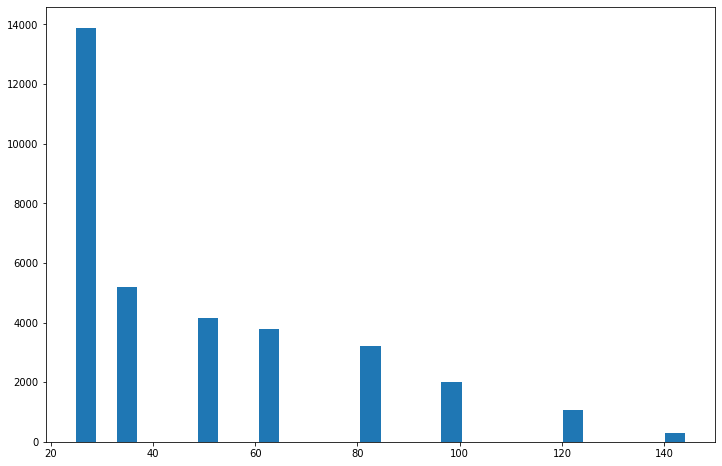

In [ ]:
# Visualization of the Distribution of Numerical Features after transformation with power of 2
for col in cont_col_list:
  print(col+"----------------")
  plt.hist(loan_df_copy8['pow2_'+col], bins=30)

  plt.show()

### Splitting the data into train-test split

In [ ]:
loan_df_copy4.isnull().sum()

loan_amnt                              0
installment                            0
grade                                  0
emp_length                             0
annual_inc                             0
loan_status                            0
dti                                    0
delinq_2yrs                            0
inq_last_6mths                         0
open_acc                               0
pub_rec                                0
revol_bal                              0
revol_util                             0
total_acc                              0
pub_rec_bankruptcies                   0
average_fico                           0
home_ownership_MORTGAGE                0
home_ownership_NONE                    0
home_ownership_OTHER                   0
home_ownership_OWN                     0
home_ownership_RENT                    0
verification_status_Not Verified       0
verification_status_Source Verified    0
verification_status_Verified           0
purpose_car     

## Standardization

In [ ]:
# Splitting the Dataset into independent and dependent features
X = loan_df_copy4.drop('loan_status', axis=1).values
y = loan_df_copy4.loan_status.values

In [ ]:
# Splitting the dataset into the Training and Test set for Model Building
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.30, random_state=11)

Scaling the data set using standard scaler

In [ ]:
# z-score normalization
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_valid = sc_X.transform(X_valid)
y_train = y_train
y_valid = y_valid

In [ ]:
# Oversampling the data set
over_sampler = RandomOverSampler(random_state=42)

In [ ]:
print(f"Training target statistics before oversampling: {Counter(y_train)}")
X_res, y_res = over_sampler.fit_resample(X_train, y_train)
print(f"Training target statistics after oversampling: {Counter(y_res)}")

Training target statistics before oversampling: Counter({1: 20133, 0: 3389})
Training target statistics after oversampling: Counter({0: 20133, 1: 20133})


In [ ]:
loan_df_copy4.drop('loan_status', axis=1).columns

Index(['loan_amnt', 'installment', 'grade', 'emp_length', 'annual_inc', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'pub_rec_bankruptcies', 'average_fico',
       'home_ownership_MORTGAGE', 'home_ownership_NONE',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT',
       'verification_status_Not Verified',
       'verification_status_Source Verified', 'verification_status_Verified',
       'purpose_car', 'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'term_ 36 months',
       'term_ 60 months', 'num_yr_earl_cr_line', 'num_yr_lt_credit_pull'],
      dtype='object')

In [ ]:
# creating a dataframe for the train data from a numpy array
df_train = pd.DataFrame(X_res, columns=loan_df_copy4.drop('loan_status', axis=1).columns)

In [ ]:
df_train.head()

loan_amnt  installment     grade  emp_length  annual_inc       dti  \
0   1.308663     0.714542  0.381206   -1.383893   -0.622067  1.453910   
1  -0.987507    -1.156432  1.129743    1.413746   -0.356383 -0.758817   
2   1.691359     2.410171  0.381206    1.413746   -0.795141  0.121483   
3  -0.817421    -0.724726  0.381206    0.854218    1.404720 -0.372563   
4  -0.545282    -0.432094 -0.367331    1.413746    0.250894  1.142511   

   delinq_2yrs  inq_last_6mths  open_acc  pub_rec  revol_bal  revol_util  \
0    -0.290961       -0.908605 -0.711125      0.0   0.501048    1.476898   
1    -0.290961        0.483086 -1.256862      0.0  -0.669881   -0.044490   
2     7.825241       -0.908605 -0.711125      0.0  -0.779019   -1.127151   
3    -0.290961       -0.908605  0.380347      0.0  -0.276608   -0.129404   
4    -0.290961       -0.908605  0.653216      0.0  -0.179902    0.401312   

   total_acc  pub_rec_bankruptcies  average_fico  home_ownership_MORTGAGE  \
0  -1.044919                   0.0      0.580388                -0.835740   
1  -0.013479                   0.0     -1.103714                -0.835740   
2   2.461975                   0.0     -0.682689                -0.835740   
3   0.295952                   0.0     -1.244056                 1.196544   
4   1.224248                   0.0     -0.823030                 1.196544   

   home_ownership_NONE  home_ownership_OTHER  home_ownership_OWN  \
0             -0.00652             -0.045689           -0.293796   
1             -0.00652             -0.045689           -0.293796   
2             -0.00652             -0.045689           -0.293796   
3             -0.00652             -0.045689           -0.293796   
4             -0.00652             -0.045689           -0.293796   

   home_ownership_RENT  verification_status_Not Verified  \
0             0.985732                         -0.916099   
1             0.985732                         -0.916099   
2             0.985732                          1.091585   
3            -1.014474                          1.091585   
4            -1.014474                          1.091585   

   verification_status_Source Verified  verification_status_Verified  \
0                             1.685513                     -0.628796   
1                            -0.593291                      1.590340   
2                            -0.593291                     -0.628796   
3                            -0.593291                     -0.628796   
4                            -0.593291                     -0.628796   

   purpose_car  purpose_credit_card  purpose_debt_consolidation  \
0    -0.207616            -0.385694                    1.076924   
1    -0.207616            -0.385694                    1.076924   
2    -0.207616            -0.385694                   -0.928571   
3    -0.207616            -0.385694                   -0.928571   
4    -0.207616            -0.385694                    1.076924   

   purpose_educational  purpose_home_improvement  purpose_house  \
0             -0.09307                 -0.269978      -0.093765   
1             -0.09307                 -0.269978      -0.093765   
2             -0.09307                 -0.269978      -0.093765   
3             -0.09307                  3.704005      -0.093765   
4             -0.09307                 -0.269978      -0.093765   

   purpose_major_purchase  purpose_medical  purpose_moving  purpose_other  \
0               -0.249938        -0.139657       -0.125721      -0.344543   
1               -0.249938        -0.139657       -0.125721      -0.344543   
2                4.000994        -0.139657       -0.125721      -0.344543   
3               -0.249938        -0.139657       -0.125721      -0.344543   
4               -0.249938        -0.139657       -0.125721      -0.344543   

   purpose_renewable_energy  purpose_small_business  purpose_vacation  \
0                 -0.050991               -0.212142         -0.101957   
1                 -0.05099

In [ ]:
# including the target variable in the train dataframe
df_train['loan_status'] = list(y_res)

In [ ]:
df_train.head()

loan_amnt  installment     grade  emp_length  annual_inc       dti  \
0   1.308663     0.714542  0.381206   -1.383893   -0.622067  1.453910   
1  -0.987507    -1.156432  1.129743    1.413746   -0.356383 -0.758817   
2   1.691359     2.410171  0.381206    1.413746   -0.795141  0.121483   
3  -0.817421    -0.724726  0.381206    0.854218    1.404720 -0.372563   
4  -0.545282    -0.432094 -0.367331    1.413746    0.250894  1.142511   

   delinq_2yrs  inq_last_6mths  open_acc  pub_rec  revol_bal  revol_util  \
0    -0.290961       -0.908605 -0.711125      0.0   0.501048    1.476898   
1    -0.290961        0.483086 -1.256862      0.0  -0.669881   -0.044490   
2     7.825241       -0.908605 -0.711125      0.0  -0.779019   -1.127151   
3    -0.290961       -0.908605  0.380347      0.0  -0.276608   -0.129404   
4    -0.290961       -0.908605  0.653216      0.0  -0.179902    0.401312   

   total_acc  pub_rec_bankruptcies  average_fico  home_ownership_MORTGAGE  \
0  -1.044919                   0.0      0.580388                -0.835740   
1  -0.013479                   0.0     -1.103714                -0.835740   
2   2.461975                   0.0     -0.682689                -0.835740   
3   0.295952                   0.0     -1.244056                 1.196544   
4   1.224248                   0.0     -0.823030                 1.196544   

   home_ownership_NONE  home_ownership_OTHER  home_ownership_OWN  \
0             -0.00652             -0.045689           -0.293796   
1             -0.00652             -0.045689           -0.293796   
2             -0.00652             -0.045689           -0.293796   
3             -0.00652             -0.045689           -0.293796   
4             -0.00652             -0.045689           -0.293796   

   home_ownership_RENT  verification_status_Not Verified  \
0             0.985732                         -0.916099   
1             0.985732                         -0.916099   
2             0.985732                          1.091585   
3            -1.014474                          1.091585   
4            -1.014474                          1.091585   

   verification_status_Source Verified  verification_status_Verified  \
0                             1.685513                     -0.628796   
1                            -0.593291                      1.590340   
2                            -0.593291                     -0.628796   
3                            -0.593291                     -0.628796   
4                            -0.593291                     -0.628796   

   purpose_car  purpose_credit_card  purpose_debt_consolidation  \
0    -0.207616            -0.385694                    1.076924   
1    -0.207616            -0.385694                    1.076924   
2    -0.207616            -0.385694                   -0.928571   
3    -0.207616            -0.385694                   -0.928571   
4    -0.207616            -0.385694                    1.076924   

   purpose_educational  purpose_home_improvement  purpose_house  \
0             -0.09307                 -0.269978      -0.093765   
1             -0.09307                 -0.269978      -0.093765   
2             -0.09307                 -0.269978      -0.093765   
3             -0.09307                  3.704005      -0.093765   
4             -0.09307                 -0.269978      -0.093765   

   purpose_major_purchase  purpose_medical  purpose_moving  purpose_other  \
0               -0.249938        -0.139657       -0.125721      -0.344543   
1               -0.249938        -0.139657       -0.125721      -0.344543   
2                4.000994        -0.139657       -0.125721      -0.344543   
3               -0.249938        -0.139657       -0.125721      -0.344543   
4               -0.249938        -0.139657       -0.125721      -0.344543   

   purpose_renewable_energy  purpose_small_business  purpose_vacation  \
0                 -0.050991               -0.212142         -0.101957   
1                 -0.05099

In [ ]:
df_train.columns

Index(['loan_amnt', 'installment', 'grade', 'emp_length', 'annual_inc', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'pub_rec_bankruptcies', 'average_fico',
       'home_ownership_MORTGAGE', 'home_ownership_NONE',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT',
       'verification_status_Not Verified',
       'verification_status_Source Verified', 'verification_status_Verified',
       'purpose_car', 'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'term_ 36 months',
       'term_ 60 months', 'num_yr_earl_cr_line', 'num_yr_lt_credit_pull',
       'loan_status'],
      dtype='object')

In [ ]:
# creating a dataframe for the test data from a numpy array
df_test = pd.DataFrame(X_valid, columns=loan_df_copy4.drop('loan_status', axis=1).columns)

In [ ]:
# including the target variable in the test dataframe
df_test['loan_status'] = pd.DataFrame(y_valid, columns=['loan_status'])

In [ ]:
df_test.head()

loan_amnt  installment     grade  emp_length  annual_inc       dti  \
0  -1.123577    -1.143186 -1.115869   -0.824365   -0.849796  1.744349   
1  -0.757890    -0.694398 -0.367331    1.413746   -0.014790  0.861054   
2   1.733880     1.134921  0.381206   -0.544601    1.009990 -0.670488   
3  -0.137074    -0.073360 -1.115869   -0.264837    1.882951 -0.272257   
4   1.138577     1.637990 -0.367331    0.854218    0.630442  0.410425   

   delinq_2yrs  inq_last_6mths  open_acc  pub_rec  revol_bal  revol_util  \
0    -0.290961        0.483086  0.107479      0.0  -0.703323   -0.989165   
1     1.738089        1.874777 -0.165389      0.0   1.140452    0.068730   
2    -0.290961       -0.908605  0.380347      0.0   0.955224    0.397774   
3    -0.290961        1.874777  0.380347      0.0   8.576374   -1.006855   
4    -0.290961       -0.908605 -0.438257      0.0   2.518483    0.641904   

   total_acc  pub_rec_bankruptcies  average_fico  home_ownership_MORTGAGE  \
0  -0.632343                   0.0     -0.121321                -0.835740   
1   1.017960                   0.0      0.299705                 1.196544   
2   0.399096                   0.0     -0.261663                 1.196544   
3   1.121104                   0.0      0.861072                 1.196544   
4   0.295952                   0.0      0.019021                -0.835740   

   home_ownership_NONE  home_ownership_OTHER  home_ownership_OWN  \
0             -0.00652             -0.045689           -0.293796   
1             -0.00652             -0.045689           -0.293796   
2             -0.00652             -0.045689           -0.293796   
3             -0.00652             -0.045689           -0.293796   
4             -0.00652             -0.045689            3.403724   

   home_ownership_RENT  verification_status_Not Verified  \
0             0.985732                          1.091585   
1            -1.014474                         -0.916099   
2            -1.014474                         -0.916099   
3            -1.014474                          1.091585   
4            -1.014474                          1.091585   

   verification_status_Source Verified  verification_status_Verified  \
0                            -0.593291                     -0.628796   
1                            -0.593291                      1.590340   
2                            -0.593291                      1.590340   
3                            -0.593291                     -0.628796   
4                            -0.593291                     -0.628796   

   purpose_car  purpose_credit_card  purpose_debt_consolidation  \
0    -0.207616            -0.385694                   -0.928571   
1    -0.207616            -0.385694                    1.076924   
2    -0.207616            -0.385694                    1.076924   
3    -0.207616            -0.385694                    1.076924   
4    -0.207616             2.592732                   -0.928571   

   purpose_educational  purpose_home_improvement  purpose_house  \
0             -0.09307                 -0.269978      -0.093765   
1             -0.09307                 -0.269978      -0.093765   
2             -0.09307                 -0.269978      -0.093765   
3             -0.09307                 -0.269978      -0.093765   
4             -0.09307                 -0.269978      -0.093765   

   purpose_major_purchase  purpose_medical  purpose_moving  purpose_other  \
0                4.000994        -0.139657       -0.125721      -0.344543   
1               -0.249938        -0.139657       -0.125721      -0.344543   
2               -0.249938        -0.139657       -0.125721      -0.344543   
3               -0.249938        -0.139657       -0.125721      -0.344543   
4               -0.249938        -0.139657       -0.125721      -0.344543   

   purpose_renewable_energy  purpose_small_business  purpose_vacation  \
0                 -0.050991               -0.212142         -0.101957   
1                 -0.05099

loan_amnt----------------


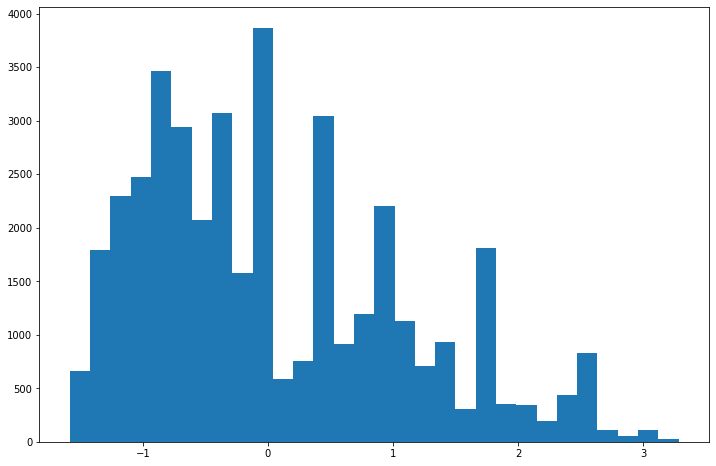

installment----------------


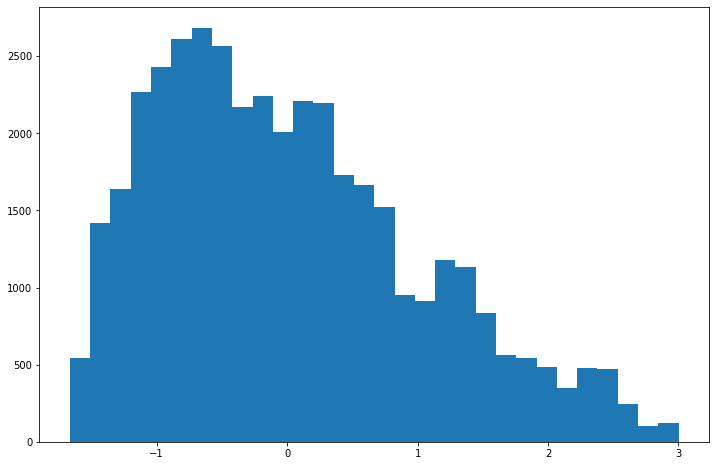

annual_inc----------------


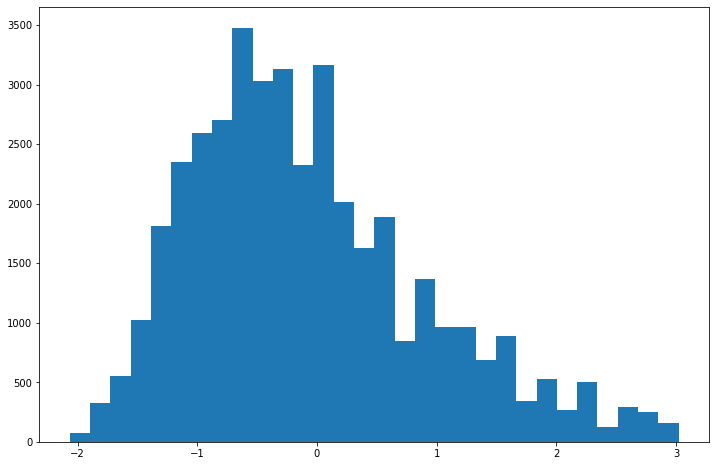

dti----------------


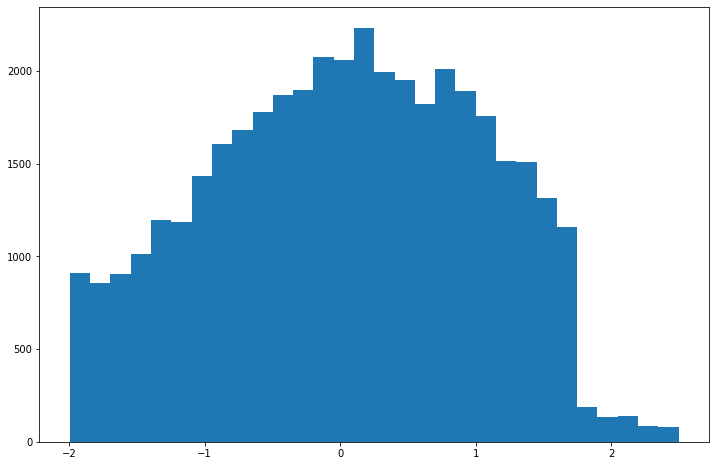

delinq_2yrs----------------


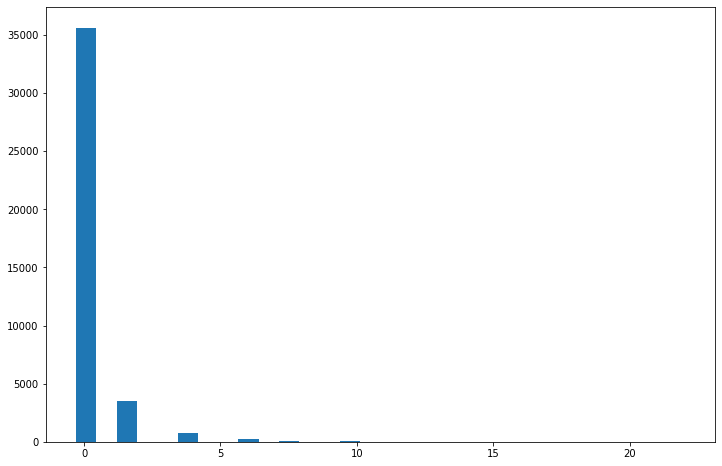

inq_last_6mths----------------


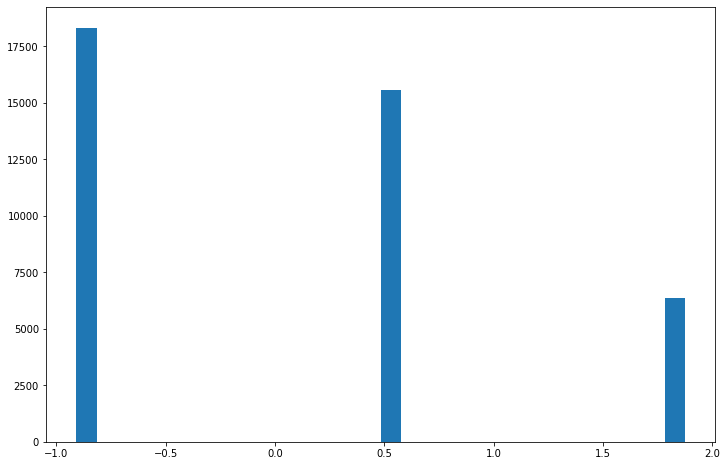

open_acc----------------


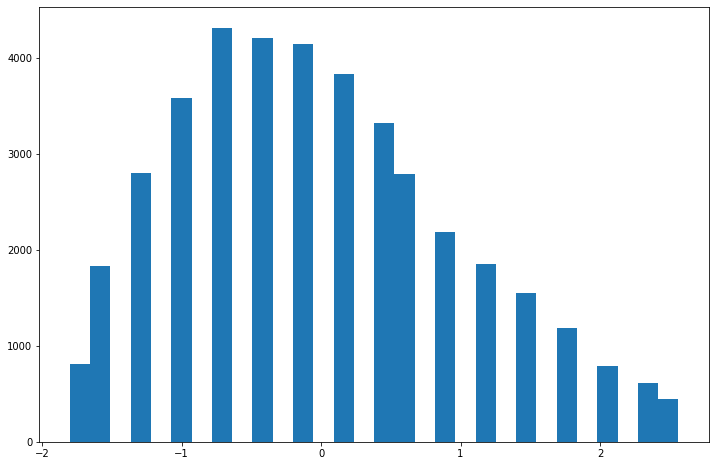

pub_rec----------------


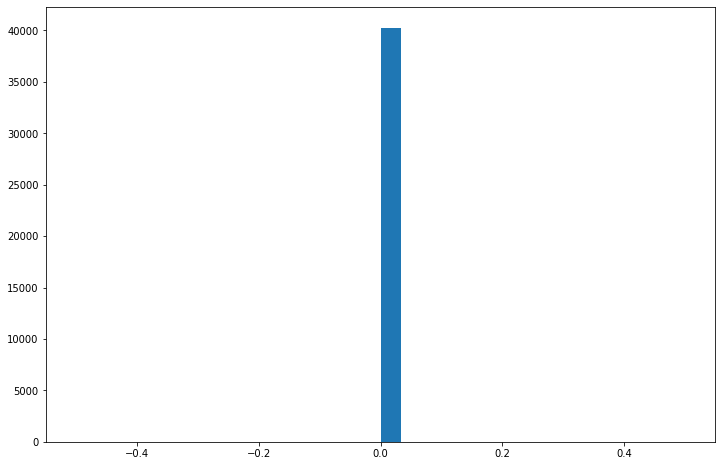

revol_bal----------------


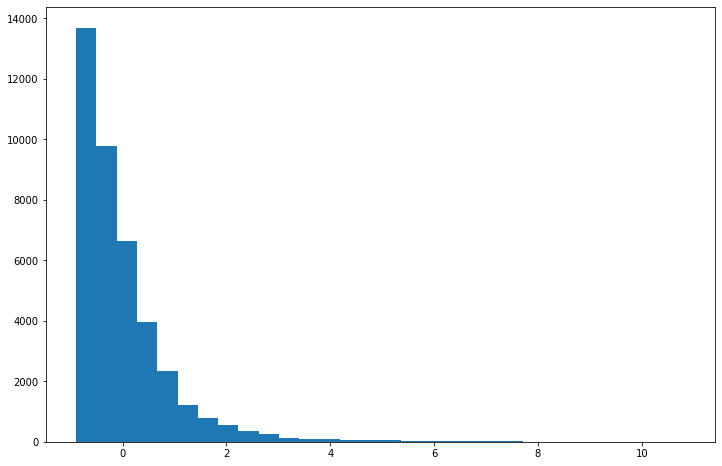

revol_util----------------


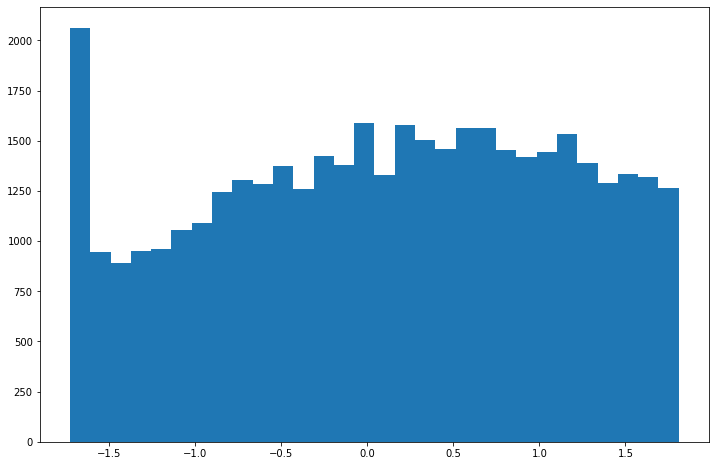

total_acc----------------


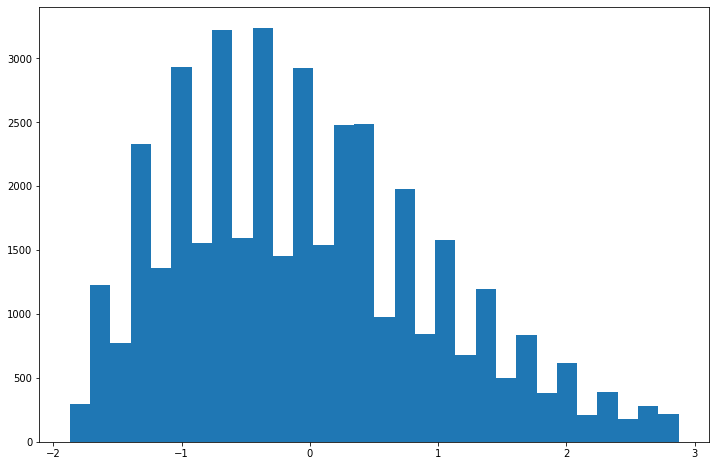

pub_rec_bankruptcies----------------


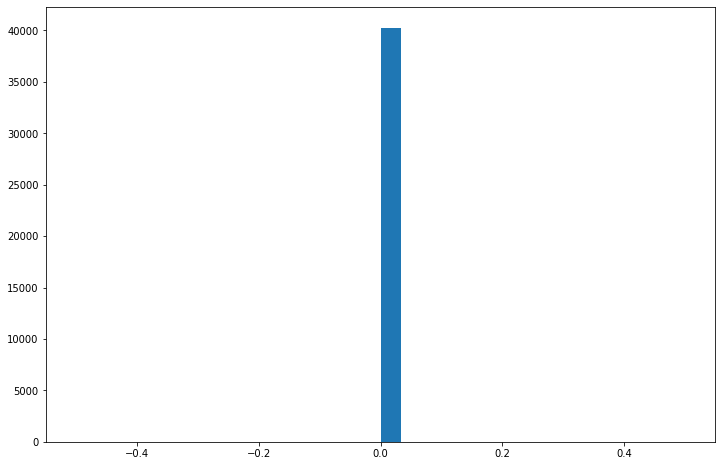

average_fico----------------


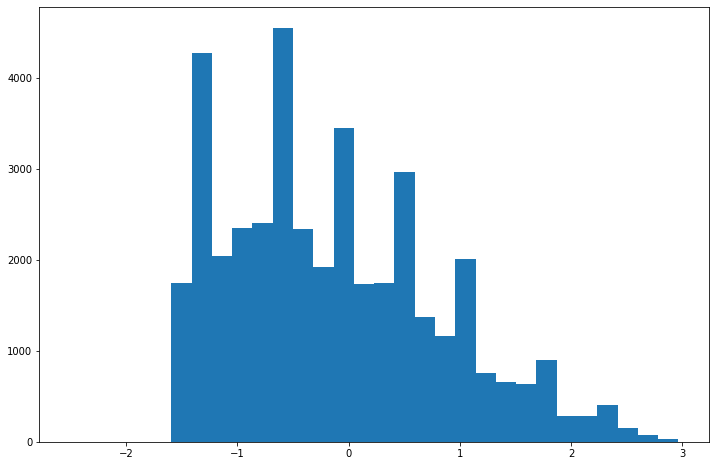

num_yr_earl_cr_line----------------


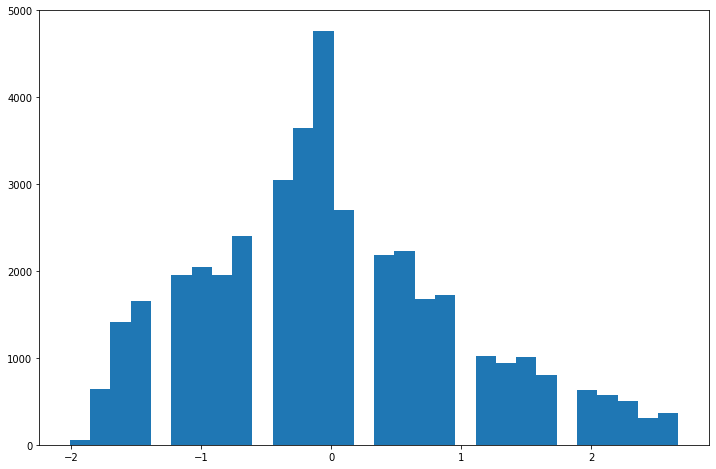

num_yr_lt_credit_pull----------------


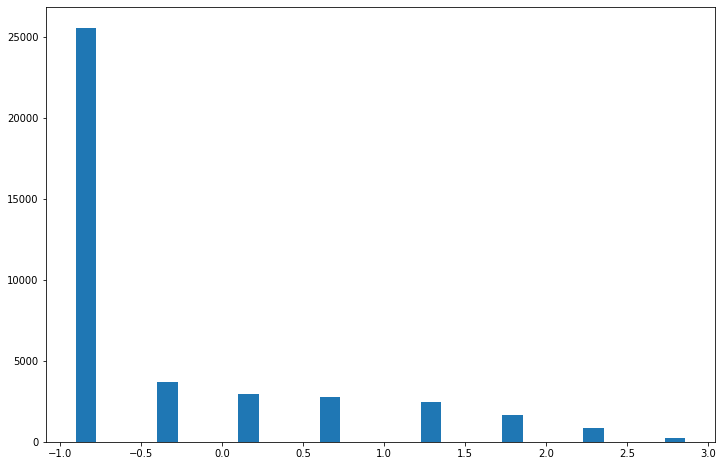

In [ ]:
# Visualization of the Distribution of Numerical Features after standardization with standard scaler
for col in cont_col_list:
  print(col+"----------------")
  plt.hist(df_train[col], bins=30)

  plt.show()

### Main Transformation After Checking Results Above

In [ ]:
# using deepcopy to deep copy 
loan_df_copy_main = copy.deepcopy(loan_df_copy4)

In [ ]:
cont_col_list

['loan_amnt',
 'installment',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'pub_rec_bankruptcies',
 'average_fico',
 'num_yr_earl_cr_line',
 'num_yr_lt_credit_pull']

It seems both log and square root transformation worked for 'open_acc' but square root transformation plot looks better (so we will choose this)

The list below groups all the numerical variables into a list based on the best transformation that worked for them or if the variable is better without any transformation in terms of skewness

In [ ]:
sqrt_col_list = ["loan_amnt", "installment", "annual_inc"]
log_col_list = ["revol_bal"]
no_trans_col_list = ["dti", "open_acc", "revol_util", "total_acc", "average_fico", "num_yr_earl_cr_line"]

Looks like none of the transformations we tried worked for 'delinq_2yrs', and 'inq_last_6mths', their plot is giving an impression that they should be categorical fields. We would make them categorical field and use one-hot encoding to make them dummy variable or leave them as ordinal variable as the values indicates some sought of order.

Also, 'pub_rec_bankruptcies' looks like a categorical variable because we realized that it has only 2 unique values on checking the data, but that after we realized that the histogram plots before and after transformation was weird. We are meant to have discovered this before now but thanks to the iterative process of data science. 

None of the transformation above worked for 'num_yr_lt_credit_pull'

In [ ]:
# Import library used for boxcox transformation
from scipy.stats import boxcox

In [ ]:
ny_boxcox = boxcox(loan_df_copy_main['num_yr_lt_credit_pull'])[0]

In [ ]:
# Checking the skewness of the boxcox transformed data of column 'num_yr_lt_credit_pull'
pd.Series(ny_boxcox).skew()

0.2173049058719212

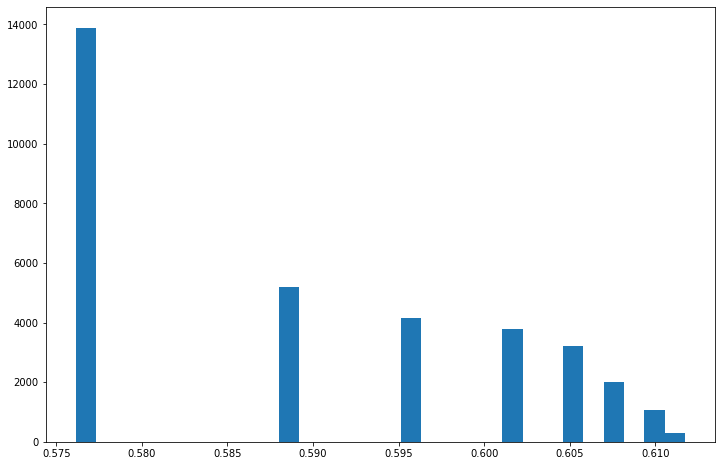

In [ ]:
# Plotting histogra to see result of boxcox transformation
plt.hist(pd.Series(ny_boxcox), bins=30)
plt.show()

In [ ]:
# Applying the transformation for the columns that square root tranformation worked for
for col in sqrt_col_list:
  # Create variables for transformed values for the numerical variables
  loan_df_copy_main['sqrt_'+col] = np.sqrt(loan_df_copy_main[col])

In [ ]:
# Applying the transformation for the columns that log tranformation worked for
for col in log_col_list:
  # Create variables for transformed values for the numerical variables
  loan_df_copy_main['log_'+col] = np.sqrt(loan_df_copy_main[col])

In [ ]:
all_num_col = ["sqrt_loan_amnt", "sqrt_installment", "sqrt_annual_inc", "log_revol_bal", "dti", "open_acc", "revol_util", "total_acc", "average_fico", "num_yr_earl_cr_line"]

In [ ]:
# List of all numerical columns to be checked for skewness
all_num_col

['sqrt_loan_amnt',
 'sqrt_installment',
 'sqrt_annual_inc',
 'log_revol_bal',
 'dti',
 'open_acc',
 'revol_util',
 'total_acc',
 'average_fico',
 'num_yr_earl_cr_line']

sqrt_loan_amnt----------------


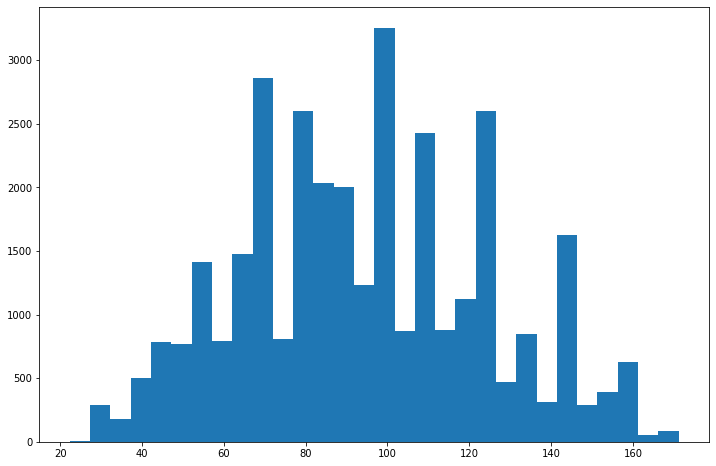

sqrt_installment----------------


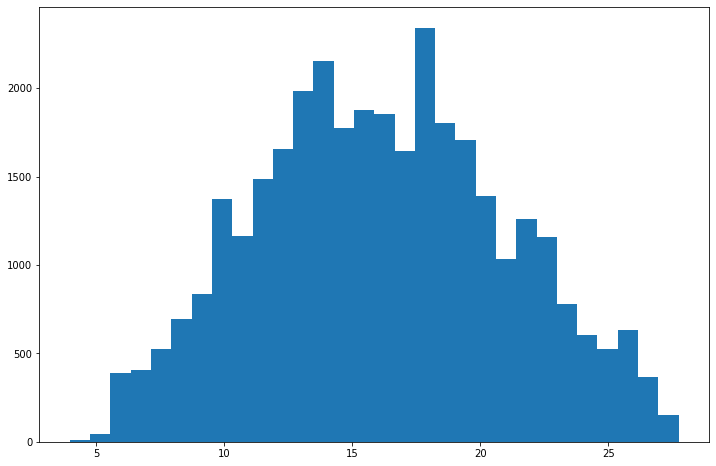

sqrt_annual_inc----------------


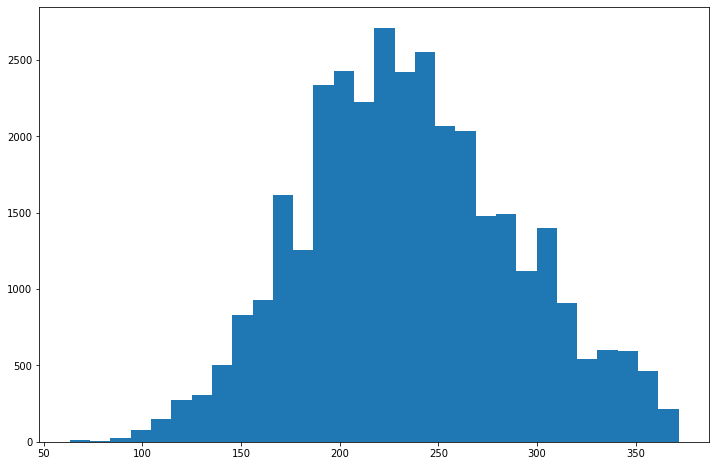

log_revol_bal----------------


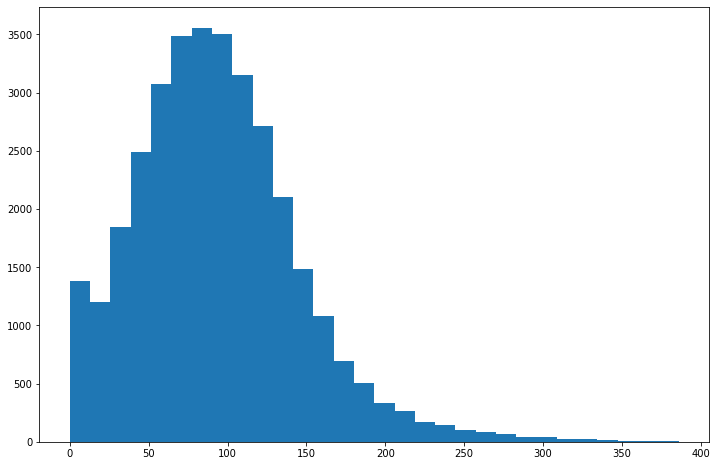

dti----------------


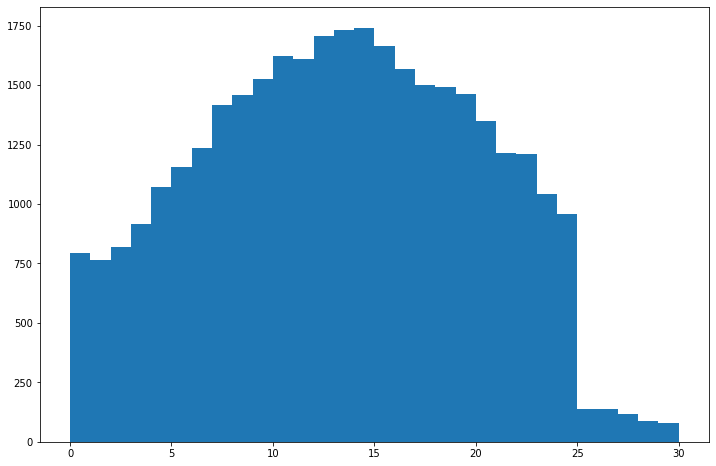

open_acc----------------


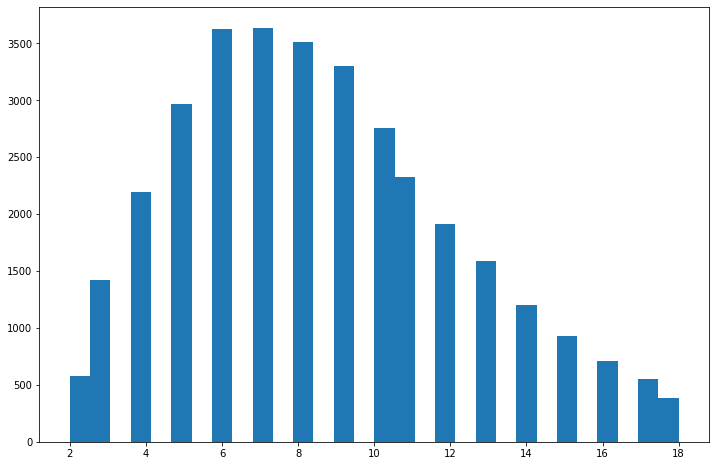

revol_util----------------


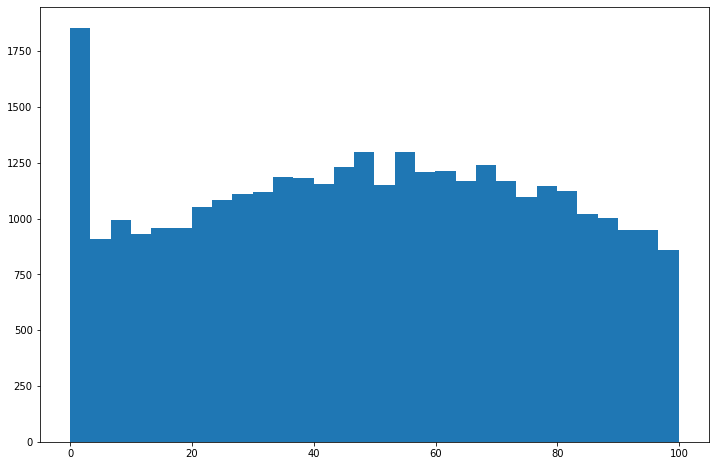

total_acc----------------


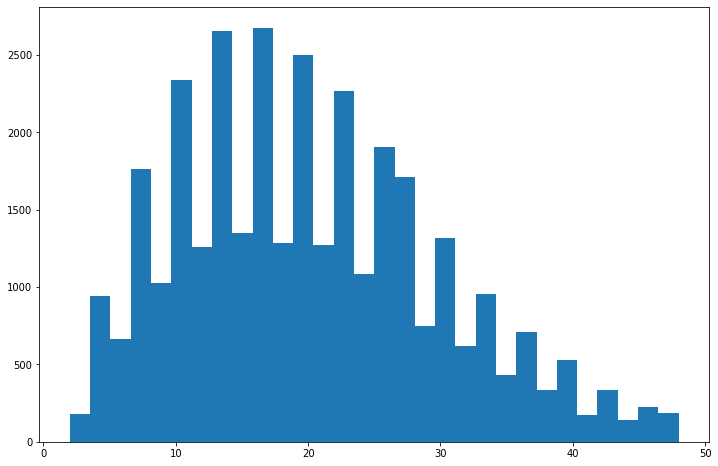

average_fico----------------


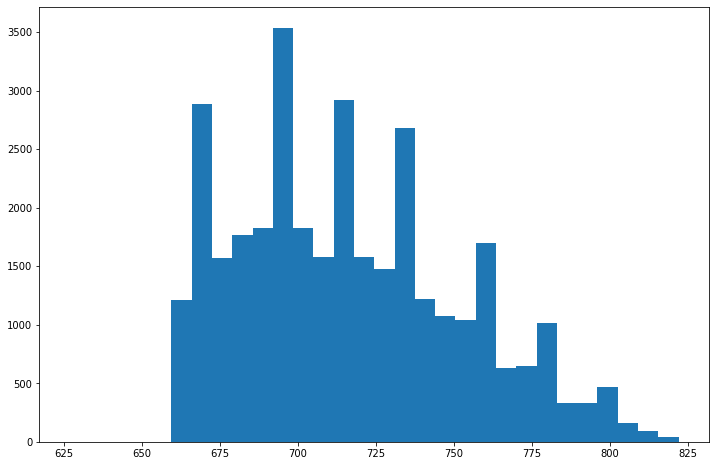

num_yr_earl_cr_line----------------


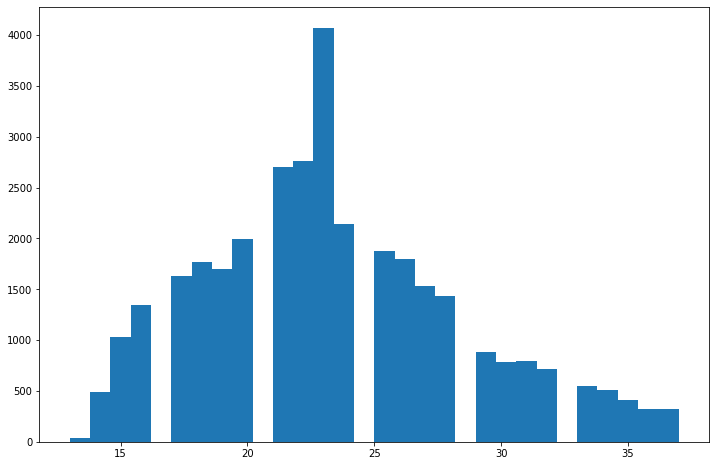

In [ ]:
# Visualization of the Distribution of Numerical Features after main transformations (final decision of transformation)
for col in all_num_col:
  print(col+"----------------")
  plt.hist(loan_df_copy_main[col], bins=30)

  plt.show()

In [ ]:
# skewness along the index axis
loan_df_copy_main[all_num_col].skew(axis = 0, skipna = True)

sqrt_loan_amnt         0.159455
sqrt_installment       0.086157
sqrt_annual_inc        0.168060
log_revol_bal          0.833159
dti                   -0.028174
open_acc               0.465936
revol_util            -0.036877
total_acc              0.521065
average_fico           0.489206
num_yr_earl_cr_line    0.489559
dtype: float64

Note that some of the transformation did not work perfectly well but with the result gotten from the charts, we can say that the normality assumption is not completely violated, the results are more better than what we had initial for those that were transformed. More complex or uncommon transformation could be tried on them later.

Also, the values gotten from the skewness calculated above are not bad, so we are pretty good to go.

In [ ]:
# Drop columns that we already created a variable for their transformation
loan_df_copy_main = loan_df_copy_main.drop(["loan_amnt", "installment", "annual_inc", "revol_bal"], axis=1)


### Min-Max Normalization

In [ ]:
# Splitting the Dataset into independent and dependent features
X = loan_df_copy_main.drop('loan_status', axis=1).values
y = loan_df_copy_main.loan_status.values

In [ ]:
# Splitting the dataset into the Training and Test set for Model Building
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.30, random_state=11)

We decided to use Min-Max Normalization simply because we have gotten rid of the outliers, and we have an approximately normal distribution for each of the variables. This normalization is just to ensure all the values in each of the numerical columns are between 0 and 1, it will also ensure that a convergence problem does not have a massive variance - the model computations will run faster and magnitude of variables will not dominate another where metrics like euclidean metric is being used in model computation

In [ ]:
# min-max normalization
mm_X = MinMaxScaler()
X_train = mm_X.fit_transform(X_train)
X_valid = mm_X.transform(X_valid)
y_train = y_train
y_valid = y_valid

In [ ]:
# Oversampling the data set
over_sampler = RandomOverSampler(random_state=42)

In [ ]:
# Checking the proportion of the classes of the categorical target column before and after oversampling
print(f"Training target statistics before oversampling: {Counter(y_train)}")
X_res, y_res = over_sampler.fit_resample(X_train, y_train)
print(f"Training target statistics after oversampling: {Counter(y_res)}")

Training target statistics before oversampling: Counter({1: 20133, 0: 3389})
Training target statistics after oversampling: Counter({0: 20133, 1: 20133})


In [ ]:
# creating a dataframe for the train data from a numpy array
df_train = pd.DataFrame(X_res, columns=loan_df_copy_main.drop('loan_status', axis=1).columns)

In [ ]:
# including the target variable in the train dataframe
df_train['loan_status'] = list(y_res)

In [ ]:
df_train.head()

grade  emp_length       dti  delinq_2yrs  inq_last_6mths  open_acc  \
0  0.333333         0.0  0.767923     0.000000             0.0    0.2500   
1  0.500000         1.0  0.275092     0.000000             0.5    0.1250   
2  0.333333         1.0  0.471157     0.363636             0.0    0.2500   
3  0.333333         0.8  0.361120     0.000000             0.0    0.5000   
4  0.166667         1.0  0.698566     0.000000             0.0    0.5625   

   pub_rec  revol_util  total_acc  pub_rec_bankruptcies  average_fico  \
0      0.0    0.905906   0.173913                   0.0      0.564103   
1      0.0    0.475475   0.391304                   0.0      0.256410   
2      0.0    0.169169   0.913043                   0.0      0.333333   
3      0.0    0.451451   0.456522                   0.0      0.230769   
4      0.0    0.601602   0.652174                   0.0      0.307692   

   home_ownership_MORTGAGE  home_ownership_NONE  home_ownership_OTHER  \
0                      0.0                  0.0                   0.0   
1                      0.0                  0.0                   0.0   
2                      0.0                  0.0                   0.0   
3                      1.0                  0.0                   0.0   
4                      1.0                  0.0                   0.0   

   home_ownership_OWN  home_ownership_RENT  verification_status_Not Verified  \
0                 0.0                  1.0                               0.0   
1                 0.0                  1.0                               0.0   
2                 0.0                  1.0                               1.0   
3                 0.0                  0.0                               1.0   
4                 0.0                  0.0                               1.0   

   verification_status_Source Verified  verification_status_Verified  \
0                                  1.0                           0.0   
1                                  0.0                           1.0   
2                                  0.0                           0.0   
3                                  0.0                           0.0   
4                                  0.0                           0.0   

   purpose_car  purpose_credit_card  purpose_debt_consolidation  \
0          0.0                  0.0                         1.0   
1          0.0                  0.0                         1.0   
2          0.0                  0.0                         0.0   
3          0.0                  0.0                         0.0   
4          0.0                  0.0                         1.0   

   purpose_educational  purpose_home_improvement  purpose_house  \
0                  0.0                       0.0            0.0   
1                  0.0                       0.0            0.0   
2                  0.0                       0.0            0.0   
3                  0.0                       1.0            0.0   
4                  0.0                       0.0            0.0   

   purpose_major_purchase  purpose_medical  purpose_moving  purpose_other  \
0                     0.0              0.0             0.0            0.0   
1                     0.0              0.0             0.0            0.0   
2                     1.0              0.0             0.0            0.0   
3                     0.0              0.0             0.0            0.0   
4                     0.0              0.0             0.0            0.0   

   purpose_renewable_energy  purpose_small_business  purpose_vacation  \
0                       0.0                     0.0               0.0   
1                       0.0                     0.0               0.0   
2                       0.0                     0.0               0.0   
3                       0.0                     0.0               0.0   
4                       0.0                     0.0               0.0   

   purpose_wedding  term_ 36 months  term_ 60 mon

In [ ]:
# creating a dataframe for the test data from a numpy array
df_test = pd.DataFrame(X_valid, columns=loan_df_copy_main.drop('loan_status', axis=1).columns)

In [ ]:
# including the target variable in the test dataframe
df_test['loan_status'] = list(y_valid)

In [ ]:
df_test.head()

grade  emp_length       dti  delinq_2yrs  inq_last_6mths  open_acc  \
0  0.000000         0.2  0.832611     0.000000             0.5    0.4375   
1  0.166667         1.0  0.635879     0.090909             1.0    0.3750   
2  0.333333         0.3  0.294765     0.000000             0.0    0.5000   
3  0.000000         0.4  0.383461     0.000000             1.0    0.5000   
4  0.166667         0.8  0.535512     0.000000             0.0    0.3125   

   pub_rec  revol_util  total_acc  pub_rec_bankruptcies  average_fico  \
0      0.0    0.208208   0.260870                   0.0      0.435897   
1      0.0    0.507508   0.608696                   0.0      0.512821   
2      0.0    0.600601   0.478261                   0.0      0.410256   
3      0.0    0.203203   0.630435                   0.0      0.615385   
4      0.0    0.669670   0.456522                   0.0      0.461538   

   home_ownership_MORTGAGE  home_ownership_NONE  home_ownership_OTHER  \
0                      0.0                  0.0                   0.0   
1                      1.0                  0.0                   0.0   
2                      1.0                  0.0                   0.0   
3                      1.0                  0.0                   0.0   
4                      0.0                  0.0                   0.0   

   home_ownership_OWN  home_ownership_RENT  verification_status_Not Verified  \
0                 0.0                  1.0                               1.0   
1                 0.0                  0.0                               0.0   
2                 0.0                  0.0                               0.0   
3                 0.0                  0.0                               1.0   
4                 1.0                  0.0                               1.0   

   verification_status_Source Verified  verification_status_Verified  \
0                                  0.0                           0.0   
1                                  0.0                           1.0   
2                                  0.0                           1.0   
3                                  0.0                           0.0   
4                                  0.0                           0.0   

   purpose_car  purpose_credit_card  purpose_debt_consolidation  \
0          0.0                  0.0                         0.0   
1          0.0                  0.0                         1.0   
2          0.0                  0.0                         1.0   
3          0.0                  0.0                         1.0   
4          0.0                  1.0                         0.0   

   purpose_educational  purpose_home_improvement  purpose_house  \
0                  0.0                       0.0            0.0   
1                  0.0                       0.0            0.0   
2                  0.0                       0.0            0.0   
3                  0.0                       0.0            0.0   
4                  0.0                       0.0            0.0   

   purpose_major_purchase  purpose_medical  purpose_moving  purpose_other  \
0                     1.0              0.0             0.0            0.0   
1                     0.0              0.0             0.0            0.0   
2                     0.0              0.0             0.0            0.0   
3                     0.0              0.0             0.0            0.0   
4                     0.0              0.0             0.0            0.0   

   purpose_renewable_energy  purpose_small_business  purpose_vacation  \
0                       0.0                     0.0               0.0   
1                       0.0                     0.0               0.0   
2                       0.0                     0.0               0.0   
3                       0.0                     0.0               0.0   
4                       0.0                     0.0               0.0   

   purpose_wedding  term_ 36 months  term_ 60 mon

In [ ]:
# Export or save the cleaned data
loan_df_copy4.to_csv("/content/gdrive/My Drive/IAF 603/Loan Data/cleaned_lending_club_loans.csv", index=False)

In [ ]:
# Export or save the full, cleaned, and transformed data
loan_df_copy_main.to_csv("/content/gdrive/My Drive/IAF 603/Loan Data/full_cleaned_transformed_lending_club_loans.csv", index=False)

In [ ]:
# Export or save the train data (cleaned, and transformed data)
df_train.to_csv("/content/gdrive/My Drive/IAF 603/Loan Data/train_data_cleaned_transformed_lending_club_loans.csv", index=False)

In [ ]:
# Export or save the test data (cleaned, and transformed data)
df_test.to_csv("/content/gdrive/My Drive/IAF 603/Loan Data/test_data_cleaned_transformed_lending_club_loans.csv", index=False)